Details given on project- This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Objective of the Project- Number of predicted wins (W)

Steps followed to get the solution are given below-

Let's start with importing the important databases that are required for the initial non-visual and visual data analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import *
import statsmodels.api as sm
import networkx as nx
import requests
from flask import Flask
import sqlalchemy
import pytest
import tkinter as tk
import openpyxl

Now that we have the basic list of packages and libraries, let's upload the csv into a dataframe using pandas and get a general outloook of the entire database. We will be using utf-8 encoding feature of pandas and applying a delimiter to read the comma seperated values from our dataset to save the dataframe.

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
baseball_data = pd.read_csv(url, delimiter=',', encoding='utf-8')
print(baseball_data)

      W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572

So according the details given the project we can see that we have the following list of values-

1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.



Let's get a closer look of the dataframe using the .head() command to get the first 30 values of the dataframe.

In [6]:
baseball_data.head(30)

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

Now let's get the laset 30 values of the dataframe using the .tail() command.

In [7]:
baseball_data.tail(30)

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

Let's deccalre the x/input variables of the dataframe using the .iloc method.

In [9]:
baseball_dataxvariable_data = baseball_data.iloc[:,1:]

In [10]:
baseball_dataxvariable_data

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   13   
12  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   12   
13  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   12   
14  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   15   
15  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   15   
16  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   13   
17  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   21   
18  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1    7   
19  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2    8   
20  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   14   
21  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   13   
22  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   12   
23  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   10   
24  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1    7   
25  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   21   
26  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   18   
27  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   12   
28  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1    6   
29  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4    4   

    SV    E  
0   56   88  
1   45   86  
2   38   79  
3   37  101  
4   35   86  
5   34   88  
6   48   93  
7   43   77  
8   60   95  
9   40   97  
10  45  119  
11  39   85  
12  46   93  
13  45   94  
14  28  126  
15  62   96  
16  54  122  
17  48  111  
18  40  116  
19  35   90  
20  50   88  
21  41   90  
22  35   77  
23  44   90  
24  35  117  
25  47   75  
26  41   78  
27  44   86  
28  41   92  
29  36   95

Now let's declare the y/output variable of the dataframe.

In [11]:
baseball_datayvariable_data = baseball_data.iloc[:, 0]

In [12]:
baseball_datayvariable_data

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

Let's check if there are null values in the dataframe using the .isnull().sum().sum() command.

In [13]:
baseball_data.isnull().sum().sum()

0

We can see that there are zero null-values in the dataframe. Let's visualise it using the heatmap feature.

<Axes: >

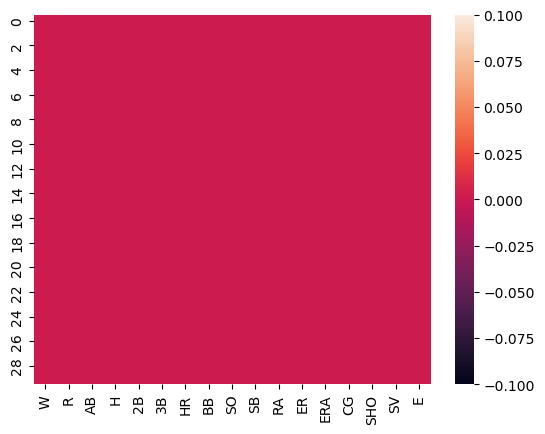

In [17]:
sns.heatmap(baseball_data.isnull())

Now let's get the value counts of the columns present in the dataframe and start with our non-visual analysis.

In [15]:
for i in baseball_data.columns:
    print(baseball_data[i].value_counts())
    print("/n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64
/n
689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64
/n
5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64
/n
1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349  

From the above table we can extract the following details about the most number of occurences present for values in each column-
1) 68-3 (W)
2) 689-2 (R)
   696-2 (R)
3) 5485-2 (AB)
4) 1363-2(H)
5) 272-3(2B)
6) 27-3(3B)
7) 136-2(HR)
   167-2
   177-2
8) 478-2(BB)
9) 1150-2(SO)
10) 69-3(SB)
11) RA, ER, AND ERA ALL HAVE UNIQUE VALUES
12) 1-7(CG)
13) 12-7(SHO)
14) 35-4(SV)
15) 88-3(E)

Let's further verify the value counts of our target/output column.

In [23]:
baseball_score_counts = baseball_data['W'].value_counts()
print(baseball_score_counts)

68.0     3
81.0     2
76.0     2
74.0     2
83.0     2
98.0     1
84.0     1
92.0     1
63.0     1
67.0     1
71.0     1
90.0     1
64.0     1
97.0     1
95.0     1
100.0    1
85.0     1
86.0     1
88.0     1
78.0     1
80.0     1
87.0     1
93.0     1
79.0     1
Name: W, dtype: int64


Now let's get the descdription the dataframe using the .describe() method and get some details from it.

In [22]:
baseball_datatable = baseball_data.describe()
print(baseball_datatable)

                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000

Median of W is(81.000000) is higher to its mean(80.966667), which means outliers are present-negaively skewed

Median of R(689.000000) is higher than its mean(688.233333), which means few outliers are present- -vely skewed

Median of AB(5510.000000) is quite lower than its mean(5516.266667), which means some outliers are present- +vely skewed

Median of H(1382.500000) is quite lower than its mean(1403.533333), which means some outliers are present- +vely skewed

Median of 2B(275.500000) is quite higher than its mean(274.733333), which means few outliers are present- -ve

Median of 3B(31.000000) is quite lower than its mean(31.300000), which means some outliers are present- +ve

Median of HR(158.500000) is quite lower than its mean(163.633333), which means few outliers are present- +ve

Median of BB(473.000000) is pretty higher than its mean(469.100000), which means a lot of outliers are present- -ve

Median of SO(1261.50000) is pretty higher than its mean(1248.20000), which means a lot of outliers are present- -ve

Median of SB(83.500000) is same as its mean(83.500000), which means no lot of outliers are present

Median of RA(695.500000) is pretty higher than its mean(688.233333), which means a lot of outliers are present- -ve

Median of ER(644.500000) is pretty higher than its mean(635.833333), which means a lot of outliers are present- -ve

Median of ERA(4.025000) is pretty higher than its mean(3.956333), which means a lot of outliers are present- -ve

Median of CG(3.000000) is pretty lower than its mean(3.466667), which means a lot of outliers are present- +ve

Median of SHO(12.000000) is pretty higher than its mean(11.300000), which means a lot of outliers are present- -ve

Median of SV(42.000000) is pretty lower than its mean(43.066667), which means a lot of outliers are present- +ve

Median of E(91.000000) is pretty lower than its mean(94.333333), which means a lot of outliers are present- +ve

The total count of all columns is 30.000000 values.

The maximum values of each column are as follows:-

W: 100.000000, iqr = 13.75

R: 891.000000, iqr= 103

AB:5649.000000, iqr= 106

H:1515.000000, iqr= 88.5

2B:308.000000,iqr= 26.5

3B:49.000000,iqr= 16

HR:232.000000,iqr=36.75

BB:570.000000,iqr=73

SO:1518.00000,iqr=154

SB:134.000000,iqr=27.5

RA:844.000000,iqr=96.25

ER:799.0000,iqr=92

ERA:5.04000,iqr=0.5375

CG:11.00000,iqr=4.75

SHO:21.0000,iqr=4

SV:62.0000,iqr=9.5

E:126.000,iqr=10.75


lET'S LOOK AT THE DATATYPES OF OUR VARIABLES

In [16]:
baseball_data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We can see that other than ERA, all the other variables have the datatype int64. We need to convert them into float64 values.

In [3]:
baseball_data['W']= baseball_data['W'].astype(float)
baseball_data['RA']= baseball_data['RA'].astype(float)
baseball_data['CG']= baseball_data['CG'].astype(float)
baseball_data['SHO']= baseball_data['SHO'].astype(float)
baseball_data['R']= baseball_data['R'].astype(float)
baseball_data['BB']= baseball_data['BB'].astype(float)
baseball_data['AB']= baseball_data['AB'].astype(float)
baseball_data['H']= baseball_data['H'].astype(float)
baseball_data['2B']= baseball_data['2B'].astype(float)
baseball_data['3B']= baseball_data['3B'].astype(float)
baseball_data['HR']= baseball_data['HR'].astype(float)
baseball_data['SO']= baseball_data['SO'].astype(float)
baseball_data['CG']= baseball_data['CG'].astype(float)
baseball_data['E']= baseball_data['E'].astype(float)
baseball_data['ER']= baseball_data['ER'].astype(float)
baseball_data['SV']= baseball_data['SV'].astype(float)
baseball_data['SB']= baseball_data['SB'].astype(float)

In [4]:
baseball_data.dtypes

W      float64
R      float64
AB     float64
H      float64
2B     float64
3B     float64
HR     float64
BB     float64
SO     float64
SB     float64
RA     float64
ER     float64
ERA    float64
CG     float64
SHO    float64
SV     float64
E      float64
dtype: object

Now that we have converted them into float64 values, let's get some information from the database using .info() method.

In [24]:
baseball_scoreinfo = baseball_data.info
print(baseball_scoreinfo)

<bound method DataFrame.info of         W      R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.0  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.0  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.0  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.0  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.0  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  891.0  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.0  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.0  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.0  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.0  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.0  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.0  5459.0  1363.0

Now let's look at the shape of our dataframe.

In [25]:
baseball_data.shape

(30, 17)

We can see that we have 30 rows and 17 columns.

let's look at the columns of the dataframe.

In [26]:
baseball_data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Now let's declare a dataframe that consists of all the float64 columns in our dataframe

In [27]:
baseball_score_data_col=[]
for i in baseball_data.dtypes.index:
    if baseball_data.dtypes[i] == 'float64':
        baseball_score_data_col.append(i)
print("baseball_score_data_floats columns:", baseball_score_data_col)
print("/n")

baseball_score_data_floats columns: ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
/n


Now let's check the unique values including the number of unique values in our output column.

In [28]:
baseball_data['W'].unique()

array([ 95.,  83.,  81.,  76.,  74.,  93.,  87.,  80.,  78.,  88.,  86.,
        85.,  68., 100.,  98.,  97.,  64.,  90.,  71.,  67.,  63.,  92.,
        84.,  79.])

In [29]:
baseball_data['W'].nunique()

24

Now let's get the absolute values of the dataframe we are using.

In [30]:
absolute_df = baseball_data.abs()
print(absolute_df)

        W      R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.0  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.0  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.0  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.0  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.0  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  891.0  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.0  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.0  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.0  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.0  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.0  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.0  5459.0  1363.0  278.0  26.0  230.0  486.0  139

Now let's check the mean value of the output column in our dataframe.

In [31]:
print(baseball_data["W"].mean())

80.96666666666667


Now let's get a count of unique values in each of the column in our dataframe.

In [32]:
baseball_data.nunique().to_frame("No. of Unique values")

No. of Unique values
W                      24
R                      28
AB                     29
H                      29
2B                     22
3B                     23
HR                     27
BB                     29
SO                     29
SB                     27
RA                     30
ER                     30
ERA                    30
CG                      9
SHO                    12
SV                     20
E                      21

Let's see if there are any duplicated rows in our dataframe.

In [33]:
print("Total duplicated rows:", baseball_data.duplicated().sum())

Total duplicated rows: 0


In [36]:
baseball_data.loc[baseball_data["W"]==""]

Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []

We can see that there are no duplicate rows or values in our dataframe. So now let's find the maximum and minimum values in our target column.

In [34]:
print("max scores:",baseball_data["W"].max())
print("min scores:",baseball_data["W"].min())

max scores: 100.0
min scores: 63.0


Visualisations

Univariate Analysis

In [ ]:
Countplot

The countplots will visualise the following details we got based on non-visual analysis-

68-3 (W)
689-2 (R) 696-2 (R)
5485-2 (AB)
1363-2(H)
272-3(2B)
27-3(3B)
136-2(HR) 167-2 177-2
478-2(BB)
1150-2(SO)
69-3(SB)
RA, ER, AND ERA ALL HAVE UNIQUE VALUES
1-7(CG)
12-7(SHO)
35-4(SV)
88-3(E)

68.0     3
81.0     2
76.0     2
74.0     2
83.0     2
98.0     1
84.0     1
92.0     1
63.0     1
67.0     1
71.0     1
90.0     1
64.0     1
97.0     1
95.0     1
100.0    1
85.0     1
86.0     1
88.0     1
78.0     1
80.0     1
87.0     1
93.0     1
79.0     1
Name: W, dtype: int64


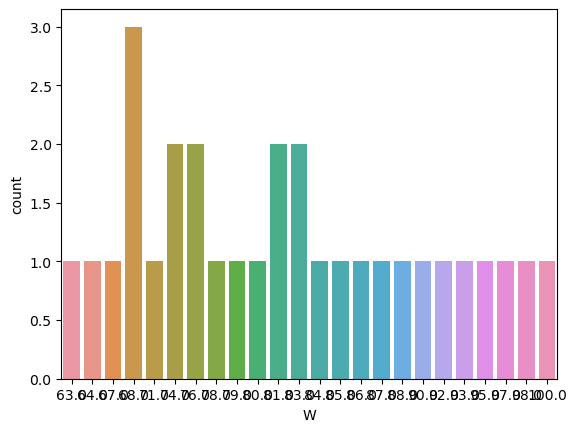

In [37]:
bc=sns.countplot(x='W',data=baseball_data)
print(baseball_data['W'].value_counts())

689.0    2
696.0    2
724.0    1
647.0    1
650.0    1
720.0    1
667.0    1
626.0    1
573.0    1
613.0    1
703.0    1
683.0    1
640.0    1
655.0    1
697.0    1
694.0    1
656.0    1
661.0    1
729.0    1
751.0    1
748.0    1
644.0    1
713.0    1
764.0    1
891.0    1
622.0    1
669.0    1
737.0    1
Name: R, dtype: int64


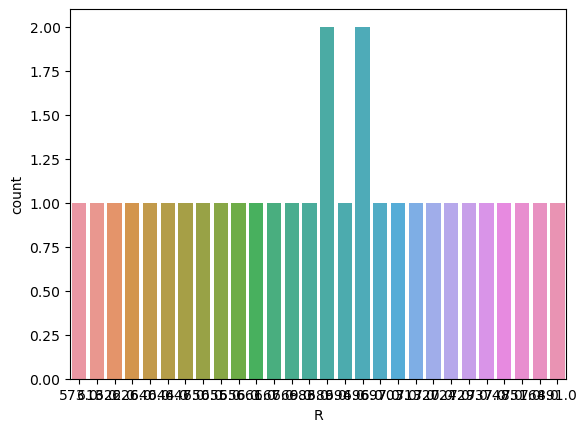

In [38]:
bc=sns.countplot(x='R',data=baseball_data)
print(baseball_data['R'].value_counts())

5485.0    2
5575.0    1
5631.0    1
5457.0    1
5649.0    1
5565.0    1
5385.0    1
5529.0    1
5420.0    1
5463.0    1
5428.0    1
5527.0    1
5571.0    1
5480.0    1
5491.0    1
5484.0    1
5467.0    1
5600.0    1
5544.0    1
5417.0    1
5459.0    1
5511.0    1
5640.0    1
5567.0    1
5509.0    1
5605.0    1
5533.0    1
5439.0    1
5572.0    1
Name: AB, dtype: int64


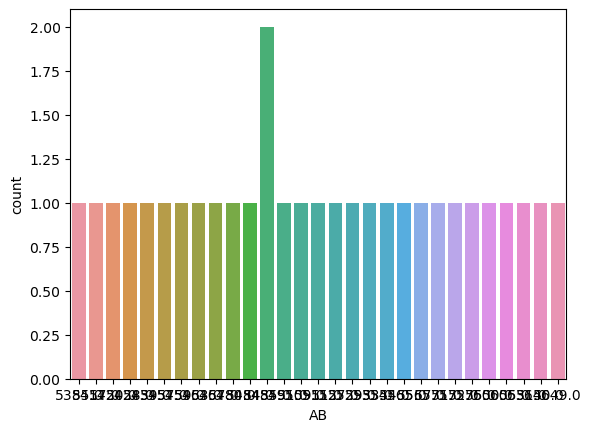

In [39]:
bc=sns.countplot(x='AB',data=baseball_data)
print(baseball_data['AB'].value_counts())

1363.0    2
1497.0    1
1386.0    1
1324.0    1
1494.0    1
1486.0    1
1346.0    1
1374.0    1
1361.0    1
1420.0    1
1351.0    1
1382.0    1
1378.0    1
1341.0    1
1462.0    1
1405.0    1
1349.0    1
1379.0    1
1331.0    1
1419.0    1
1495.0    1
1383.0    1
1370.0    1
1397.0    1
1480.0    1
1515.0    1
1381.0    1
1395.0    1
1479.0    1
Name: H, dtype: int64


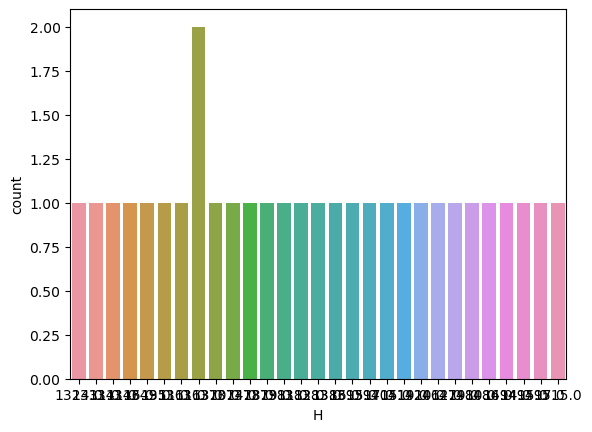

In [40]:
bc=sns.countplot(x='H',data=baseball_data)
print(baseball_data['H'].value_counts())

272.0    3
260.0    2
289.0    2
278.0    2
277.0    2
274.0    2
288.0    2
300.0    1
292.0    1
251.0    1
236.0    1
265.0    1
295.0    1
257.0    1
243.0    1
262.0    1
279.0    1
294.0    1
246.0    1
308.0    1
303.0    1
263.0    1
Name: 2B, dtype: int64


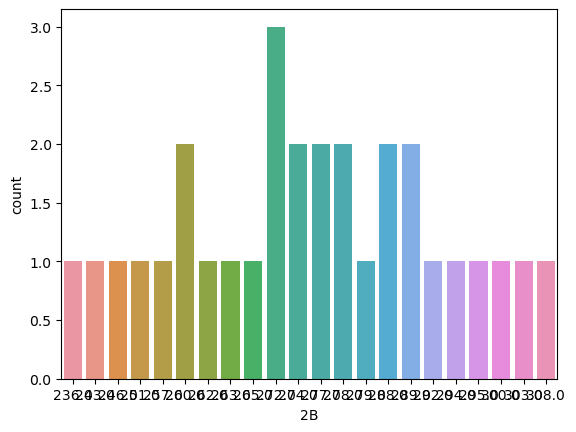

In [41]:
bc=sns.countplot(x='2B',data=baseball_data)
print(baseball_data['2B'].value_counts())

27.0    3
39.0    2
49.0    2
17.0    2
32.0    2
26.0    2
42.0    1
48.0    1
37.0    1
18.0    1
40.0    1
13.0    1
34.0    1
30.0    1
21.0    1
46.0    1
22.0    1
44.0    1
33.0    1
20.0    1
19.0    1
29.0    1
36.0    1
Name: 3B, dtype: int64


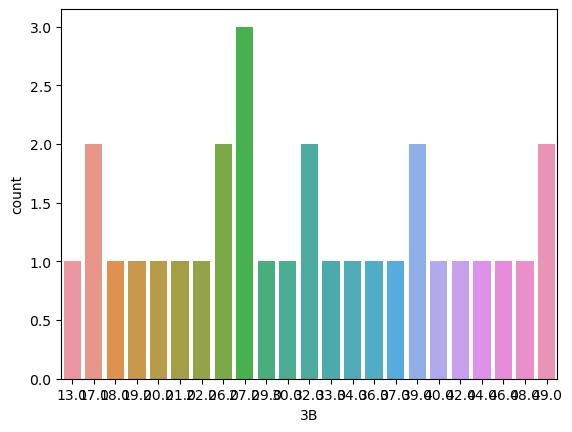

In [42]:
bc=sns.countplot(x='3B',data=baseball_data)
print(baseball_data['3B'].value_counts())

136.0    2
167.0    2
177.0    2
139.0    1
137.0    1
148.0    1
154.0    1
187.0    1
130.0    1
100.0    1
120.0    1
145.0    1
171.0    1
140.0    1
198.0    1
146.0    1
156.0    1
176.0    1
230.0    1
172.0    1
161.0    1
217.0    1
212.0    1
232.0    1
151.0    1
141.0    1
186.0    1
Name: HR, dtype: int64


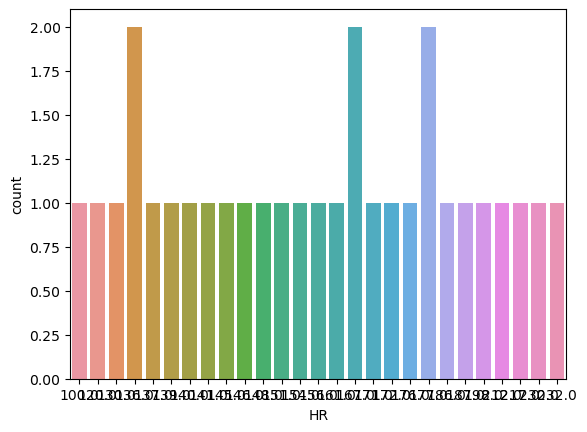

In [43]:
bc=sns.countplot(x='HR',data=baseball_data)
print(baseball_data['HR'].value_counts())

478.0    2
383.0    1
461.0    1
426.0    1
490.0    1
457.0    1
563.0    1
387.0    1
471.0    1
375.0    1
539.0    1
488.0    1
496.0    1
412.0    1
567.0    1
506.0    1
439.0    1
475.0    1
435.0    1
486.0    1
503.0    1
436.0    1
418.0    1
554.0    1
570.0    1
455.0    1
404.0    1
533.0    1
388.0    1
Name: BB, dtype: int64


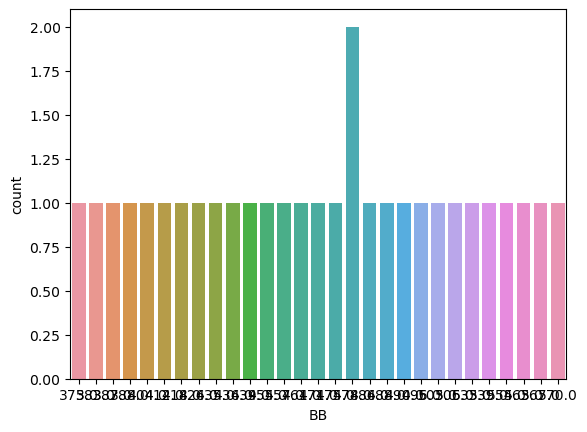

In [44]:
bc=sns.countplot(x='BB',data=baseball_data)
print(baseball_data['BB'].value_counts())

1150.0    2
973.0     1
1267.0    1
1327.0    1
1312.0    1
1159.0    1
1258.0    1
1274.0    1
1107.0    1
1344.0    1
1290.0    1
1255.0    1
1299.0    1
1518.0    1
1322.0    1
1119.0    1
1264.0    1
1336.0    1
1392.0    1
1233.0    1
1148.0    1
1310.0    1
1331.0    1
1227.0    1
1151.0    1
1259.0    1
1231.0    1
1157.0    1
1283.0    1
Name: SO, dtype: int64


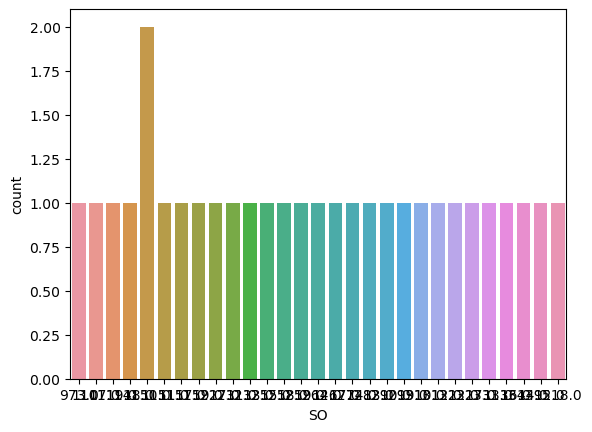

In [45]:
bc=sns.countplot(x='SO',data=baseball_data)
print(baseball_data['SO'].value_counts())

69.0     3
88.0     2
78.0     1
82.0     1
132.0    1
93.0     1
59.0     1
112.0    1
57.0     1
51.0     1
134.0    1
84.0     1
95.0     1
98.0     1
104.0    1
70.0     1
52.0     1
121.0    1
101.0    1
71.0     1
87.0     1
44.0     1
63.0     1
83.0     1
68.0     1
86.0     1
97.0     1
Name: SB, dtype: int64


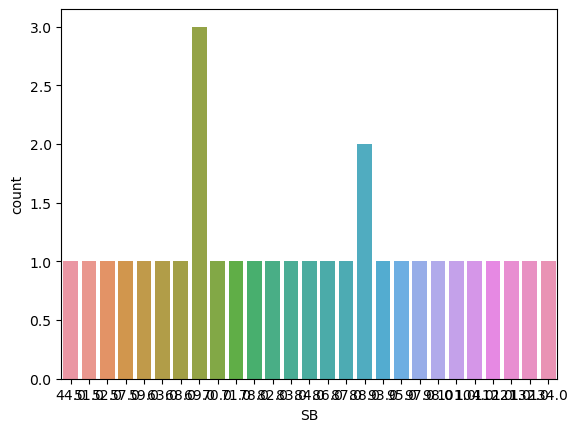

In [46]:
bc=sns.countplot(x='SB',data=baseball_data)
print(baseball_data['SB'].value_counts())

641.0    1
700.0    1
731.0    1
713.0    1
627.0    1
595.0    1
809.0    1
760.0    1
678.0    1
635.0    1
613.0    1
754.0    1
737.0    1
608.0    1
596.0    1
525.0    1
729.0    1
726.0    1
675.0    1
618.0    1
733.0    1
753.0    1
642.0    1
693.0    1
698.0    1
670.0    1
803.0    1
701.0    1
640.0    1
844.0    1
Name: RA, dtype: int64


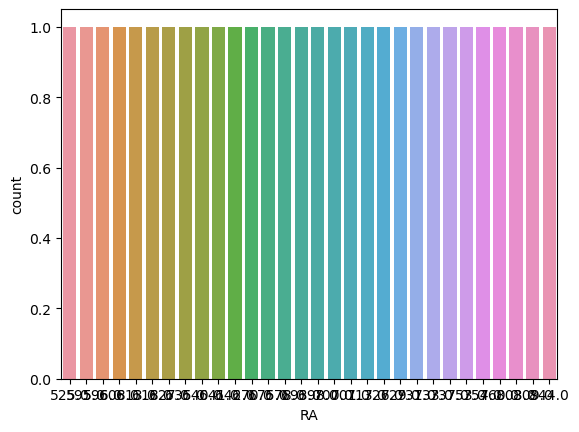

In [47]:
bc=sns.countplot(x='RA',data=baseball_data)
print(baseball_data['RA'].value_counts())

601.0    1
653.0    1
655.0    1
659.0    1
597.0    1
553.0    1
749.0    1
698.0    1
638.0    1
577.0    1
557.0    1
700.0    1
682.0    1
546.0    1
532.0    1
478.0    1
664.0    1
677.0    1
630.0    1
572.0    1
680.0    1
694.0    1
604.0    1
646.0    1
652.0    1
609.0    1
746.0    1
643.0    1
584.0    1
799.0    1
Name: ER, dtype: int64


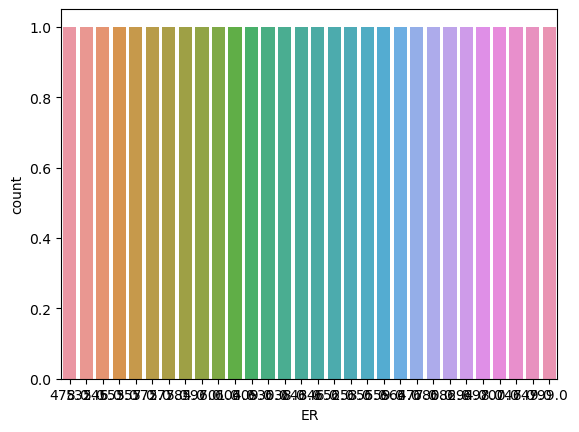

In [48]:
bc=sns.countplot(x='ER',data=baseball_data)
print(baseball_data['ER'].value_counts())

3.73    1
4.07    1
4.09    1
4.04    1
3.72    1
3.44    1
4.69    1
4.41    1
4.02    1
3.62    1
3.43    1
4.33    1
4.28    1
3.36    1
3.21    1
2.94    1
4.14    1
4.16    1
3.94    1
3.57    1
4.24    1
4.31    1
3.74    1
4.05    1
4.03    1
3.80    1
4.64    1
3.98    1
3.67    1
5.04    1
Name: ERA, dtype: int64


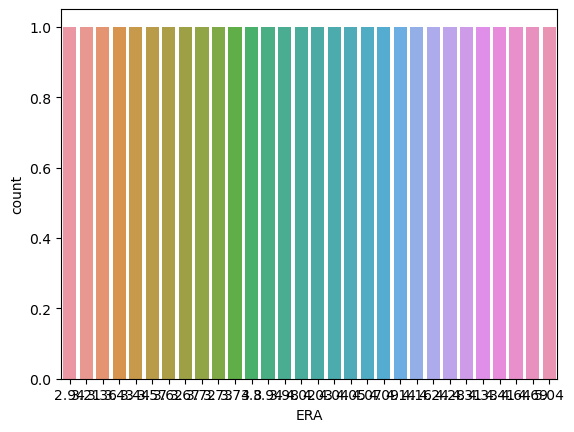

In [49]:
bc=sns.countplot(x='ERA',data=baseball_data)
print(baseball_data['ERA'].value_counts())

1.0     7
2.0     4
7.0     4
3.0     3
0.0     3
5.0     3
6.0     3
4.0     2
11.0    1
Name: CG, dtype: int64


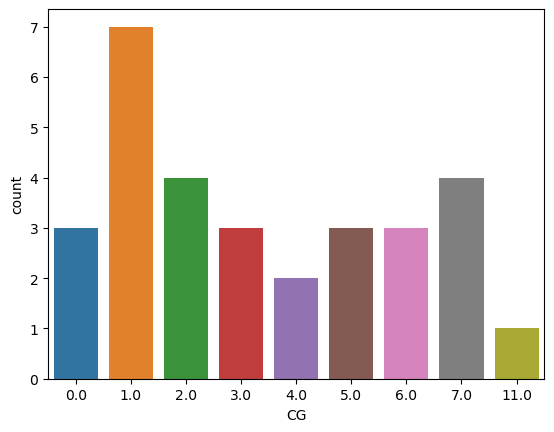

In [50]:
bc=sns.countplot(x='CG',data=baseball_data)
print(baseball_data['CG'].value_counts())

12.0    7
10.0    5
13.0    3
8.0     2
9.0     2
4.0     2
15.0    2
21.0    2
7.0     2
14.0    1
18.0    1
6.0     1
Name: SHO, dtype: int64


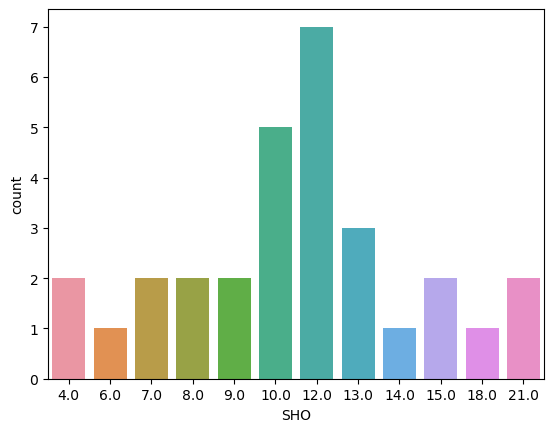

In [51]:
bc=sns.countplot(x='SHO',data=baseball_data)
print(baseball_data['SHO'].value_counts())

35.0    4
41.0    3
45.0    3
44.0    2
48.0    2
40.0    2
56.0    1
28.0    1
47.0    1
50.0    1
54.0    1
62.0    1
39.0    1
46.0    1
60.0    1
43.0    1
34.0    1
37.0    1
38.0    1
36.0    1
Name: SV, dtype: int64


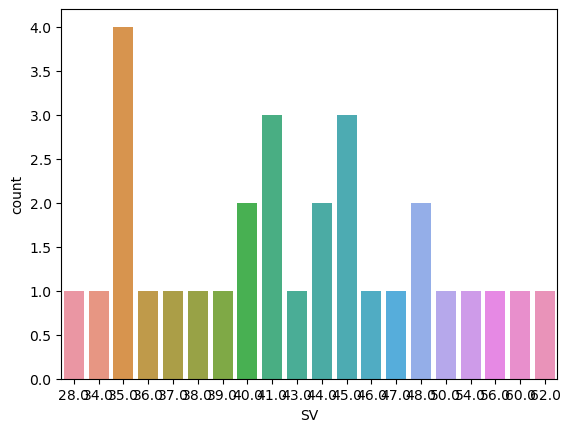

In [52]:
bc=sns.countplot(x='SV',data=baseball_data)
print(baseball_data['SV'].value_counts())

88.0     3
90.0     3
86.0     3
93.0     2
77.0     2
95.0     2
122.0    1
78.0     1
75.0     1
117.0    1
116.0    1
111.0    1
94.0     1
96.0     1
126.0    1
85.0     1
119.0    1
97.0     1
101.0    1
79.0     1
92.0     1
Name: E, dtype: int64


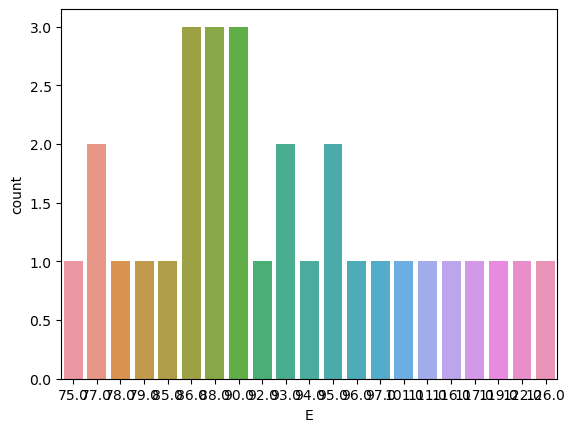

In [53]:
bc=sns.countplot(x='E',data=baseball_data)
print(baseball_data['E'].value_counts())

Distribtuion plots

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_6812\808387563.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(baseball_data[col],color="b")
C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_6812\808387563.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(baseball_data[col],color="b")


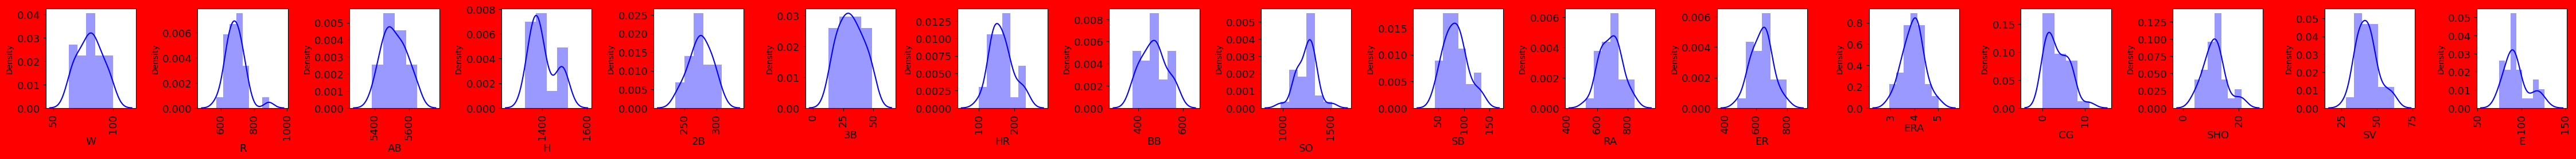

In [55]:
plt.figure(figsize=(45,45),facecolor = "red")
plotnumber=1
for col in baseball_score_data_col:
    if plotnumber<=18:
        wc=plt.subplot(17,17,plotnumber)
        sns.distplot(baseball_data[col],color="b")
        plt.xlabel(col,rotation=0,fontsize = 13)
        plt.xticks(rotation=90, fontsize=13)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.tight_layout()

Below are the following details from the distribution plots-

1) The wins columns is pretty normally distributed between 50 and 100. Density is between 0 to 0.03.
2) The runs columns is slightly skewed to the left, with outliers present in the right side. Density is between 0 and 0.0006.
3) The time at bat column is normally distributed.Density is between 0 and 0.0005. Density is between 0 and 0.0007. 
4) The H column is slightly skewed to the left with outliers present to the left.
5) The second base column is normally distributed between 250 and 300.
6) The third base column is normally distributed between 0 to 100.
7) The home runs column is normally distributed.
8) The base on balls column is normally distributed.
9) The strikeout column is slightly distributed to the right.
10) The stolen base column is normally distributed with slight skewness to the left.
11) The run average column is slightly skewed to the right between 600 to 800.
13) The earned run column is slighlty skewed tot he right 600 to 800.
14) The earned run average column is normally distributed between 3 to 5.
15) The complete game column is skeweed to the right from 0 to 100.
16) The shutout column is has slight skewness tot he right.
17) The save column is almost normally distrributed.
18) The errors column is slightly skewed to the right.

Stripplots

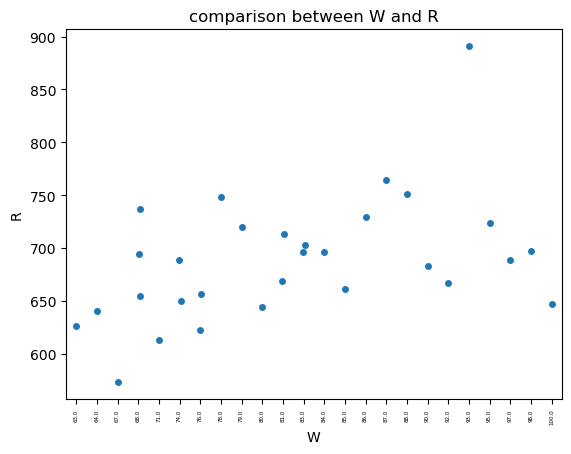

<Figure size 2800x200 with 0 Axes>

In [56]:
plt.title("comparison between W and R")
sns.stripplot(x= "W", y= "R", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

There is weak positive relation betweem w and r.

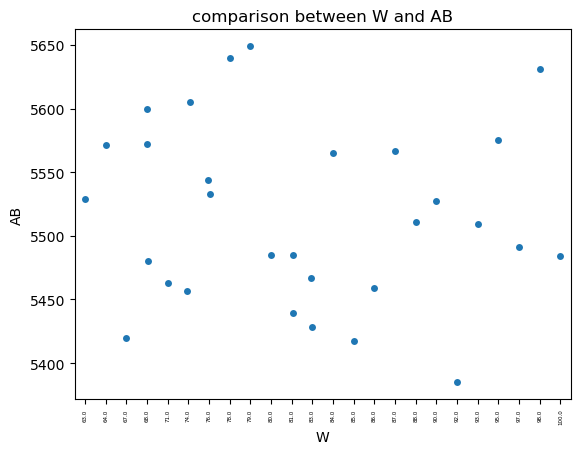

<Figure size 2800x200 with 0 Axes>

In [57]:
plt.title("comparison between W and AB")
sns.stripplot(x= "W", y= "AB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclusive relationship can be made between w and ab.

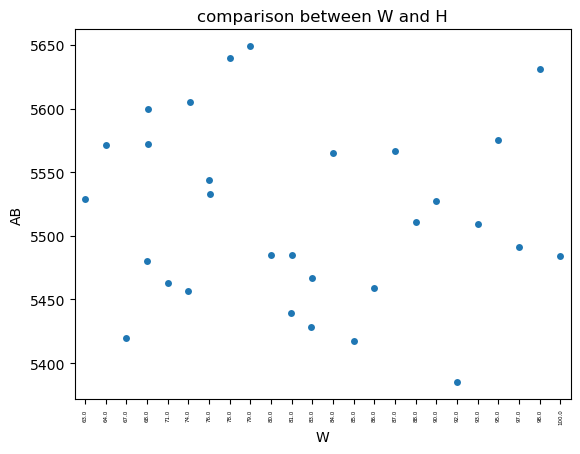

<Figure size 2800x200 with 0 Axes>

In [58]:
plt.title("comparison between W and H")
sns.stripplot(x= "W", y= "AB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclusive relationship between w and h.

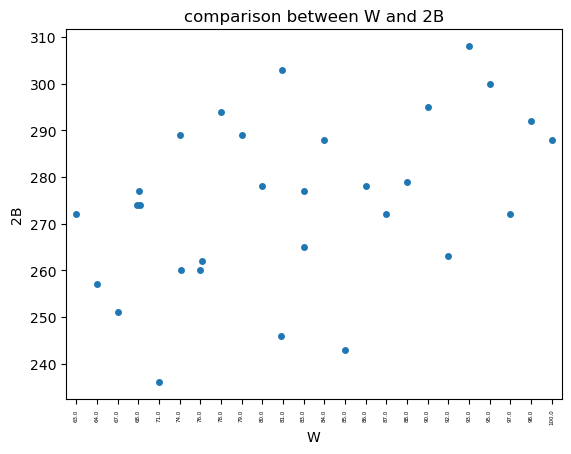

<Figure size 2800x200 with 0 Axes>

In [61]:
plt.title("comparison between W and 2B")
sns.stripplot(x= "W", y= "2B", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made between w and 2b.

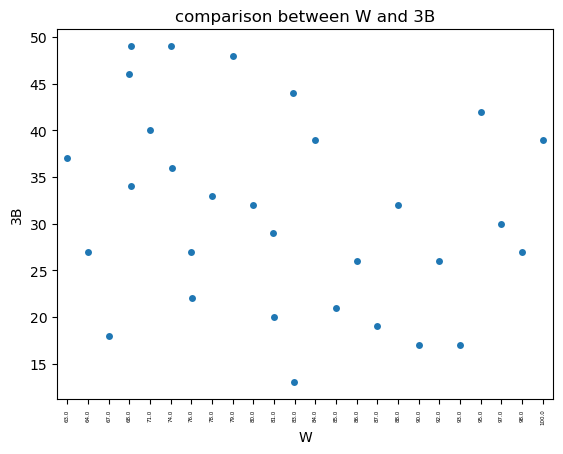

<Figure size 2800x200 with 0 Axes>

In [62]:
plt.title("comparison between W and 3B")
sns.stripplot(x= "W", y= "3B", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made between w and 3b.

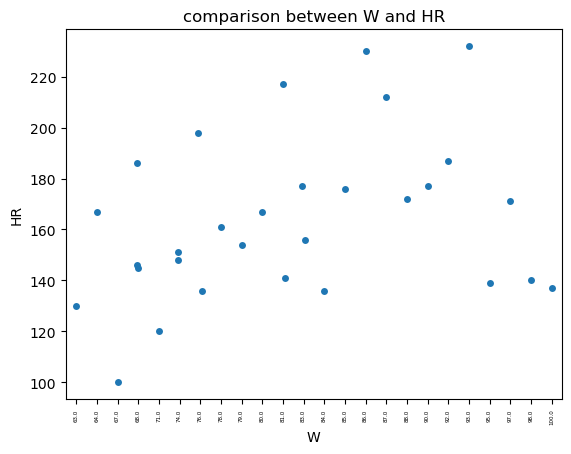

<Figure size 2800x200 with 0 Axes>

In [63]:
plt.title("comparison between W and HR")
sns.stripplot(x= "W", y= "HR", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

A weak positive correlation can be seen between w and hr.

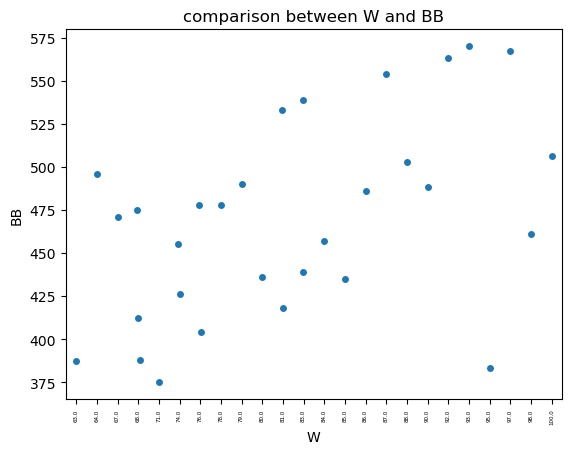

<Figure size 2800x200 with 0 Axes>

In [64]:
plt.title("comparison between W and BB")
sns.stripplot(x= "W", y= "BB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made between w and bb.

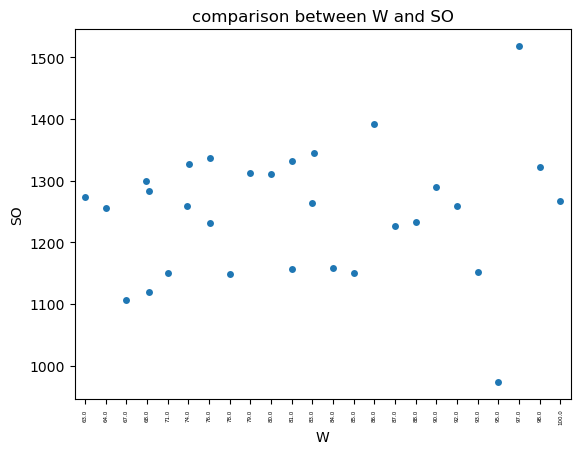

<Figure size 2800x200 with 0 Axes>

In [65]:
plt.title("comparison between W and SO")
sns.stripplot(x= "W", y= "SO", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

A very weak positive correlation can be made between w and so.

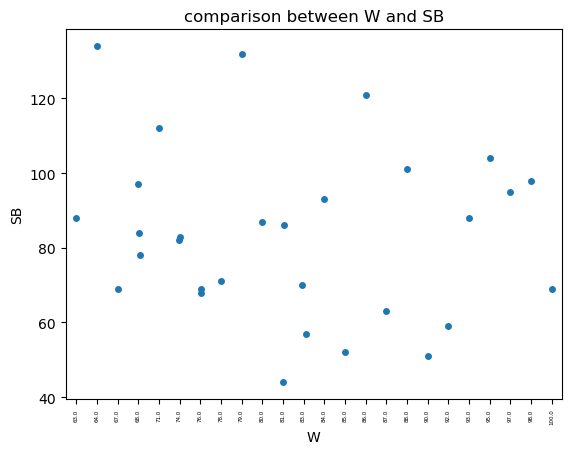

<Figure size 2800x200 with 0 Axes>

In [66]:
plt.title("comparison between W and SB")
sns.stripplot(x= "W", y= "SB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made between w and sb.

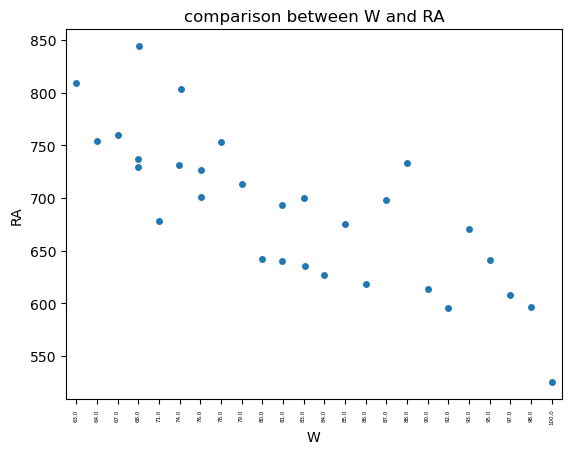

<Figure size 2800x200 with 0 Axes>

In [67]:
plt.title("comparison between W and RA")
sns.stripplot(x= "W", y= "RA", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
a strong negative correlation can be seen between w and ra.

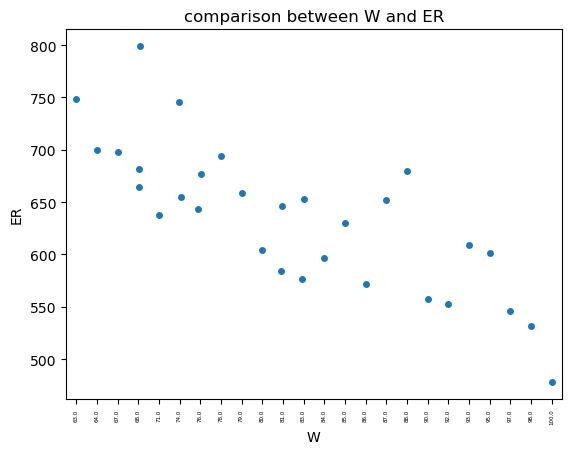

<Figure size 2800x200 with 0 Axes>

In [68]:
plt.title("comparison between W and ER")
sns.stripplot(x= "W", y= "ER", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

a strong negative correlation can be seen w and er.

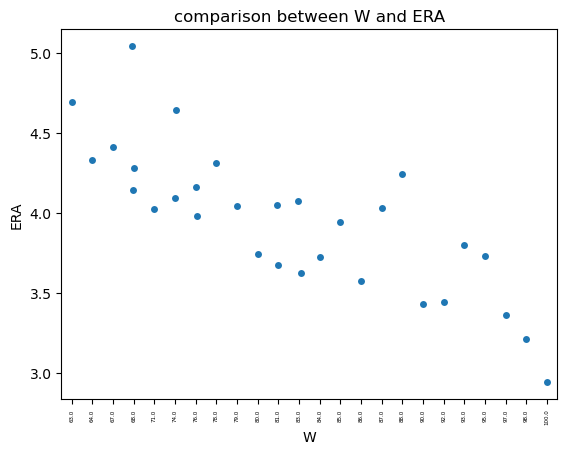

<Figure size 2800x200 with 0 Axes>

In [69]:
plt.title("comparison between W and ERA")
sns.stripplot(x= "W", y= "ERA", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

a strong negative correlation can be seen w and era.

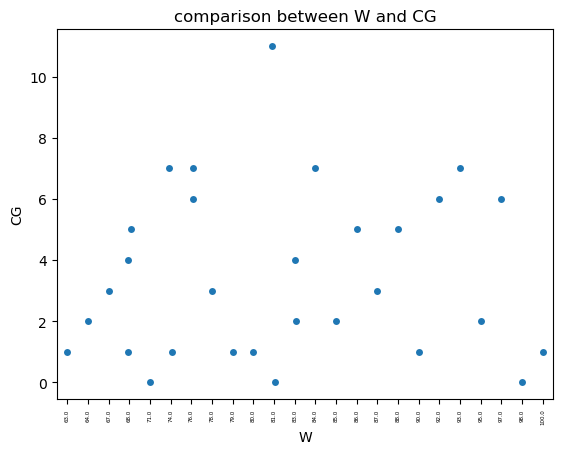

<Figure size 2800x200 with 0 Axes>

In [70]:
plt.title("comparison between W and CG")
sns.stripplot(x= "W", y= "CG", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between w and cg.

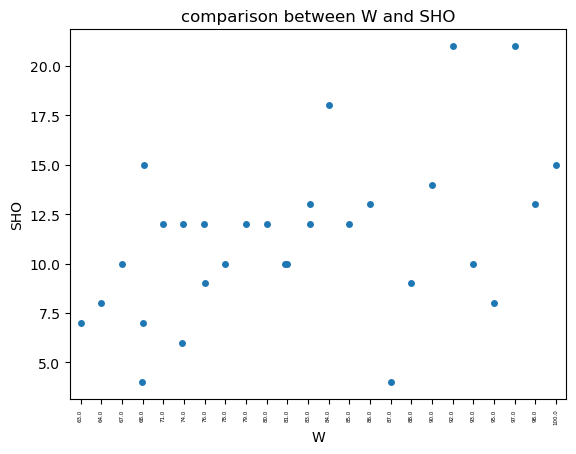

<Figure size 2800x200 with 0 Axes>

In [71]:
plt.title("comparison between W and SHO")
sns.stripplot(x= "W", y= "SHO", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between w and sho.

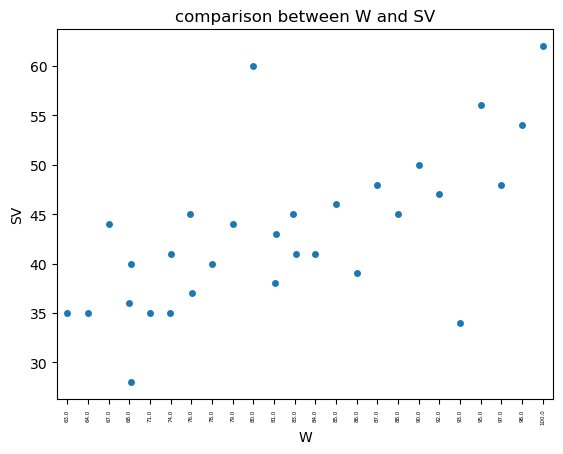

<Figure size 2800x200 with 0 Axes>

In [72]:
plt.title("comparison between W and SV")
sns.stripplot(x= "W", y= "SV", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

a strong positive correlation can be made between w and sv.

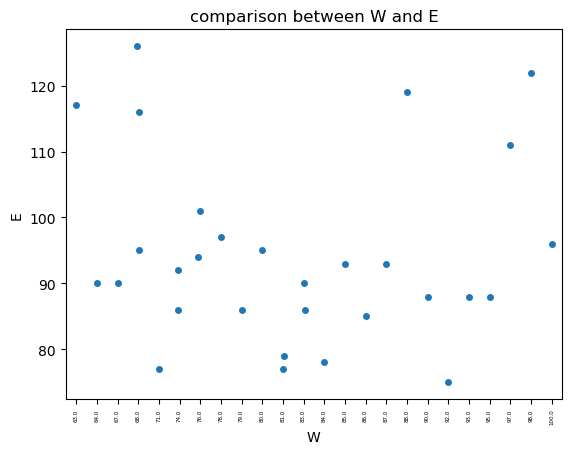

<Figure size 2800x200 with 0 Axes>

In [73]:
plt.title("comparison between W and E")
sns.stripplot(x= "W", y= "E", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between w and e.

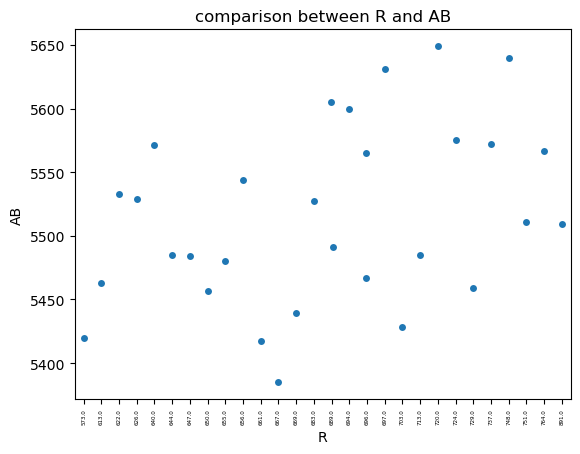

<Figure size 2800x200 with 0 Axes>

In [74]:
plt.title("comparison between R and AB")
sns.stripplot(x= "R", y= "AB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between w and ab.

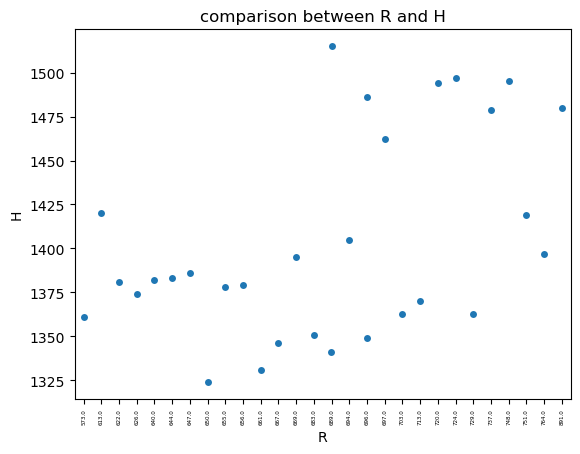

<Figure size 2800x200 with 0 Axes>

In [75]:
plt.title("comparison between R and H")
sns.stripplot(x= "R", y= "H", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between w and h.

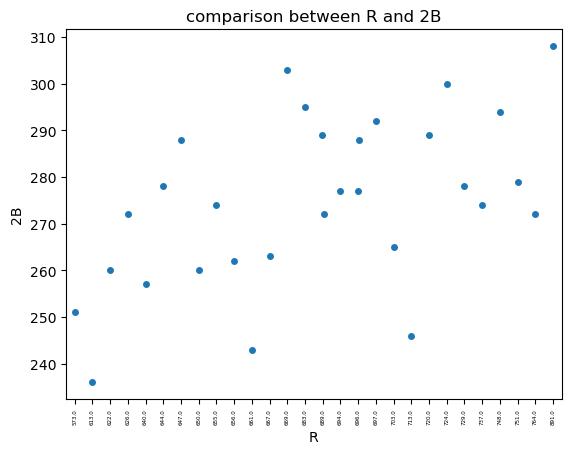

<Figure size 2800x200 with 0 Axes>

In [76]:
plt.title("comparison between R and 2B")
sns.stripplot(x= "R", y= "2B", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and 2b.

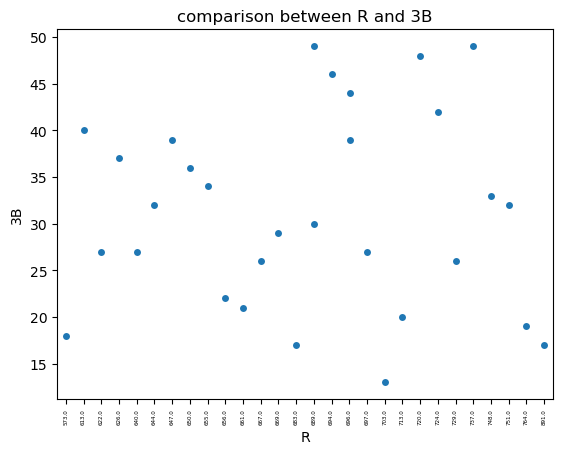

<Figure size 2800x200 with 0 Axes>

In [77]:
plt.title("comparison between R and 3B")
sns.stripplot(x= "R", y= "3B", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and 3b.

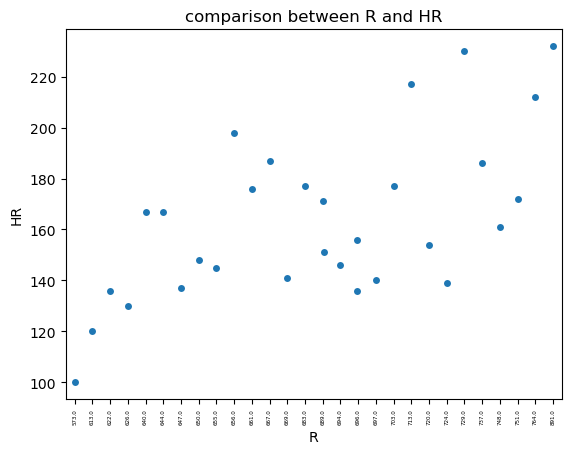

<Figure size 2800x200 with 0 Axes>

In [78]:
plt.title("comparison between R and HR")
sns.stripplot(x= "R", y= "HR", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

a weak positive correlation can be seen between r and hr.

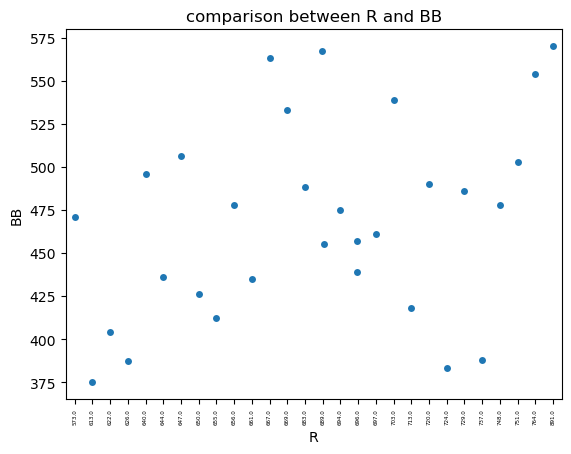

<Figure size 2800x200 with 0 Axes>

In [79]:
plt.title("comparison between R and BB")
sns.stripplot(x= "R", y= "BB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and bb.

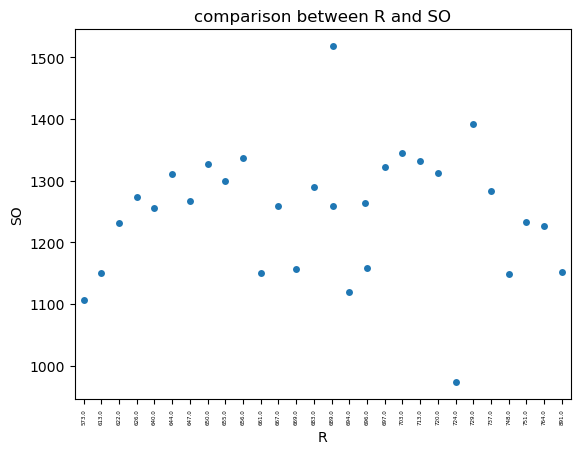

<Figure size 2800x200 with 0 Axes>

In [80]:
plt.title("comparison between R and SO")
sns.stripplot(x= "R", y= "SO", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and so.

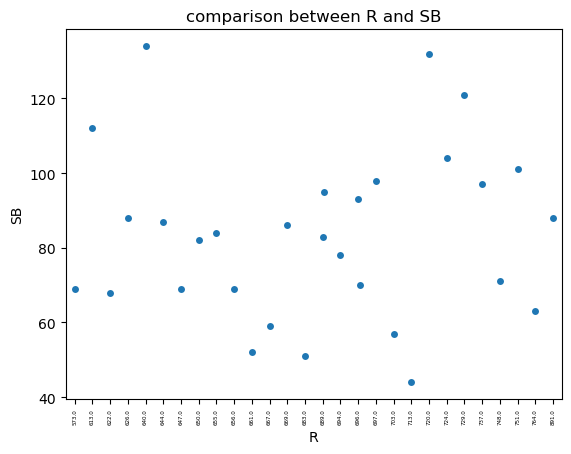

<Figure size 2800x200 with 0 Axes>

In [81]:
plt.title("comparison between R and SB")
sns.stripplot(x= "R", y= "SB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and sb.

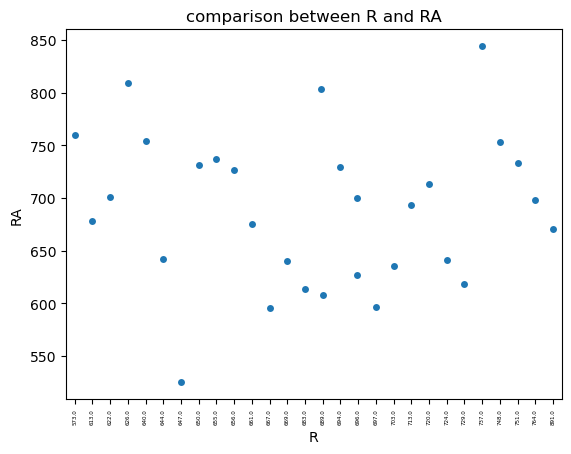

<Figure size 2800x200 with 0 Axes>

In [82]:
plt.title("comparison between R and RA")
sns.stripplot(x= "R", y= "RA", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and ra.

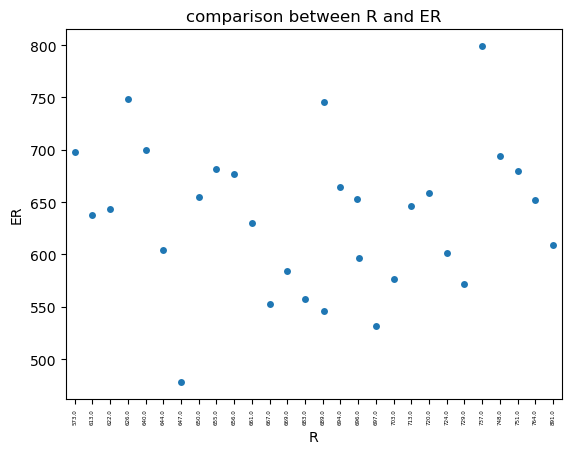

<Figure size 2800x200 with 0 Axes>

In [83]:
plt.title("comparison between R and ER")
sns.stripplot(x= "R", y= "ER", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and er.

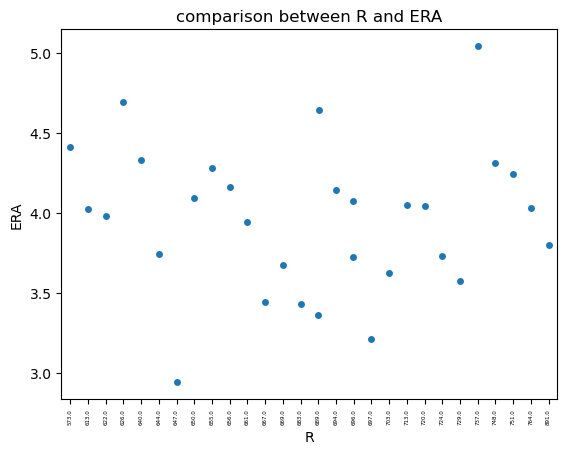

<Figure size 2800x200 with 0 Axes>

In [84]:
plt.title("comparison between R and ERA")
sns.stripplot(x= "R", y= "ERA", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and era.

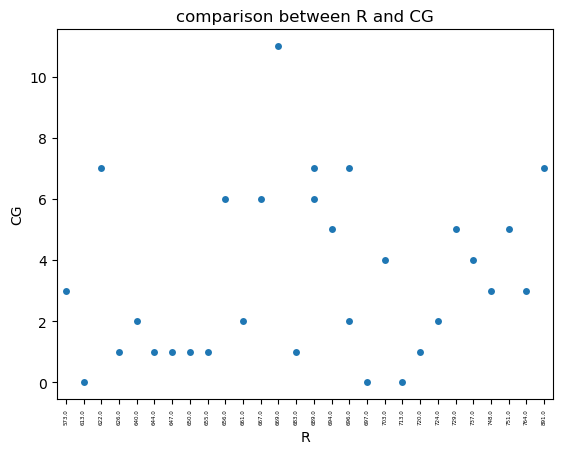

<Figure size 2800x200 with 0 Axes>

In [85]:
plt.title("comparison between R and CG")
sns.stripplot(x= "R", y= "CG", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and cg.

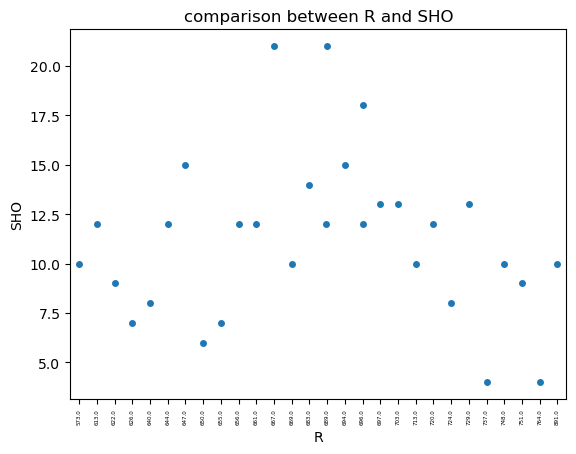

<Figure size 2800x200 with 0 Axes>

In [86]:
plt.title("comparison between R and SHO")
sns.stripplot(x= "R", y= "SHO", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and sho.

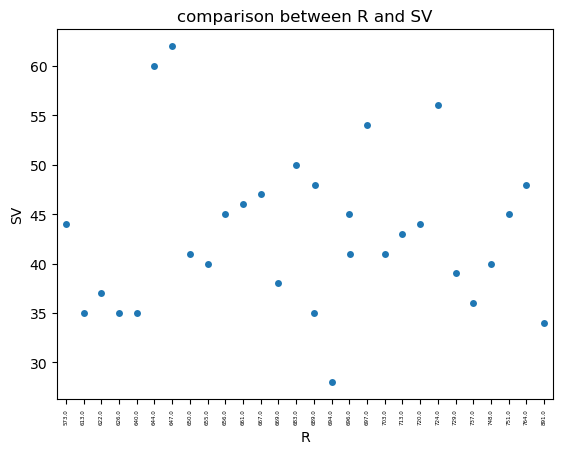

<Figure size 2800x200 with 0 Axes>

In [87]:
plt.title("comparison between R and SV")
sns.stripplot(x= "R", y= "SV", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and sv.

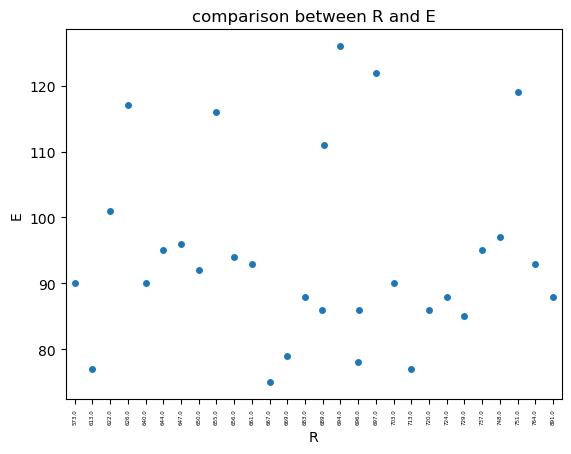

<Figure size 2800x200 with 0 Axes>

In [88]:
plt.title("comparison between R and E")
sns.stripplot(x= "R", y= "E", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between r and e.

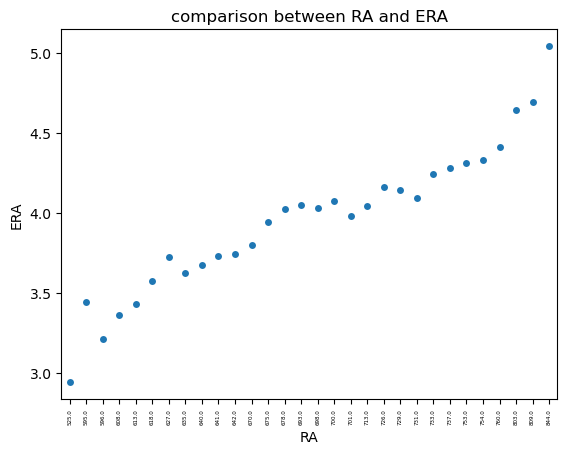

<Figure size 2800x200 with 0 Axes>

In [90]:
plt.title("comparison between RA and ERA")
sns.stripplot(x= "RA", y= "ERA", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

there is very strong relationship between ra and era.

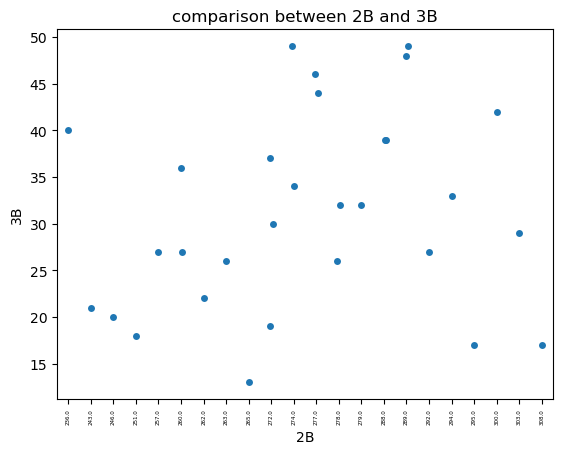

<Figure size 2800x200 with 0 Axes>

In [91]:
plt.title("comparison between 2B and 3B")
sns.stripplot(x= "2B", y= "3B", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between 2b and 3b.

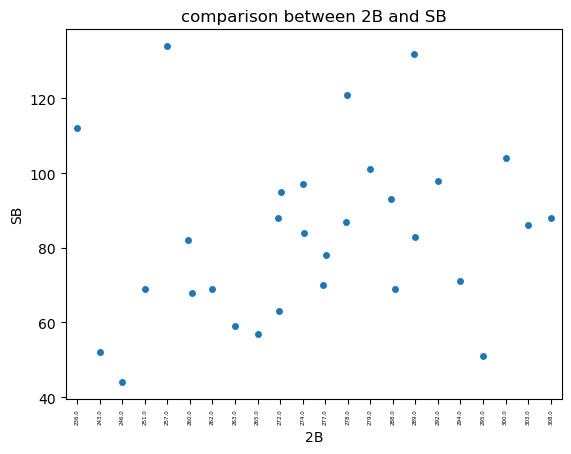

<Figure size 2800x200 with 0 Axes>

In [92]:
plt.title("comparison between 2B and SB")
sns.stripplot(x= "2B", y= "SB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between 2b and sb.

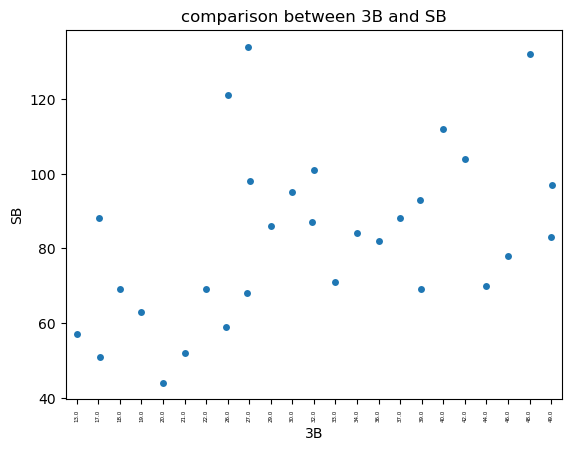

<Figure size 2800x200 with 0 Axes>

In [93]:
plt.title("comparison between 3B and SB")
sns.stripplot(x= "3B", y= "SB", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

they have weak positive correlation between 3b and sb.

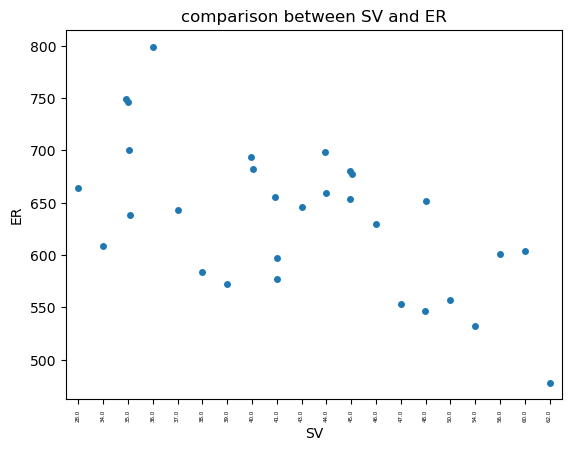

<Figure size 2800x200 with 0 Axes>

In [94]:
plt.title("comparison between SV and ER")
sns.stripplot(x= "SV", y= "ER", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

they have weak negative correlation between sv and er.

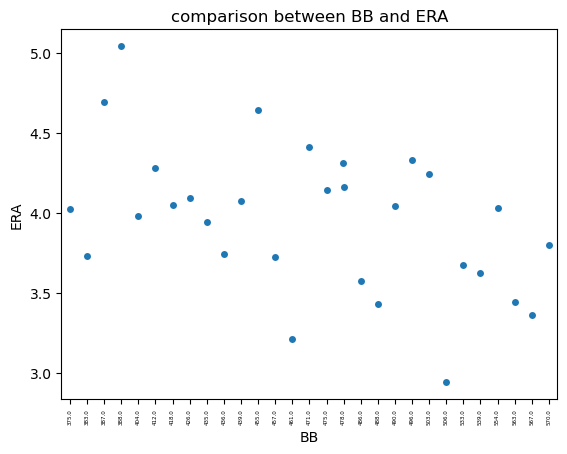

<Figure size 2800x200 with 0 Axes>

In [95]:
plt.title("comparison between BB and ERA")
sns.stripplot(x= "BB", y= "ERA", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between bb and era.

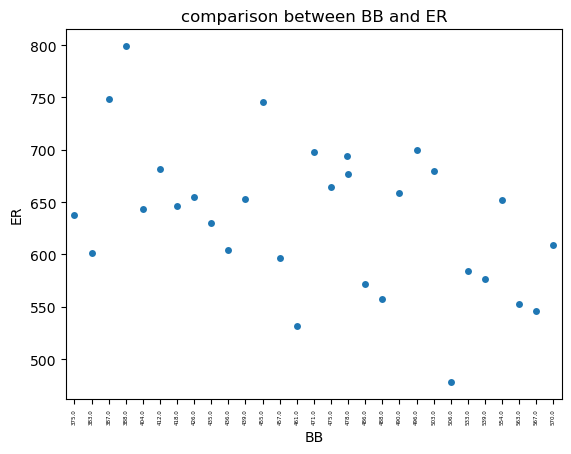

<Figure size 2800x200 with 0 Axes>

In [96]:
plt.title("comparison between BB and ER")
sns.stripplot(x= "BB", y= "ER", data =baseball_data)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made between bb and er.

Scatterplot

Among all the scatterplots we have created, there were no conclusive statements that can be made other than the findign we got in strip plots and few details listed below.

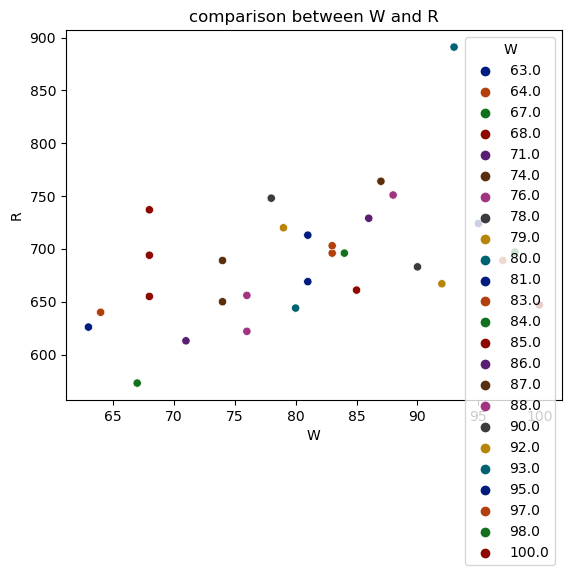

In [98]:
plt.title("comparison between W and R")
sns.scatterplot(x= 'W', y= 'R', data = baseball_data,hue='W', palette='dark')
plt.show()

For teams with wins more than 63 and less than 81, most of them had made runs around 630 to 720.
Teams with 63 wins had runs between 630 and 650.
Teams with 88 and 76 have runs between 620 to 670.
Most of the teams have runs with 500 to 760.

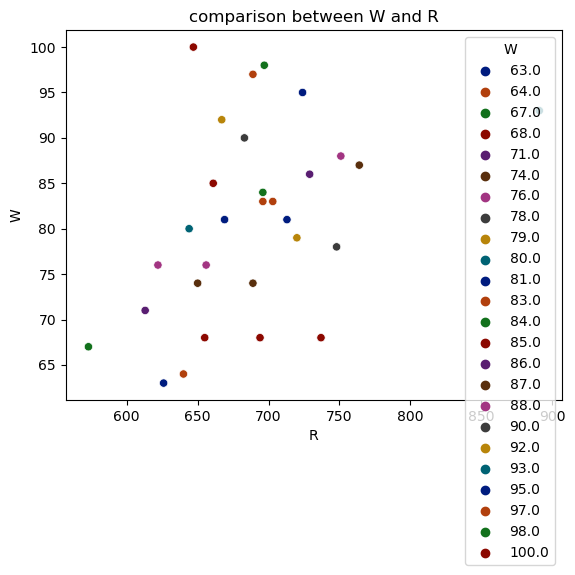

In [99]:
plt.title("comparison between W and R")
sns.scatterplot(x= 'R', y= 'W', data = baseball_data,hue='W', palette='dark')
plt.show()

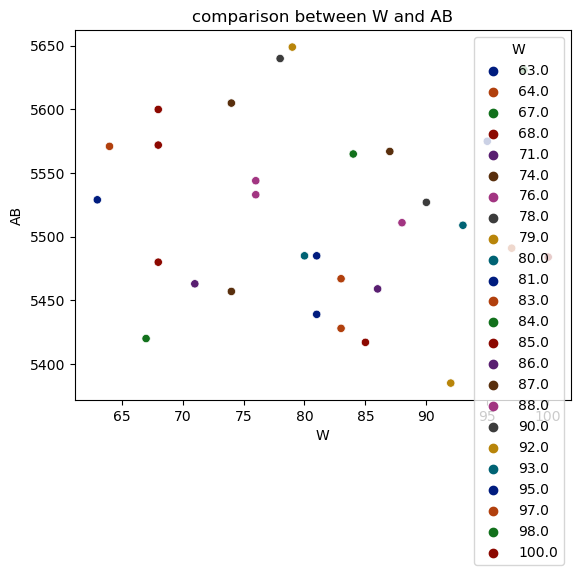

In [100]:
plt.title("comparison between W and AB")
sns.scatterplot(x= 'W', y= 'AB', data = baseball_data,hue='W', palette='dark')
plt.show()

MOST OF THE TEAAMS WITH WINS ARE ALL OVER THE PLACE.
Most of the blue dots(63,81 and 95) are between 5430 to 5540.
Most of the green dots(98, 84 and 67) are in 5420, 5560 respectively
Most of the yellow dots(79,92) are in 5410

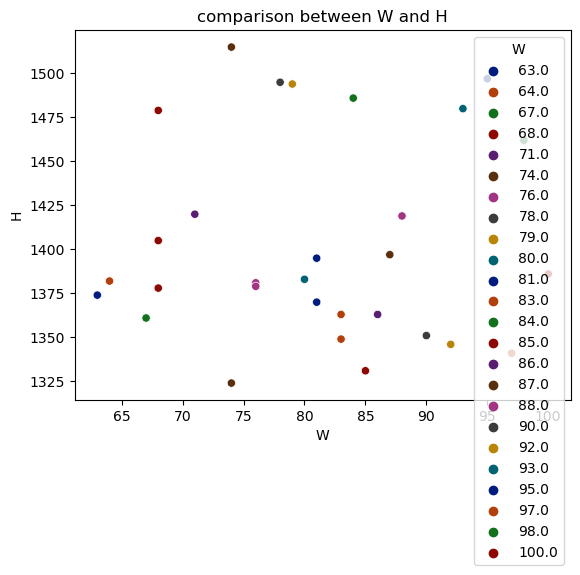

In [101]:
plt.title("comparison between W and H")
sns.scatterplot(x= 'W', y= 'H', data = baseball_data,hue='W', palette='dark')
plt.show()

Rest of the plots are also showing some unconclusive statements other than the ranges of wins for different rates of input variables.

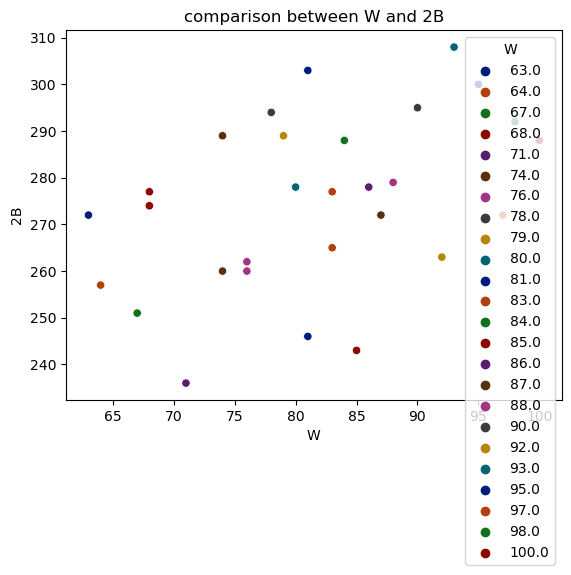

In [102]:
plt.title("comparison between W and 2B")
sns.scatterplot(x= 'W', y= '2B', data = baseball_data,hue='W', palette='dark')
plt.show()

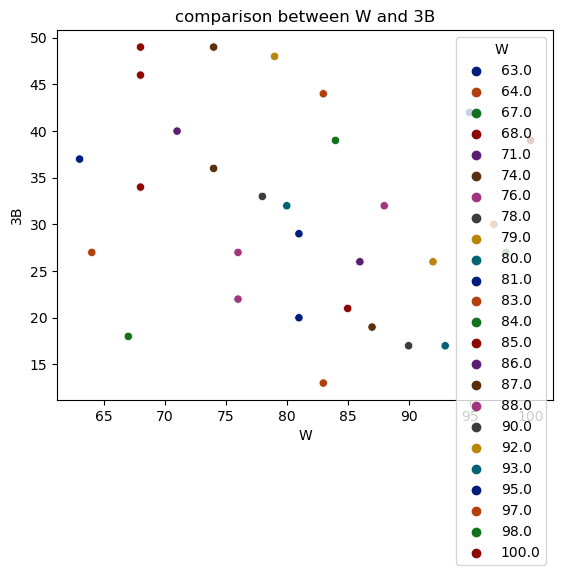

In [103]:
plt.title("comparison between W and 3B")
sns.scatterplot(x= 'W', y= '3B', data = baseball_data,hue='W', palette='dark')
plt.show()

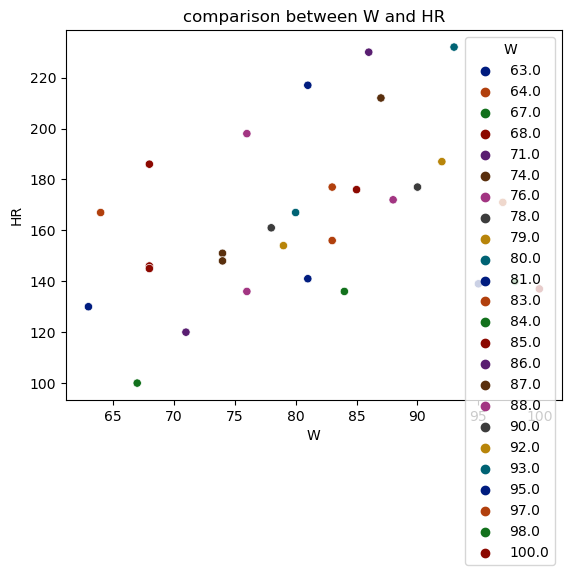

In [104]:
plt.title("comparison between W and HR")
sns.scatterplot(x= 'W', y= 'HR', data = baseball_data,hue='W', palette='dark')
plt.show()

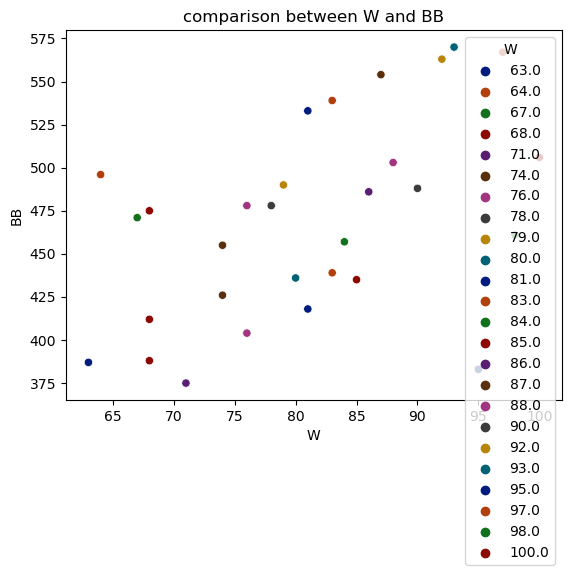

In [105]:
plt.title("comparison between W and BB")
sns.scatterplot(x= 'W', y= 'BB', data = baseball_data,hue='W', palette='dark')
plt.show()

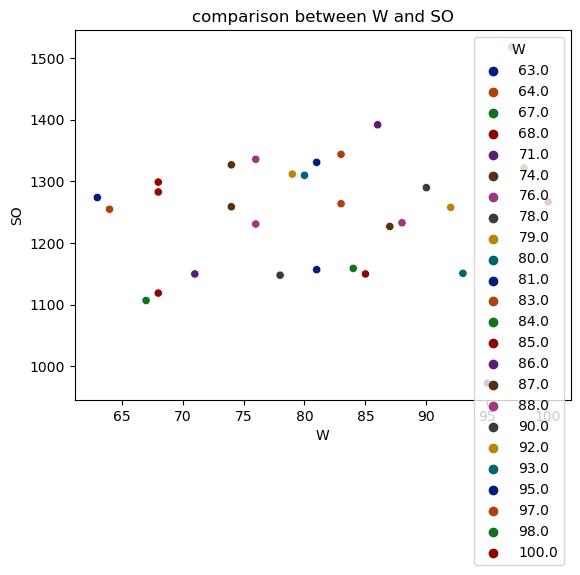

In [106]:
plt.title("comparison between W and SO")
sns.scatterplot(x= 'W', y= 'SO', data = baseball_data,hue='W', palette='dark')
plt.show()

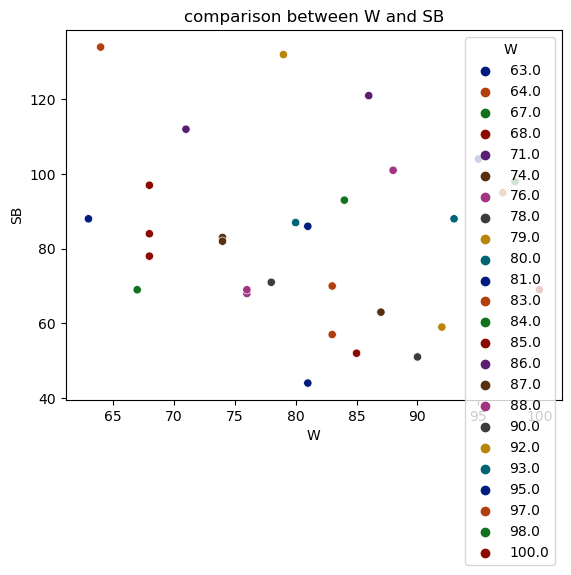

In [107]:
plt.title("comparison between W and SB")
sns.scatterplot(x= 'W', y= 'SB', data = baseball_data,hue='W', palette='dark')
plt.show()

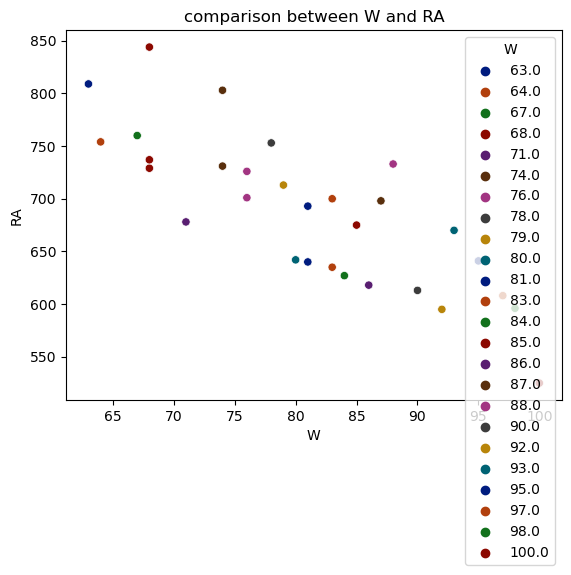

In [108]:
plt.title("comparison between W and RA")
sns.scatterplot(x= 'W', y= 'RA', data = baseball_data,hue='W', palette='dark')
plt.show()

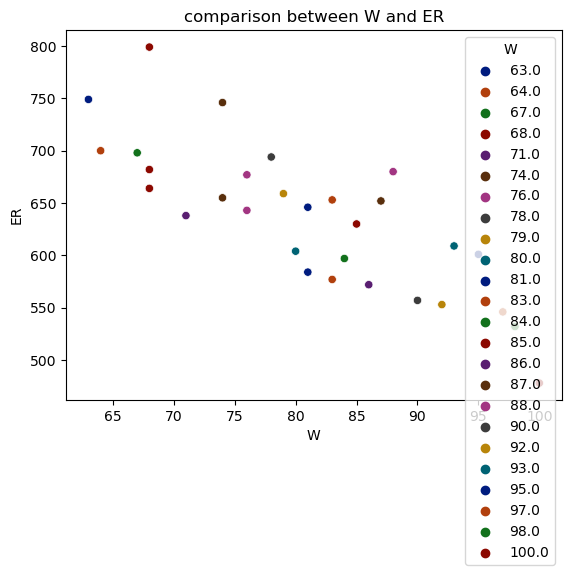

In [109]:
plt.title("comparison between W and ER")
sns.scatterplot(x= 'W', y= 'ER', data = baseball_data,hue='W', palette='dark')
plt.show()

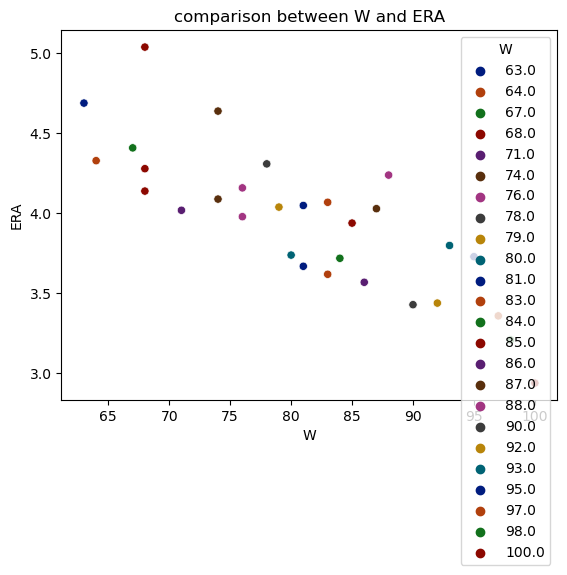

In [110]:
plt.title("comparison between W and ERA")
sns.scatterplot(x= 'W', y= 'ERA', data = baseball_data,hue='W', palette='dark')
plt.show()

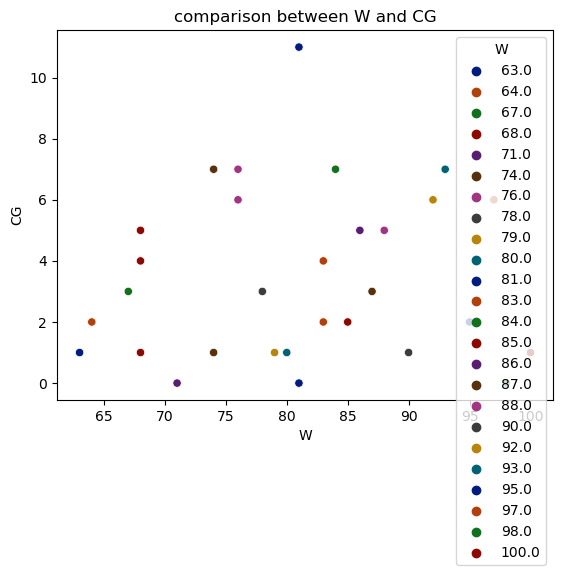

In [111]:
plt.title("comparison between W and CG")
sns.scatterplot(x= 'W', y= 'CG', data = baseball_data,hue='W', palette='dark')
plt.show()

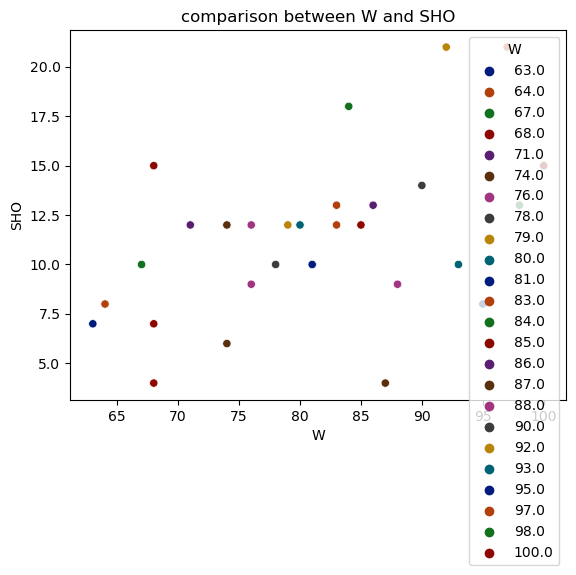

In [112]:
plt.title("comparison between W and SHO")
sns.scatterplot(x= 'W', y= 'SHO', data = baseball_data,hue='W', palette='dark')
plt.show()

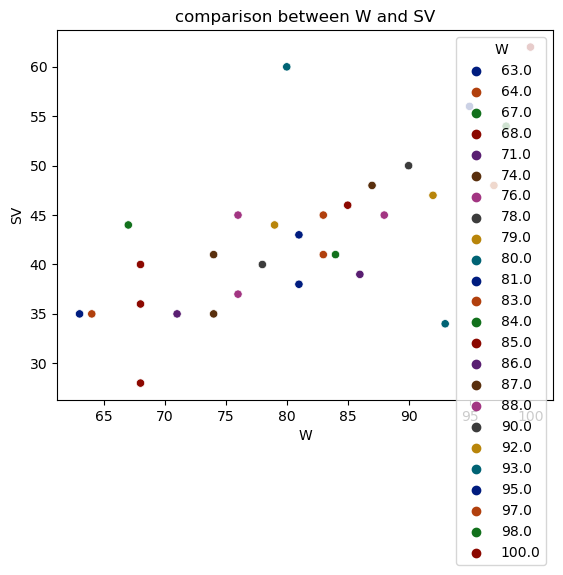

In [113]:
plt.title("comparison between W and SV")
sns.scatterplot(x= 'W', y= 'SV', data = baseball_data,hue='W', palette='dark')
plt.show()

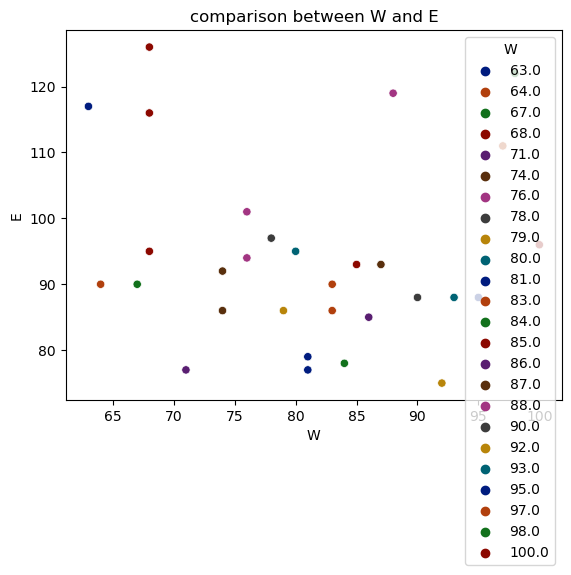

In [114]:
plt.title("comparison between W and E")
sns.scatterplot(x= 'W', y= 'E', data = baseball_data,hue='W', palette='dark')
plt.show()

Barplotx

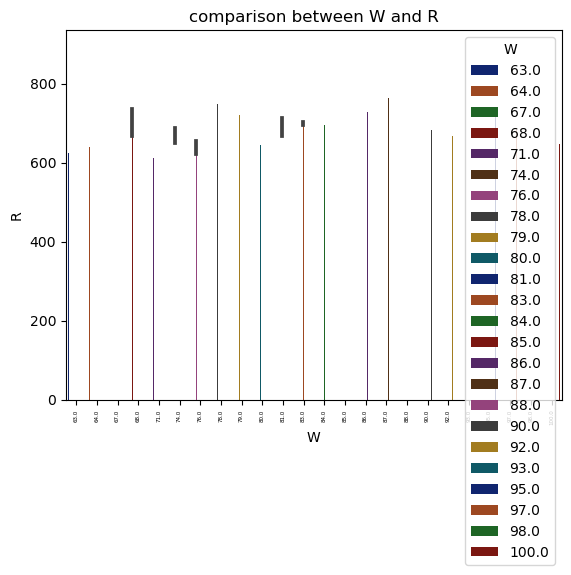

<Figure size 2800x200 with 0 Axes>

In [115]:
plt.title("comparison between W and R")
sns.barplot(x= "W", y= "R", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

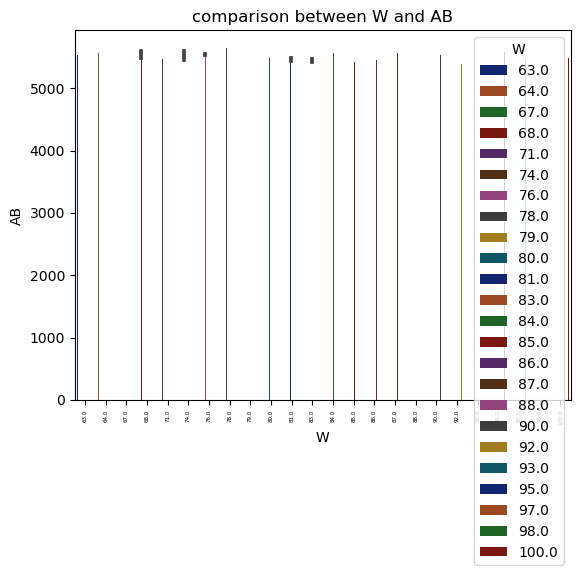

<Figure size 2800x200 with 0 Axes>

In [116]:
plt.title("comparison between W and AB")
sns.barplot(x= "W", y= "AB", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

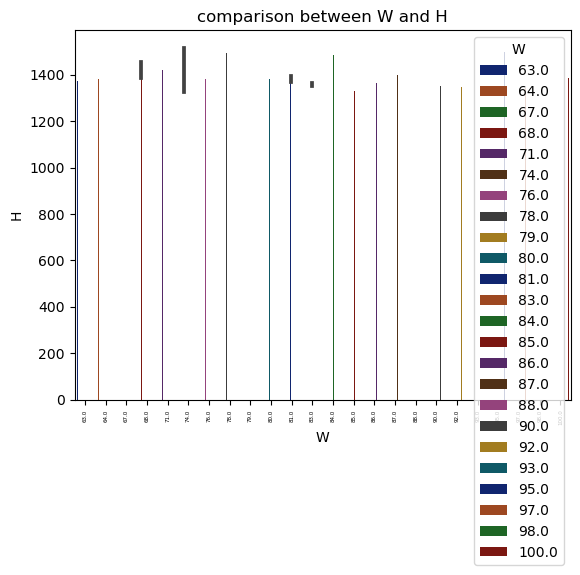

<Figure size 2800x200 with 0 Axes>

In [117]:
plt.title("comparison between W and H")
sns.barplot(x= "W", y= "H", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

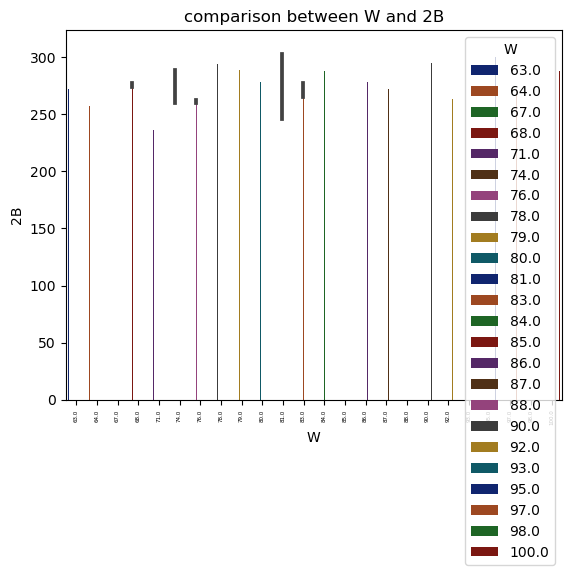

<Figure size 2800x200 with 0 Axes>

In [118]:
plt.title("comparison between W and 2B")
sns.barplot(x= "W", y= "2B", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

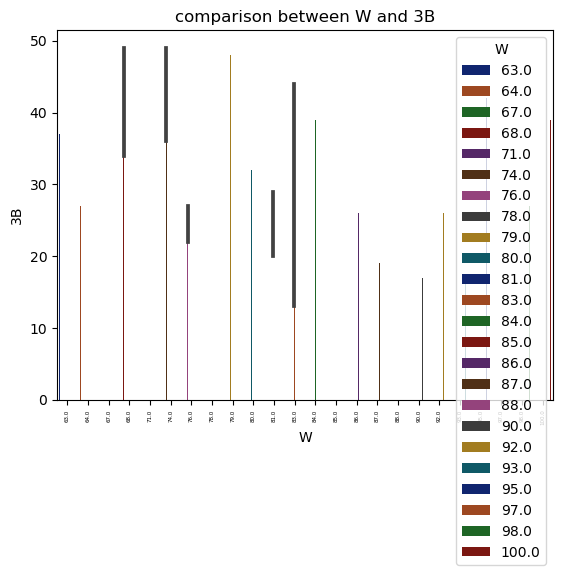

<Figure size 2800x200 with 0 Axes>

In [119]:
plt.title("comparison between W and 3B")
sns.barplot(x= "W", y= "3B", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

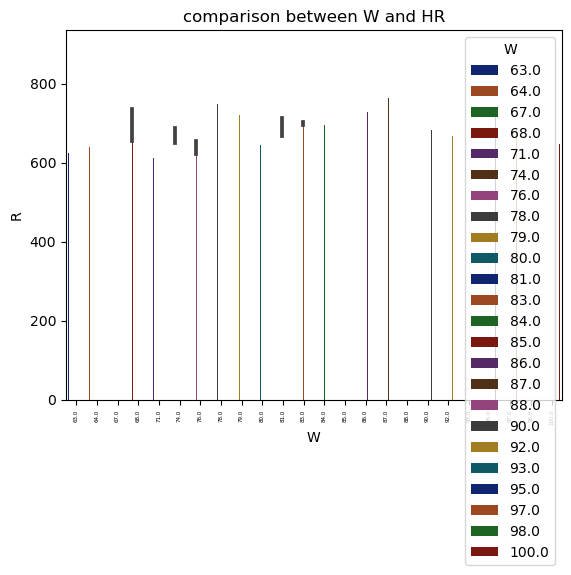

<Figure size 2800x200 with 0 Axes>

In [120]:
plt.title("comparison between W and HR")
sns.barplot(x= "W", y= "R", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

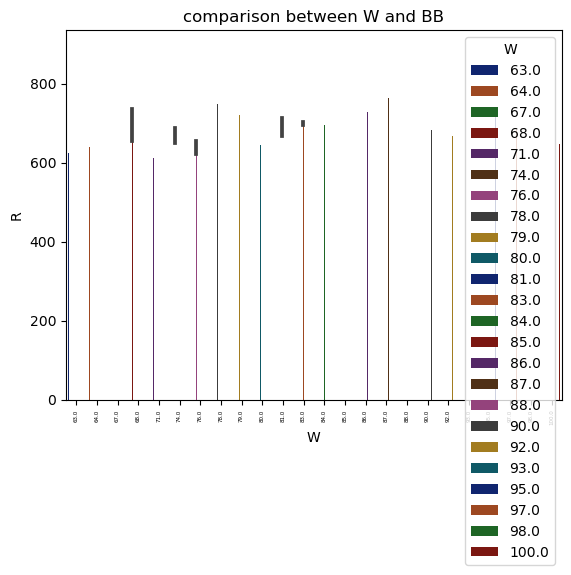

<Figure size 2800x200 with 0 Axes>

In [121]:
plt.title("comparison between W and BB")
sns.barplot(x= "W", y= "R", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

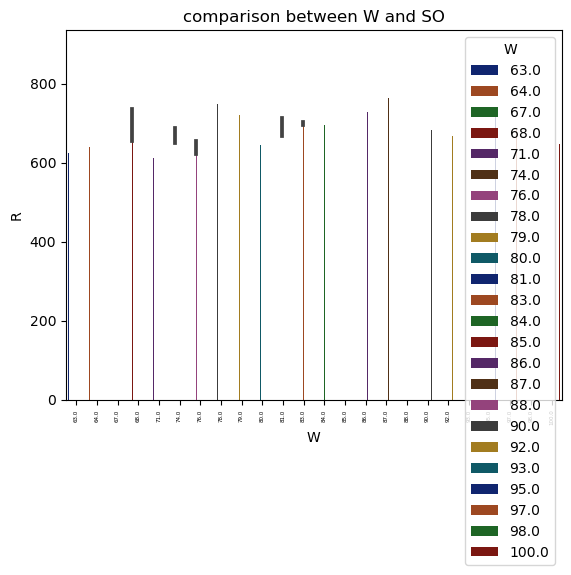

<Figure size 2800x200 with 0 Axes>

In [122]:
plt.title("comparison between W and SO")
sns.barplot(x= "W", y= "R", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

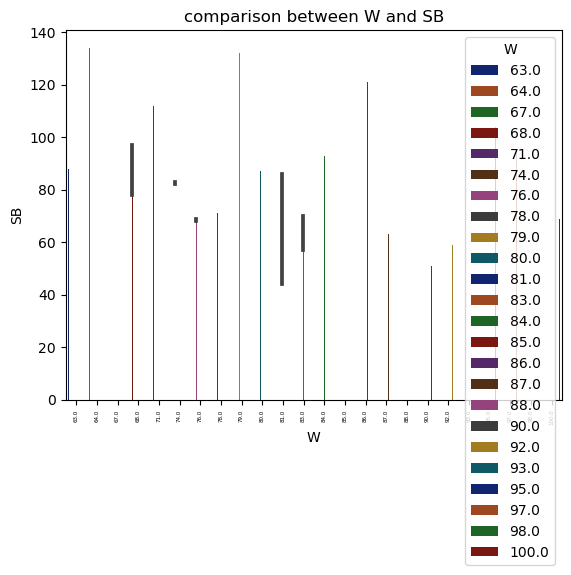

<Figure size 2800x200 with 0 Axes>

In [123]:
plt.title("comparison between W and SB")
sns.barplot(x= "W", y= "SB", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

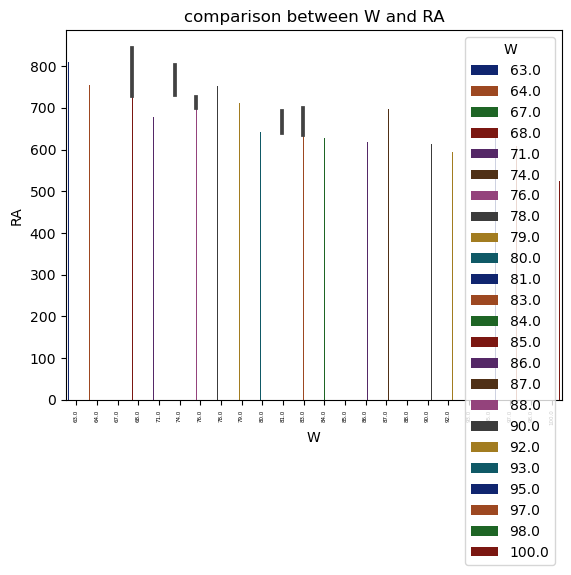

<Figure size 2800x200 with 0 Axes>

In [124]:
plt.title("comparison between W and RA")
sns.barplot(x= "W", y= "RA", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

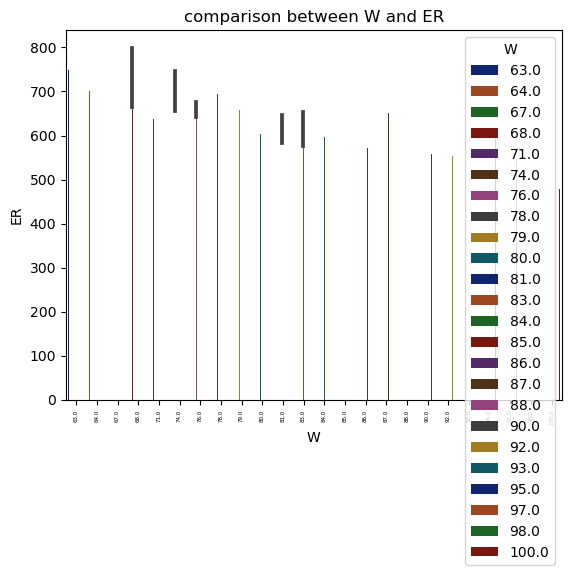

<Figure size 2800x200 with 0 Axes>

In [125]:
plt.title("comparison between W and ER")
sns.barplot(x= "W", y= "ER", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

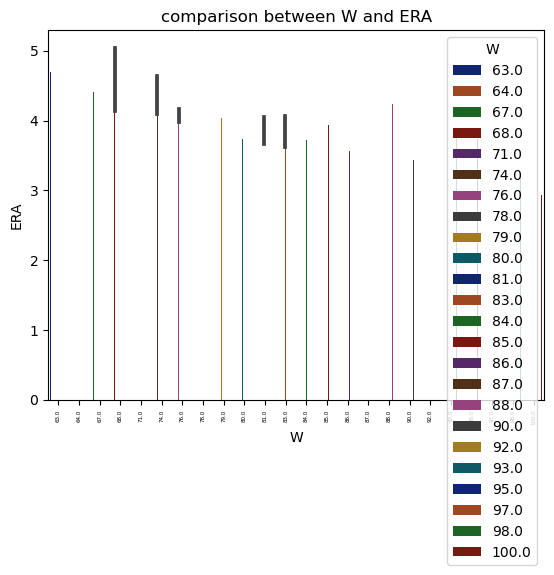

<Figure size 2800x200 with 0 Axes>

In [126]:
plt.title("comparison between W and ERA")
sns.barplot(x= "W", y= "ERA", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

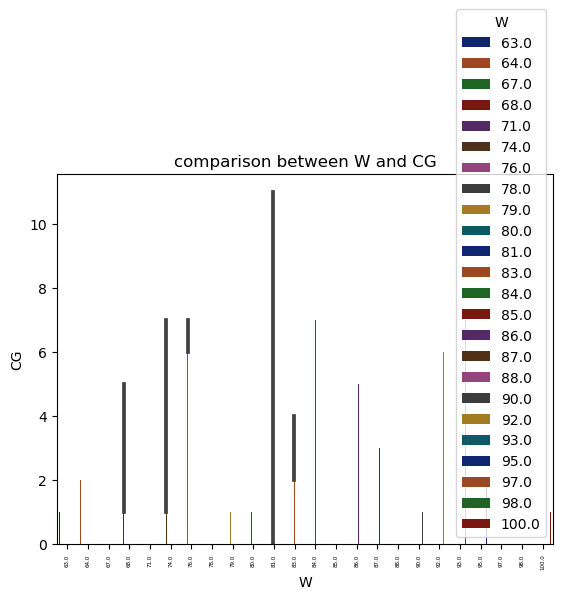

<Figure size 2800x200 with 0 Axes>

In [127]:
plt.title("comparison between W and CG")
sns.barplot(x= "W", y= "CG", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

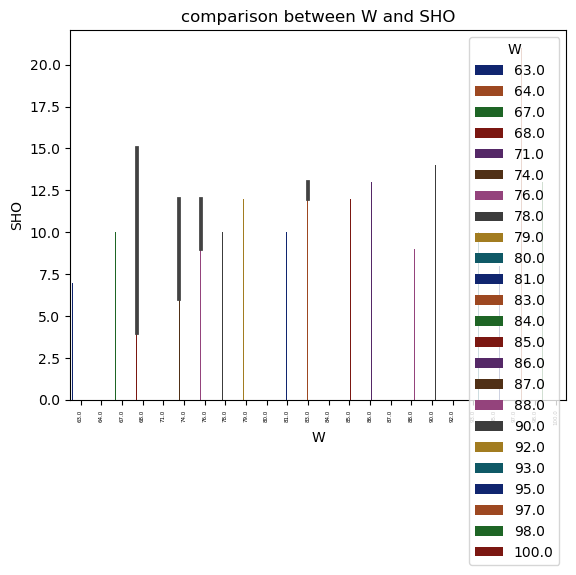

<Figure size 2800x200 with 0 Axes>

In [128]:
plt.title("comparison between W and SHO")
sns.barplot(x= "W", y= "SHO", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

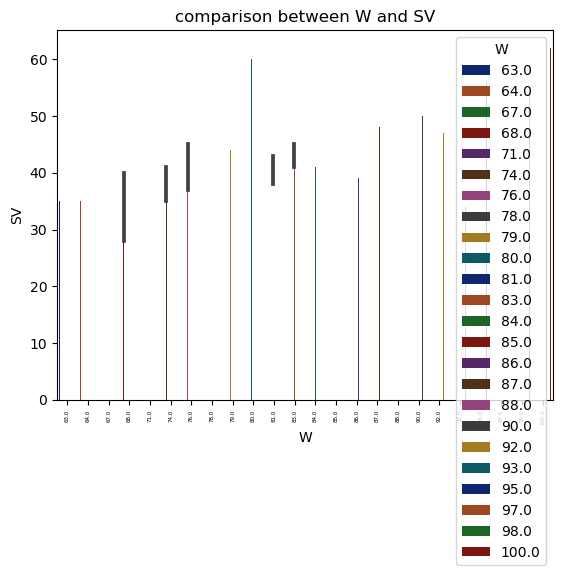

<Figure size 2800x200 with 0 Axes>

In [129]:
plt.title("comparison between W and SV")
sns.barplot(x= "W", y= "SV", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

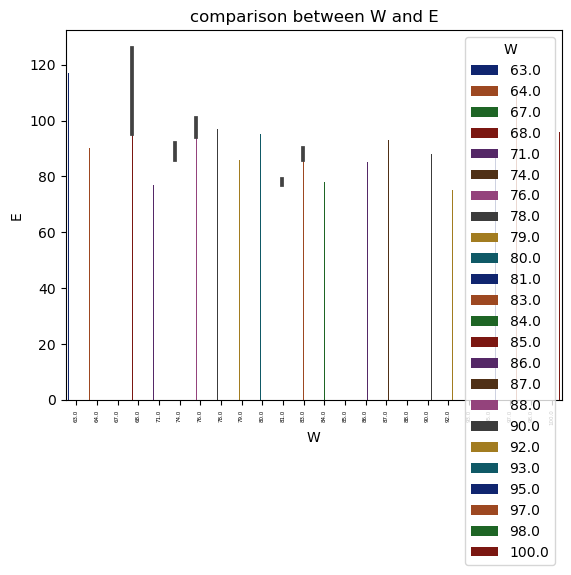

<Figure size 2800x200 with 0 Axes>

In [130]:
plt.title("comparison between W and E")
sns.barplot(x= "W", y= "E", data = baseball_data,hue='W', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Linear Regression Plots.

All the findings we had in strip plots are further visualised through the linear regression plots.

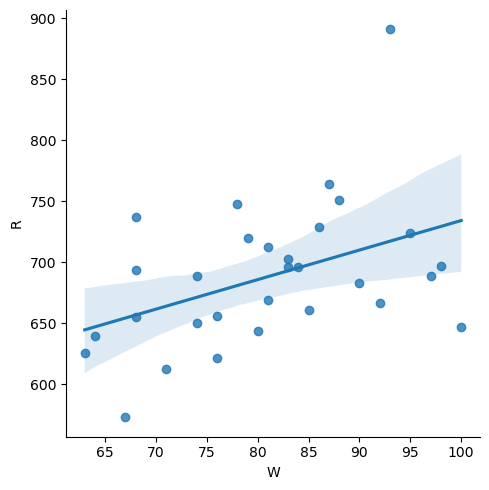

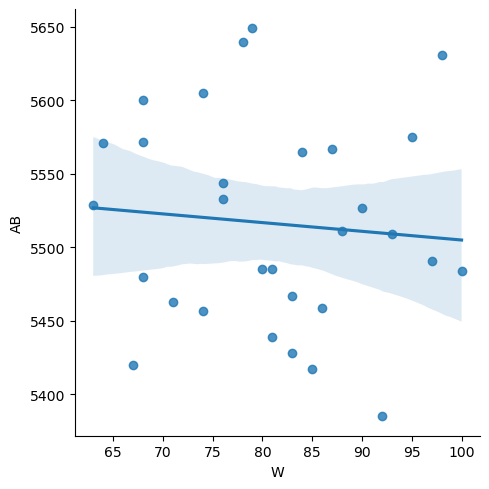

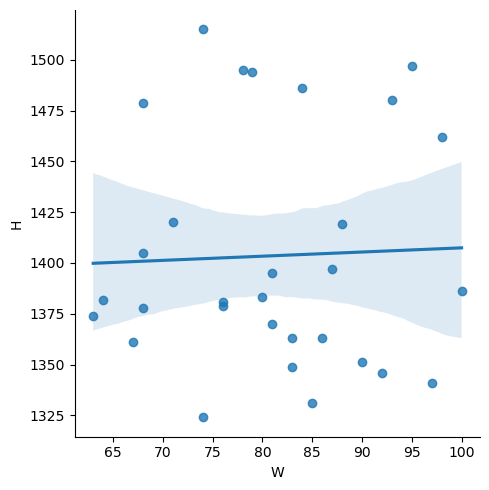

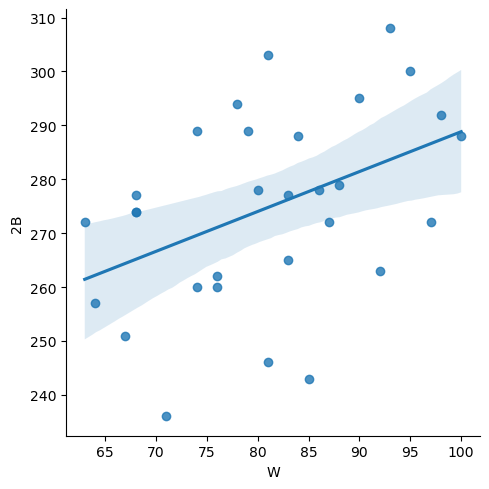

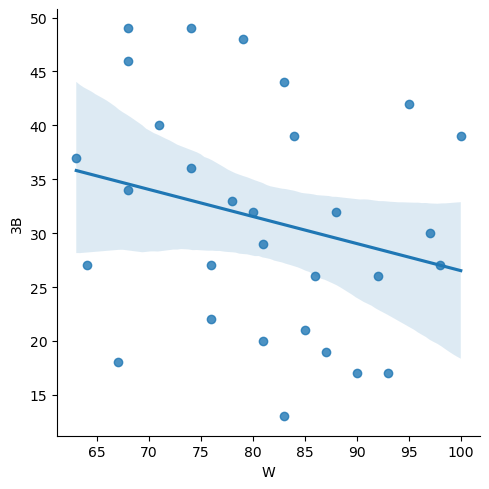

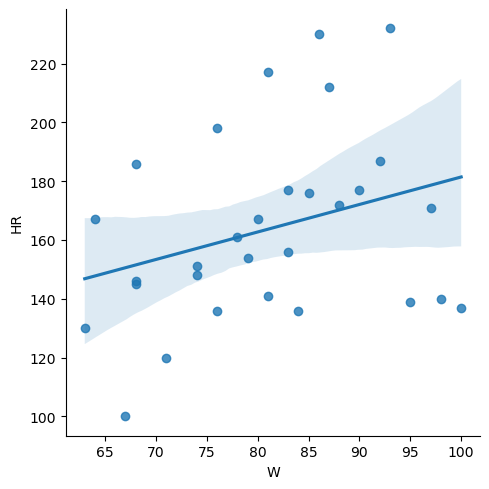

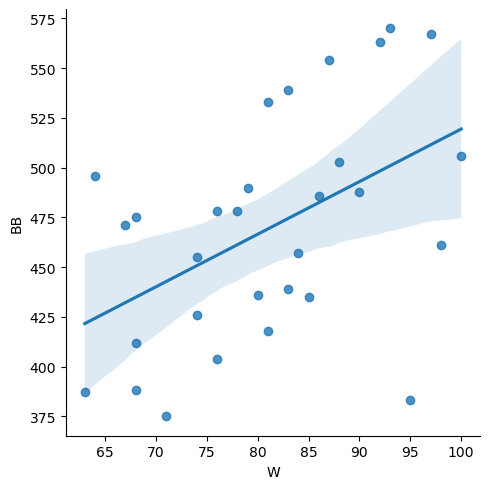

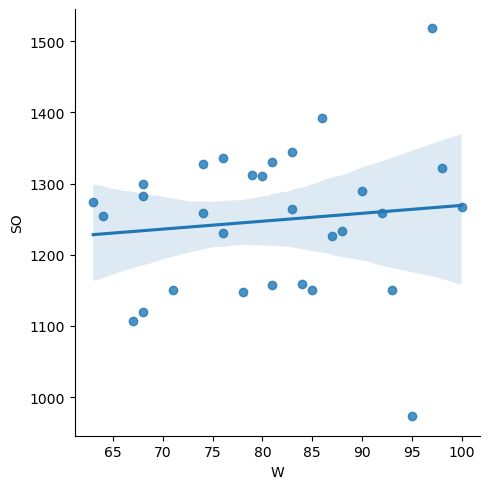

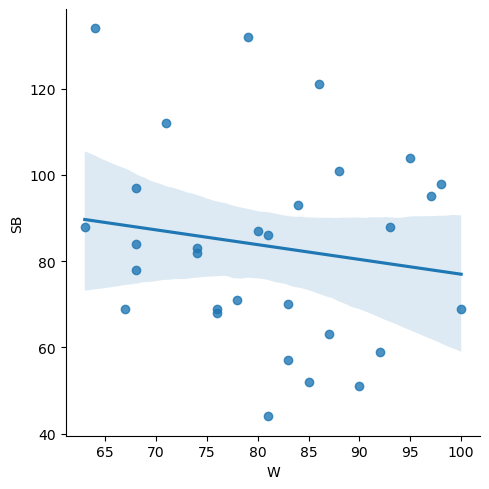

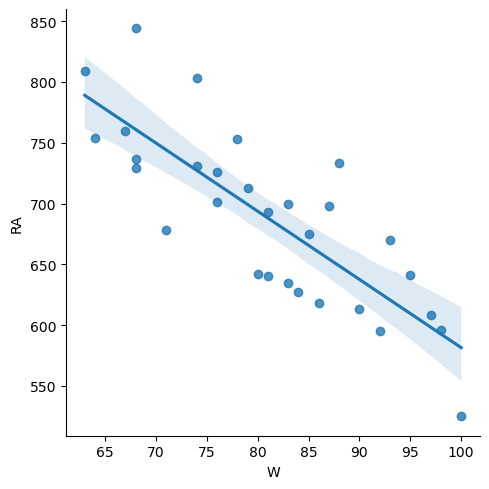

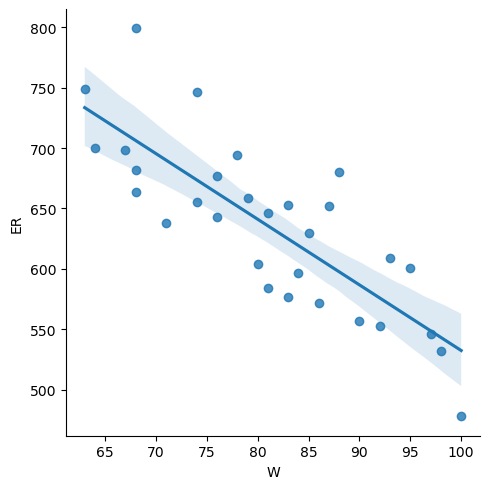

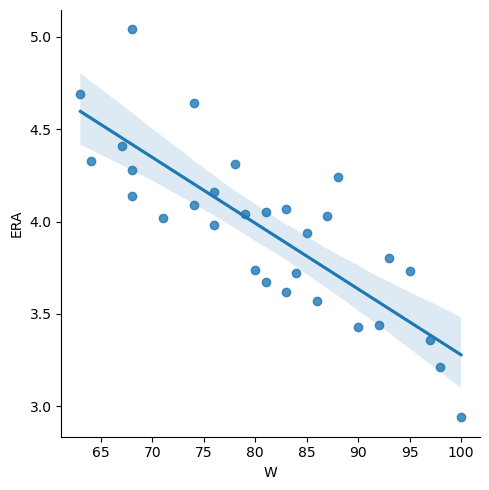

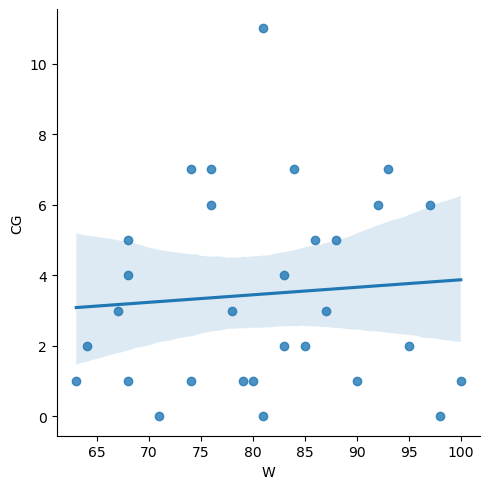

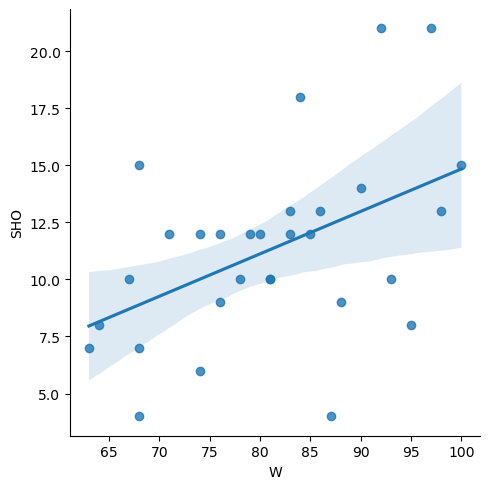

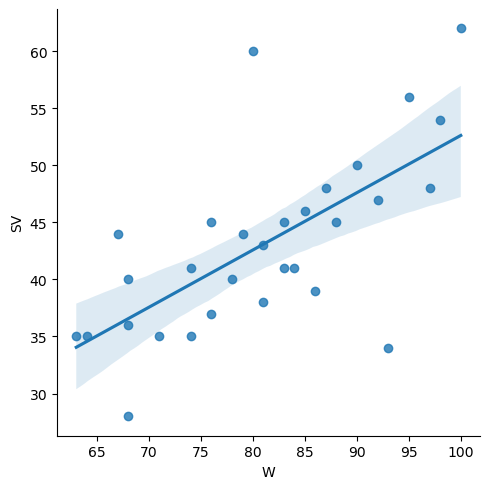

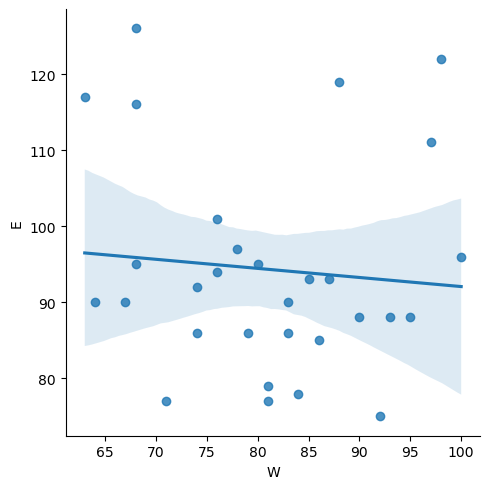

In [131]:
sns.lmplot(x='W', y= 'R', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'AB', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'H', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= '2B', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= '3B', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'HR', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'BB', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'SO', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'SB', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'RA', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'ER', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'ERA', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'CG', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'SHO', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'SV', data=baseball_data,palette='colorblind')
sns.lmplot(x='W', y= 'E', data=baseball_data,palette='colorblind')


Multivariate Analysis

Pairplots

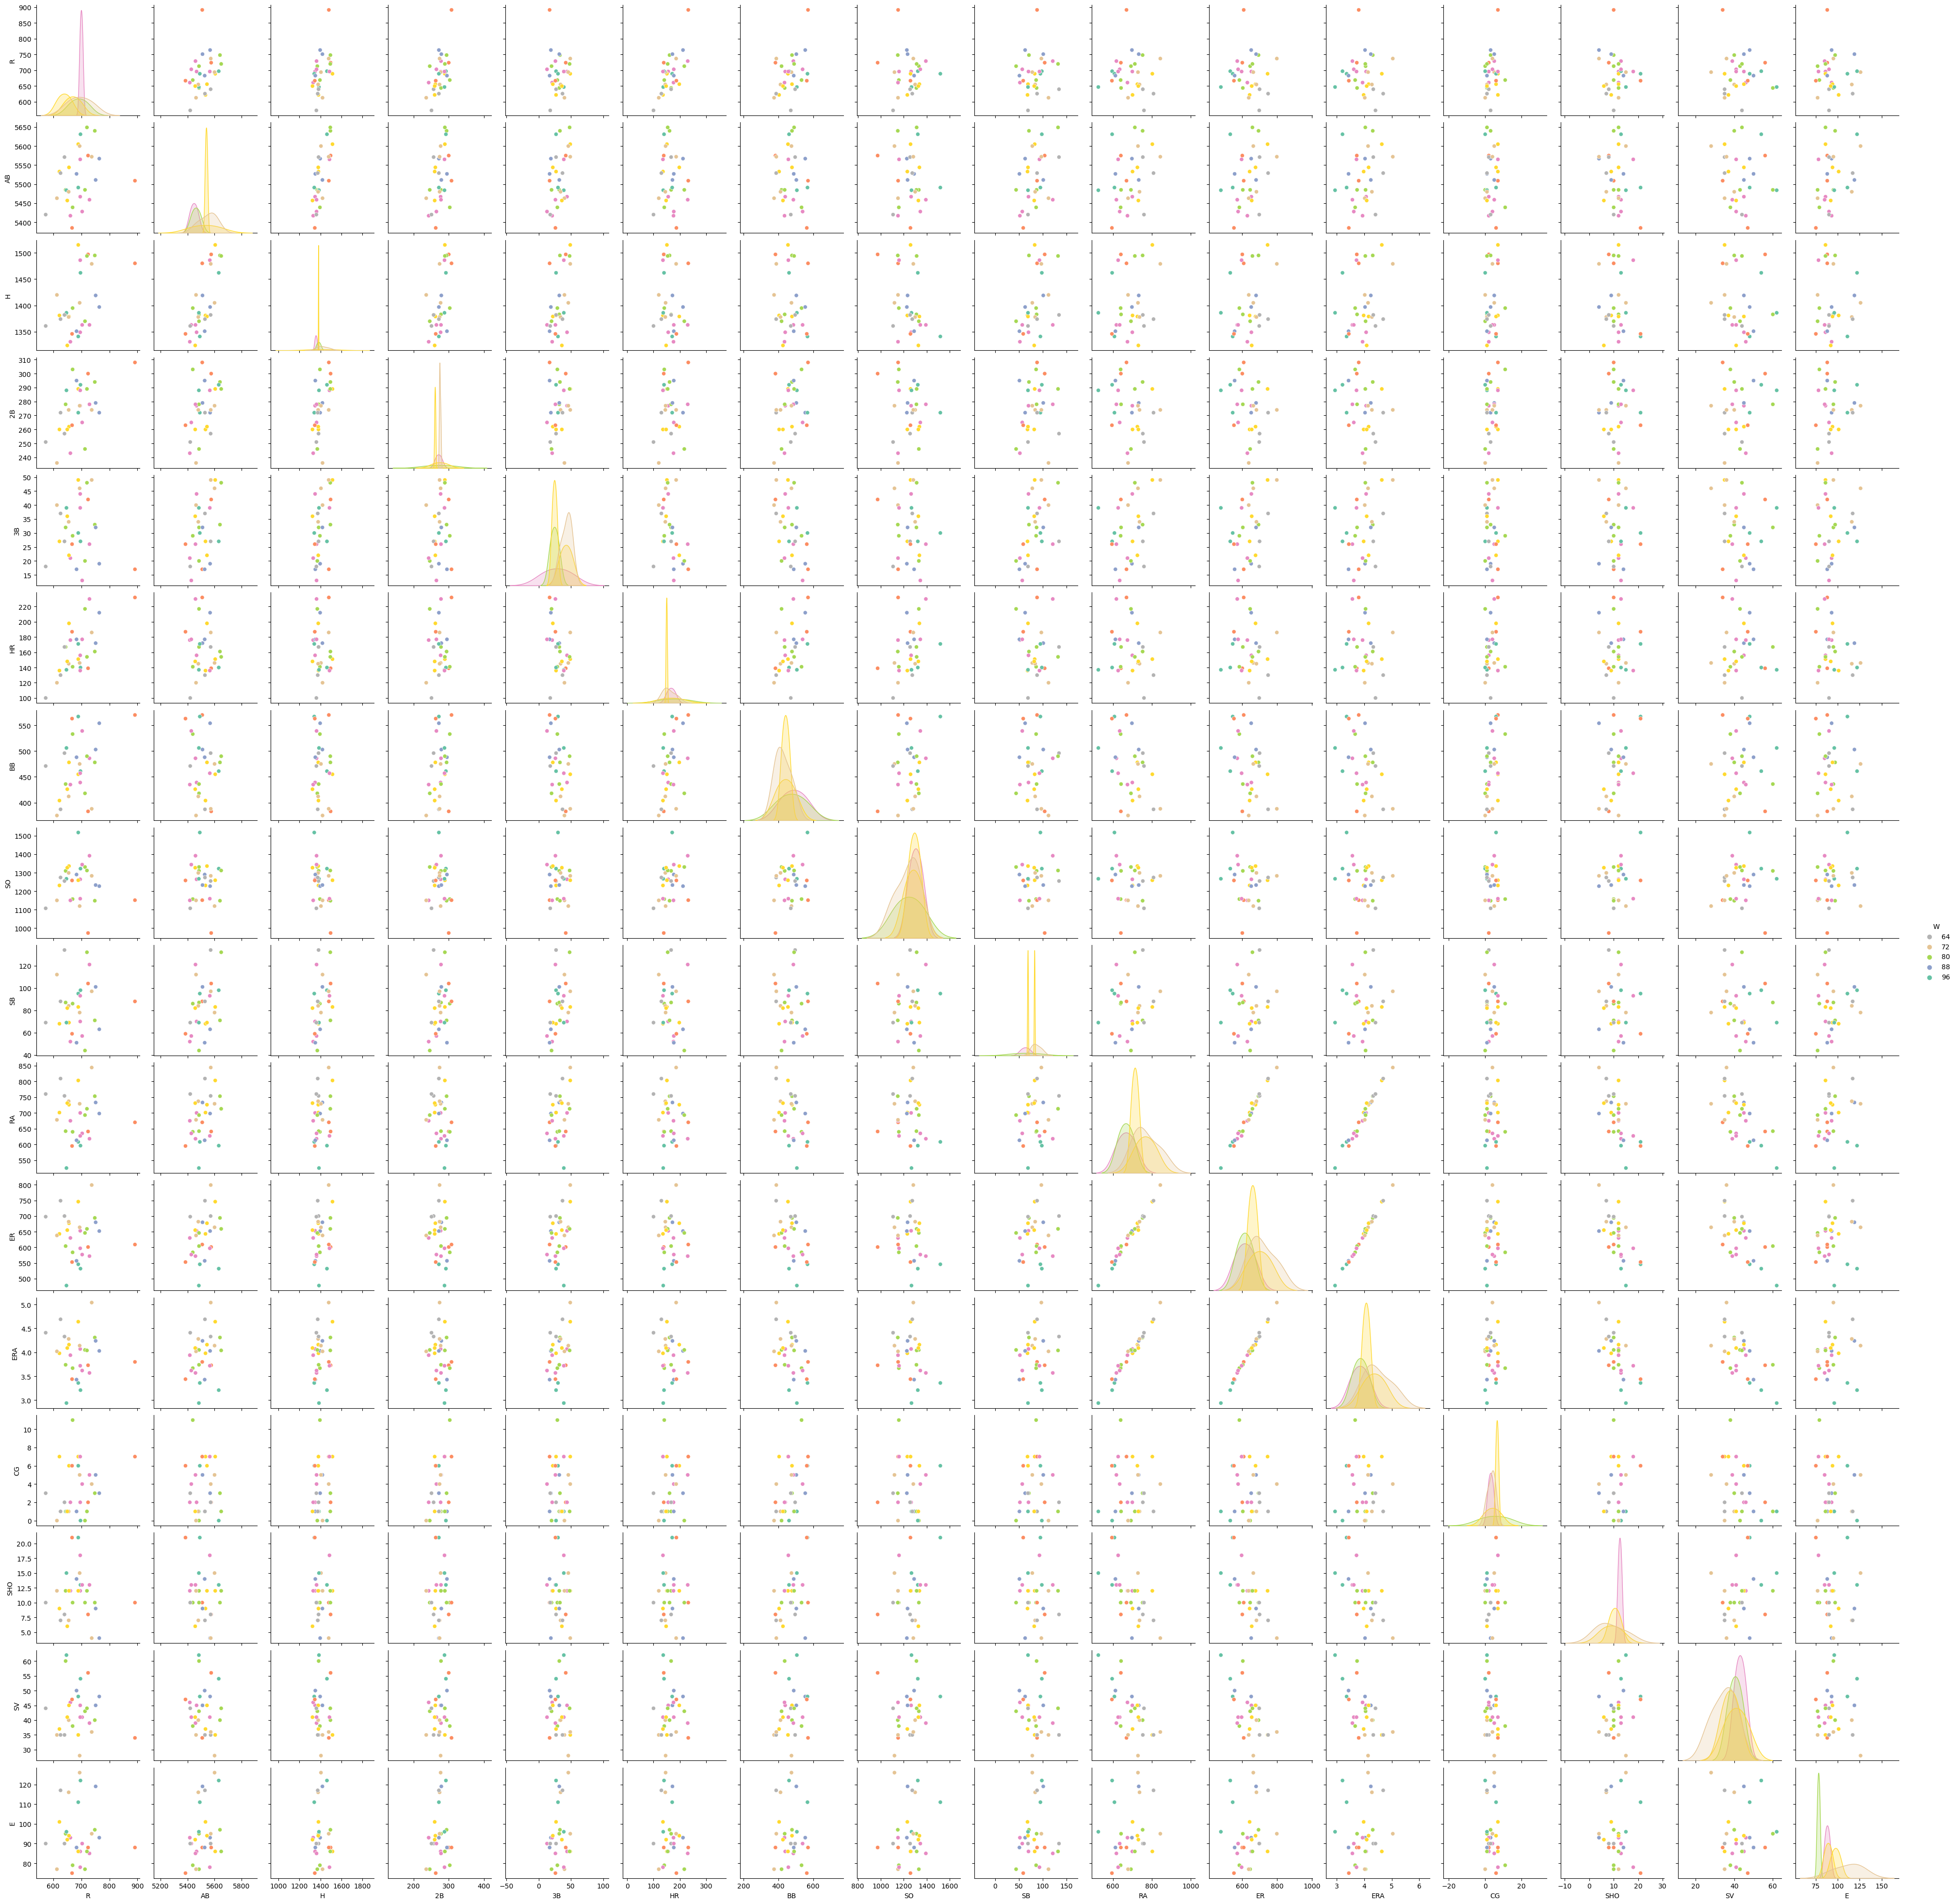

In [132]:
sns.pairplot(baseball_data,hue='W',palette="Set2_r")
plt.show()

The only positive correlation we have between variables are between ra, er and era.
Most of the columns have no correlation with each other.

Boxplots

Let's see if there are residualas and ourliers in each of the column.

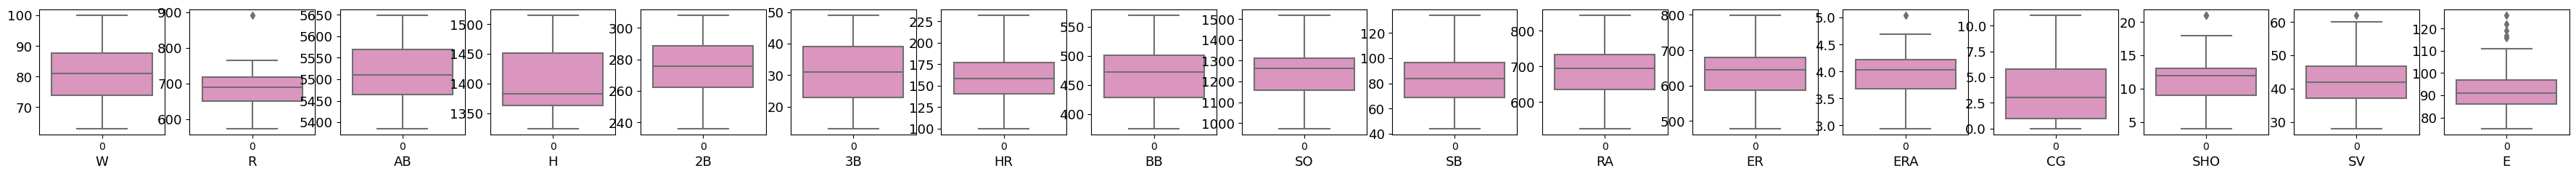

In [133]:
plt.figure(figsize=(45,45),facecolor = "white")
plotnumber=1
for col in baseball_score_data_col:
    if plotnumber<=18:
        wc=plt.subplot(17,17,plotnumber)
        sns.boxplot(baseball_data[col],palette="Set2_r")
        plt.xlabel(col,rotation=0,fontsize = 13)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

Only R and E columns have outliers and residuals in their value distribution. None of the other columns have outliers in their value distribution.

Catplots

There are no conlcusive statements that we can make from w and r catplot.

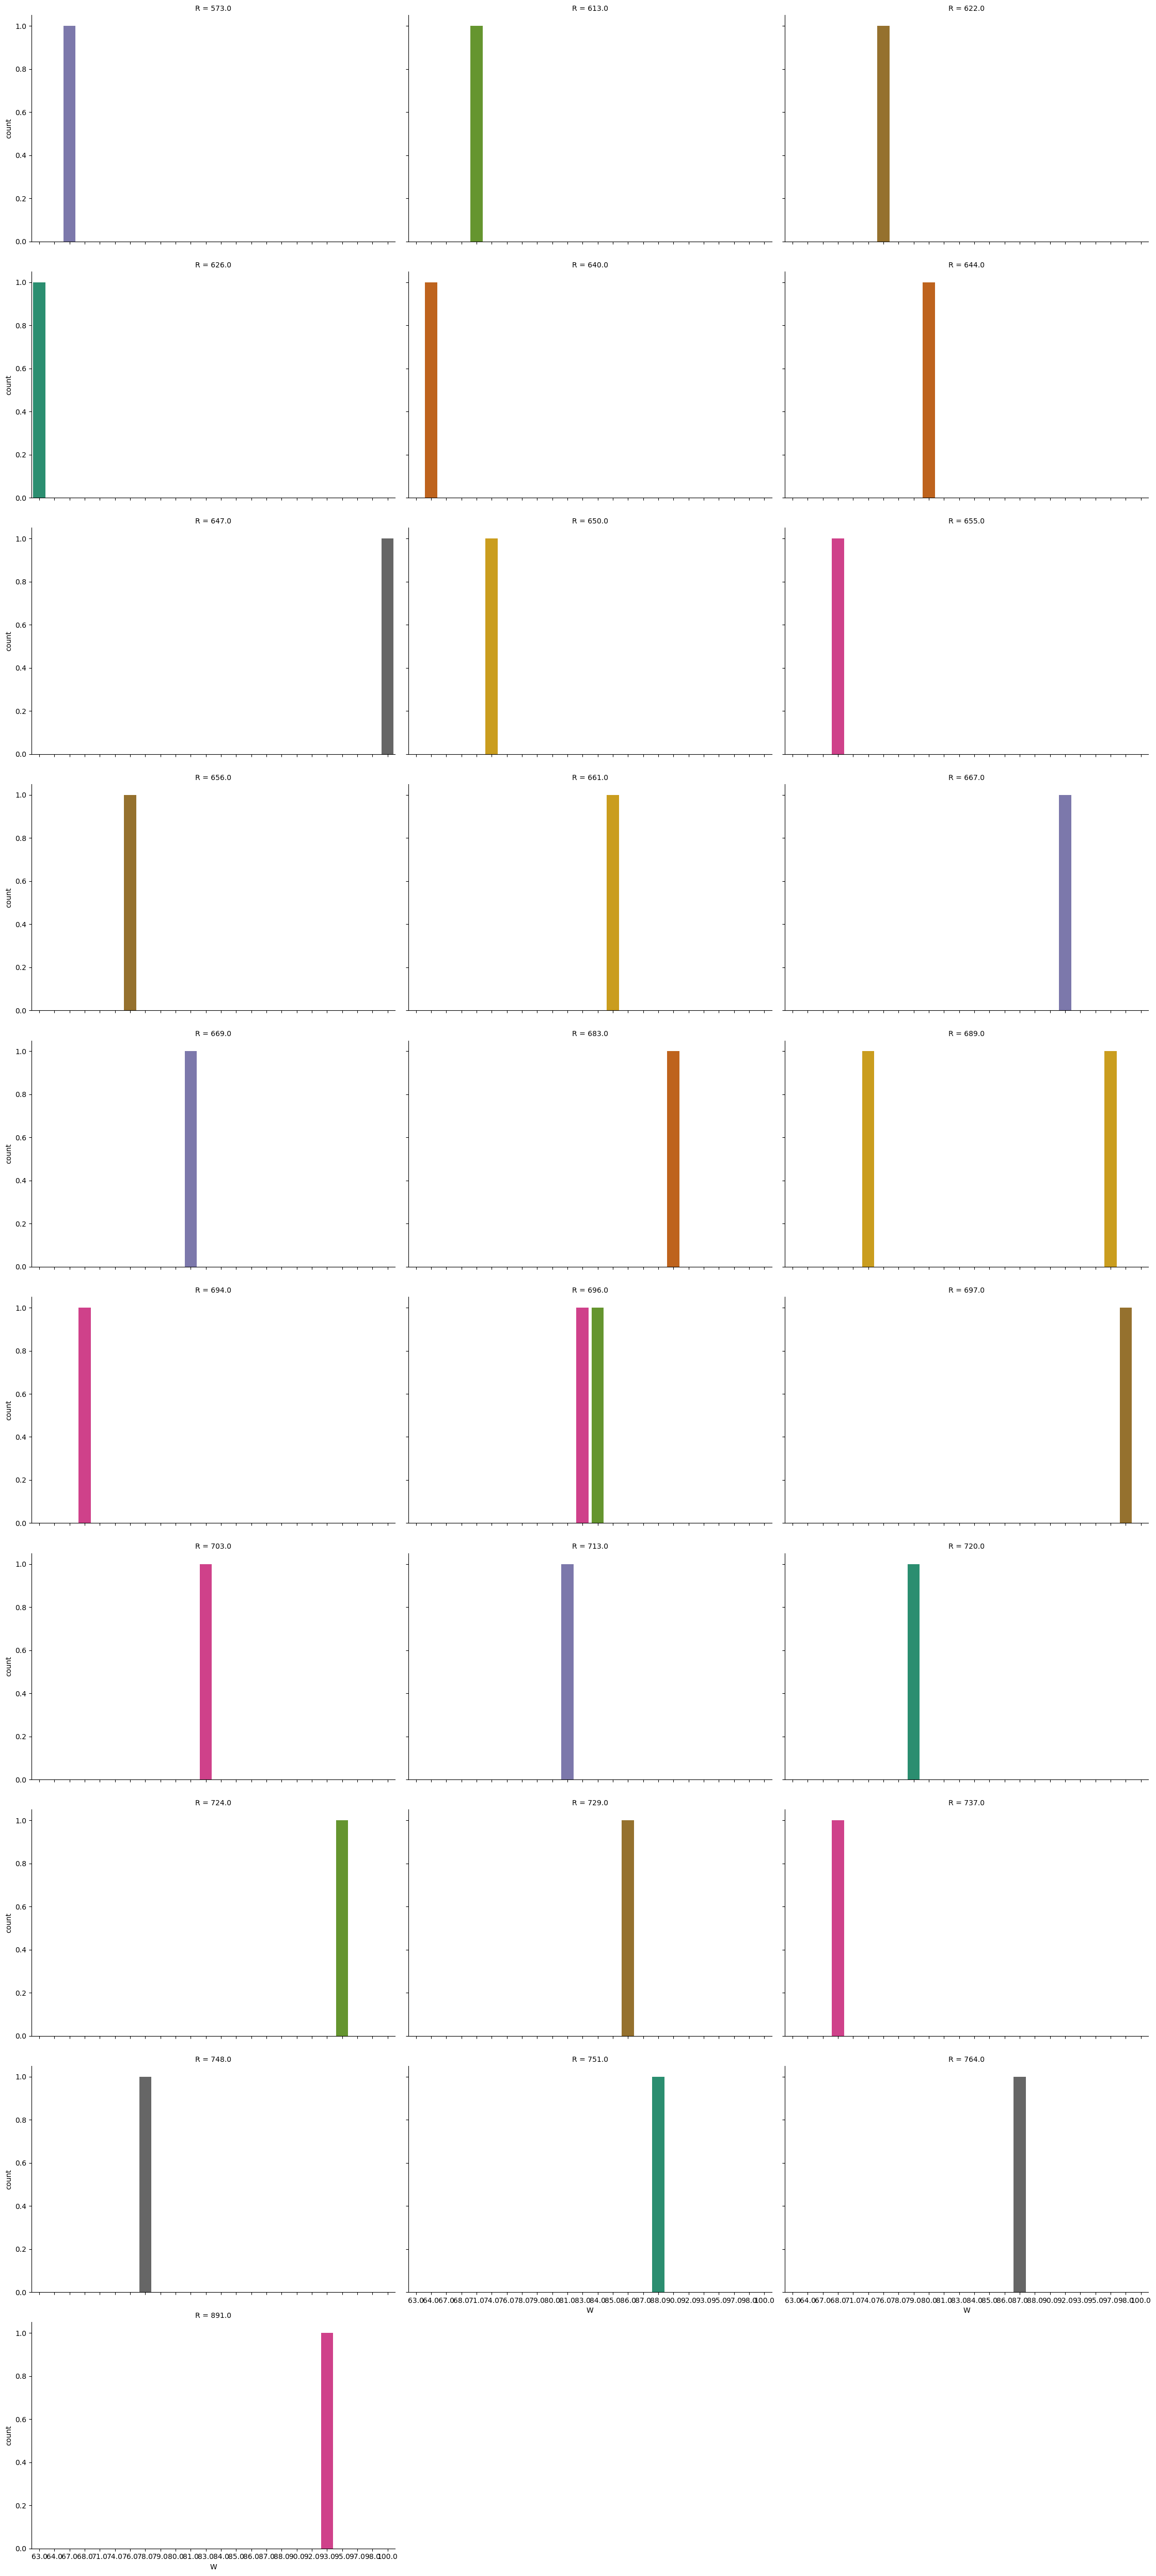

<Figure size 200x200 with 0 Axes>

In [134]:
sns.catplot(x= 'W', col= 'R', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

There are no conlcusive statements that we can make from w and ab catplot.

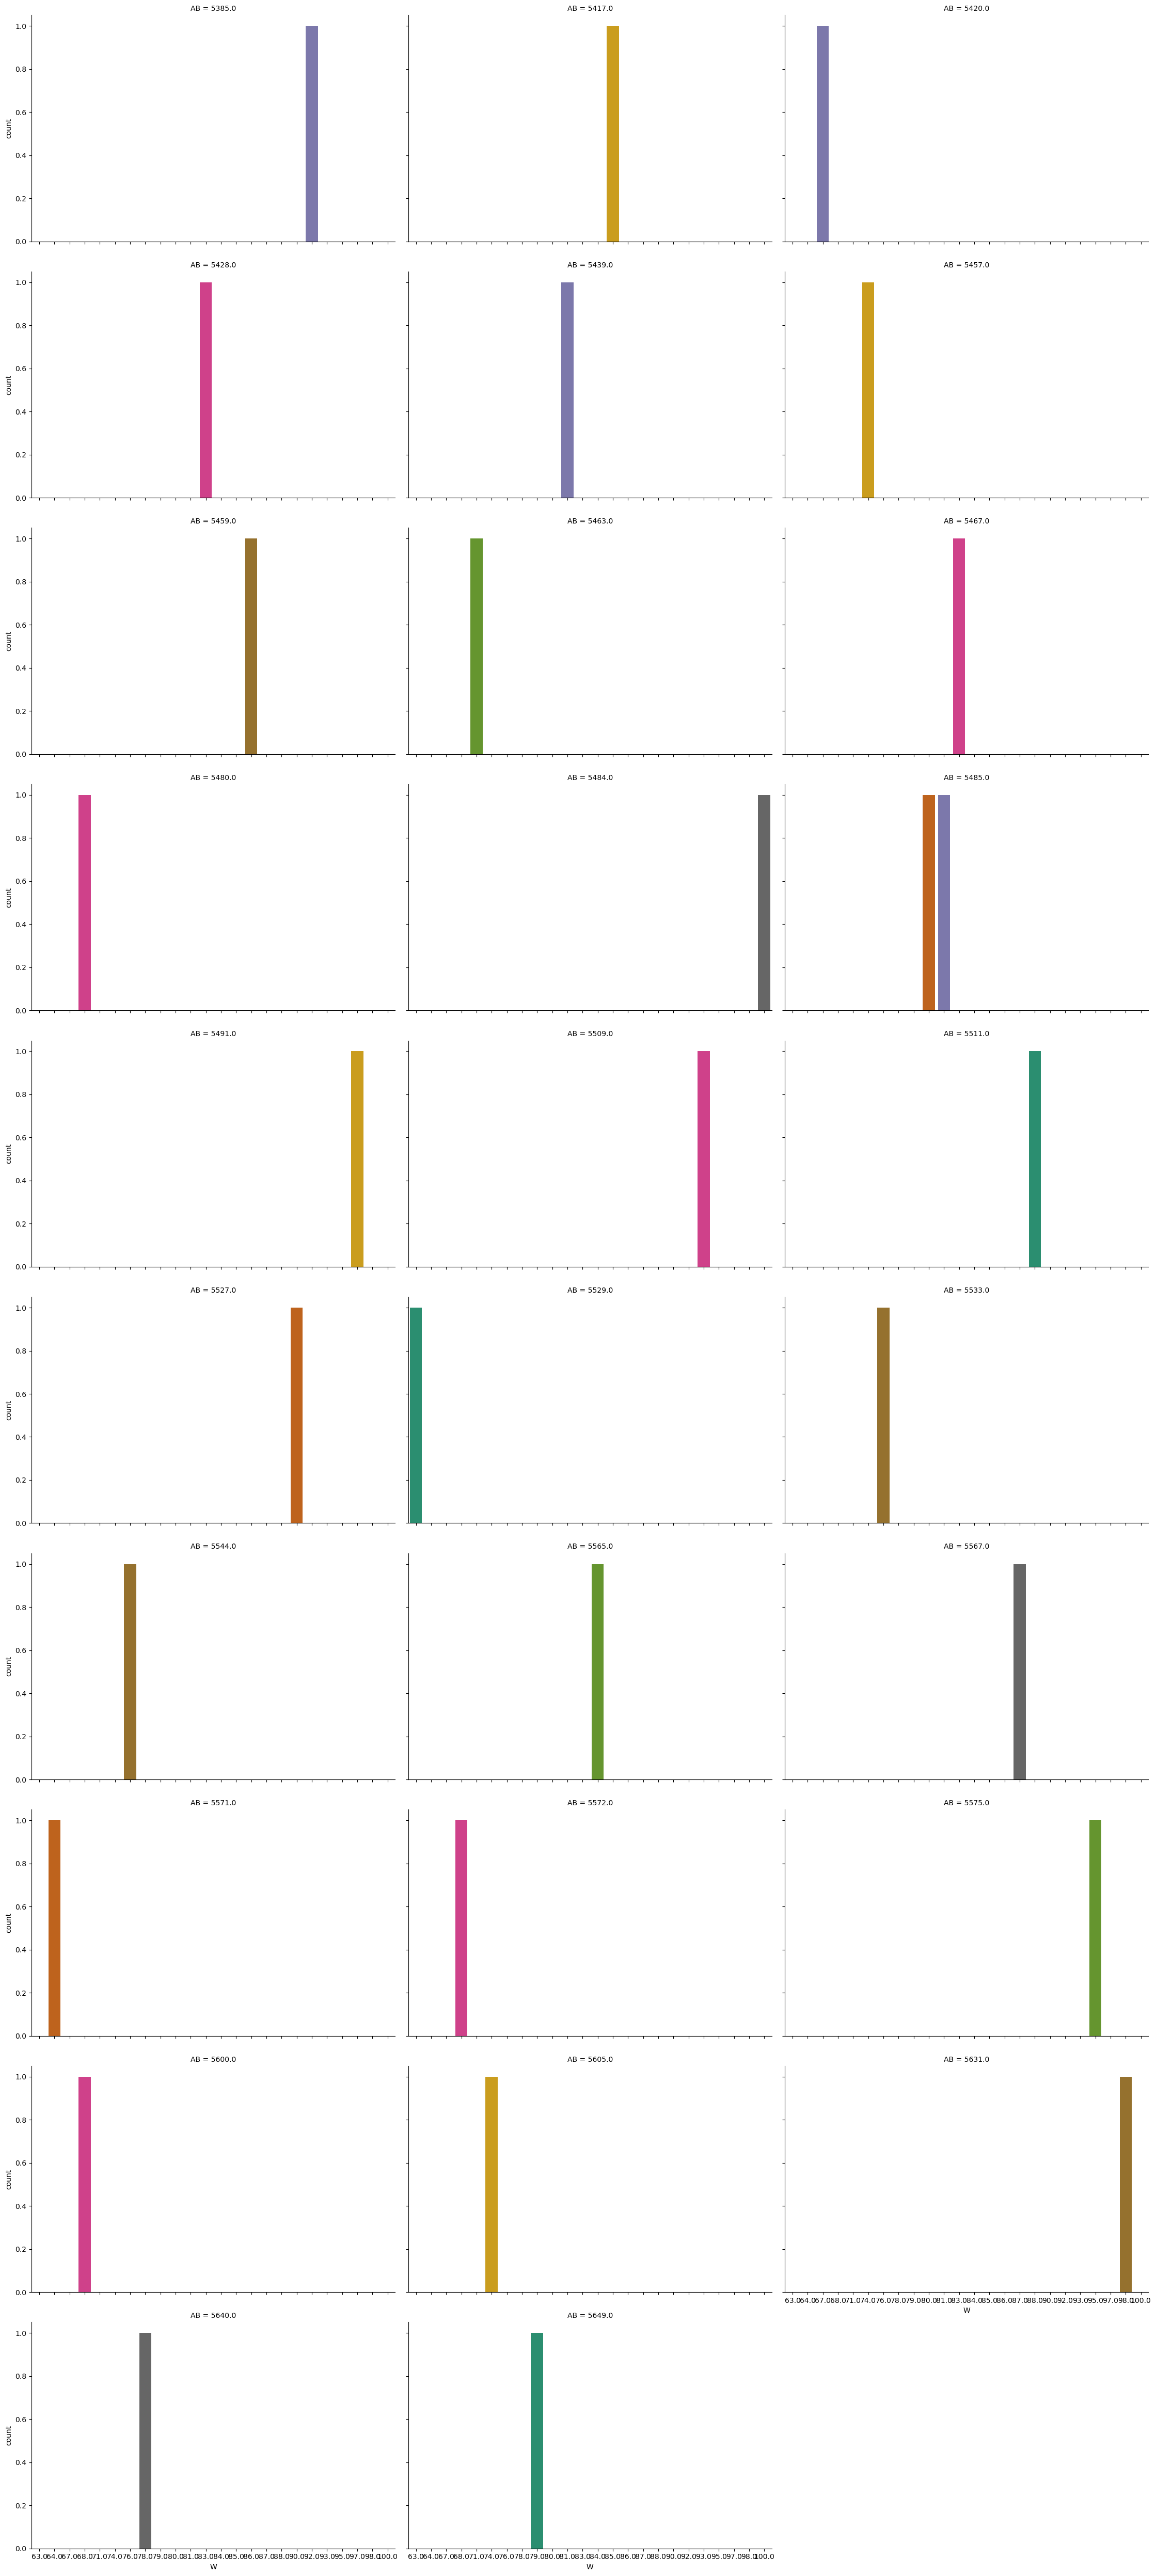

<Figure size 200x200 with 0 Axes>

In [135]:
sns.catplot(x= 'W', col= 'AB', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

There are no conlcusive statements that we can make from w and h catplot.

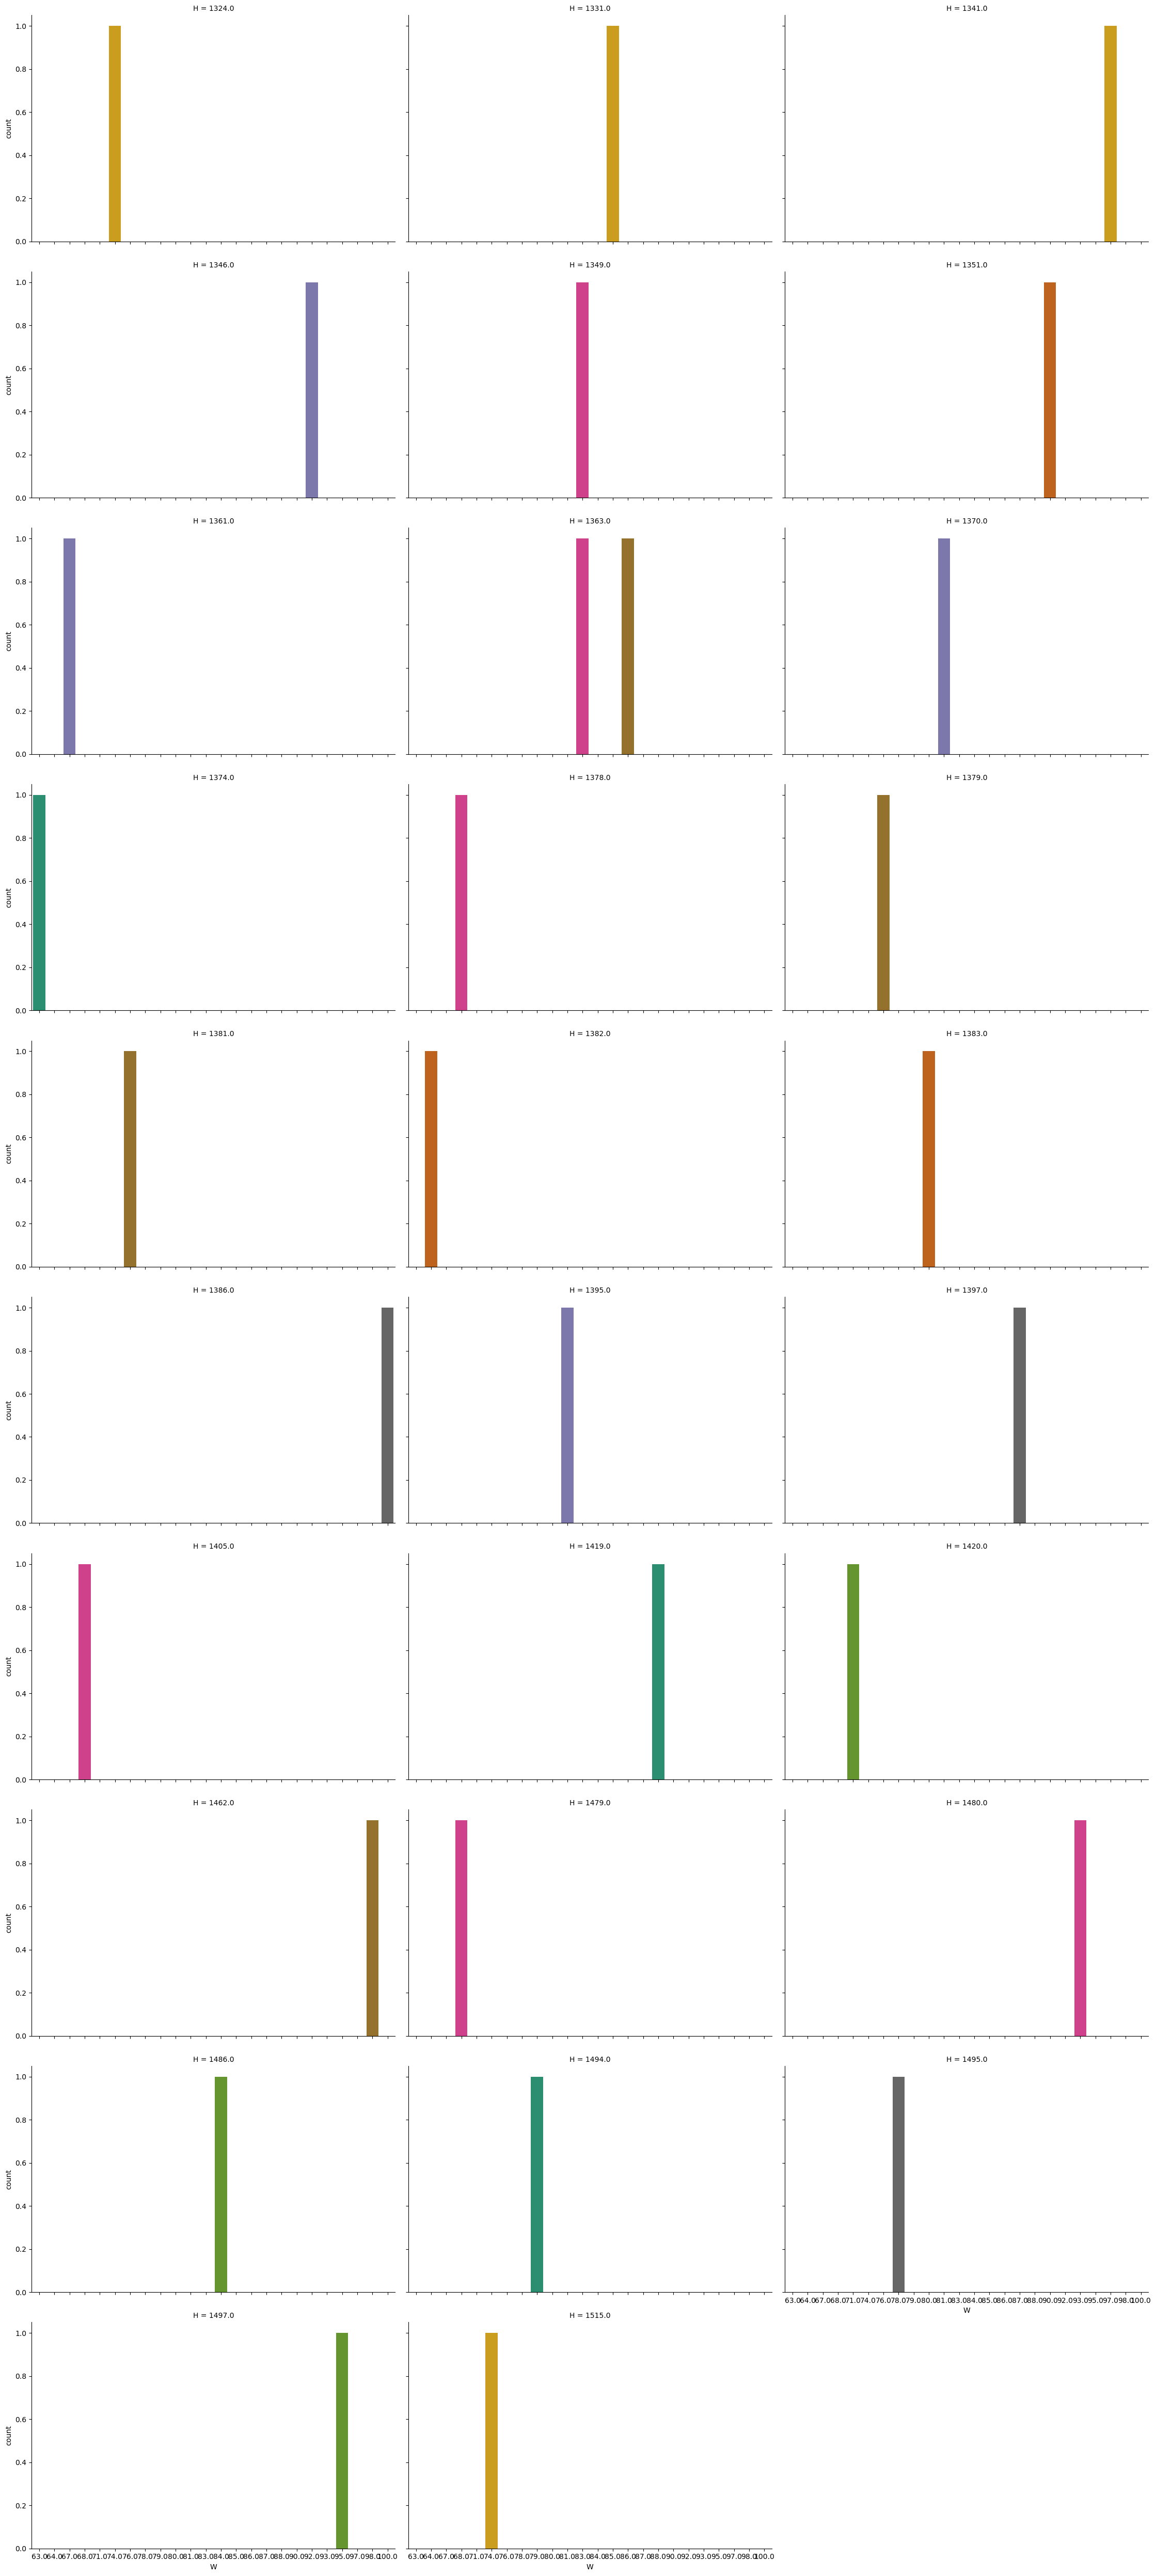

<Figure size 200x200 with 0 Axes>

In [136]:
sns.catplot(x= 'W', col= 'H', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

There are no conlcusive statements that we can make from w and h catplot other than 2b=274.0 having higher wins than most of the other values.

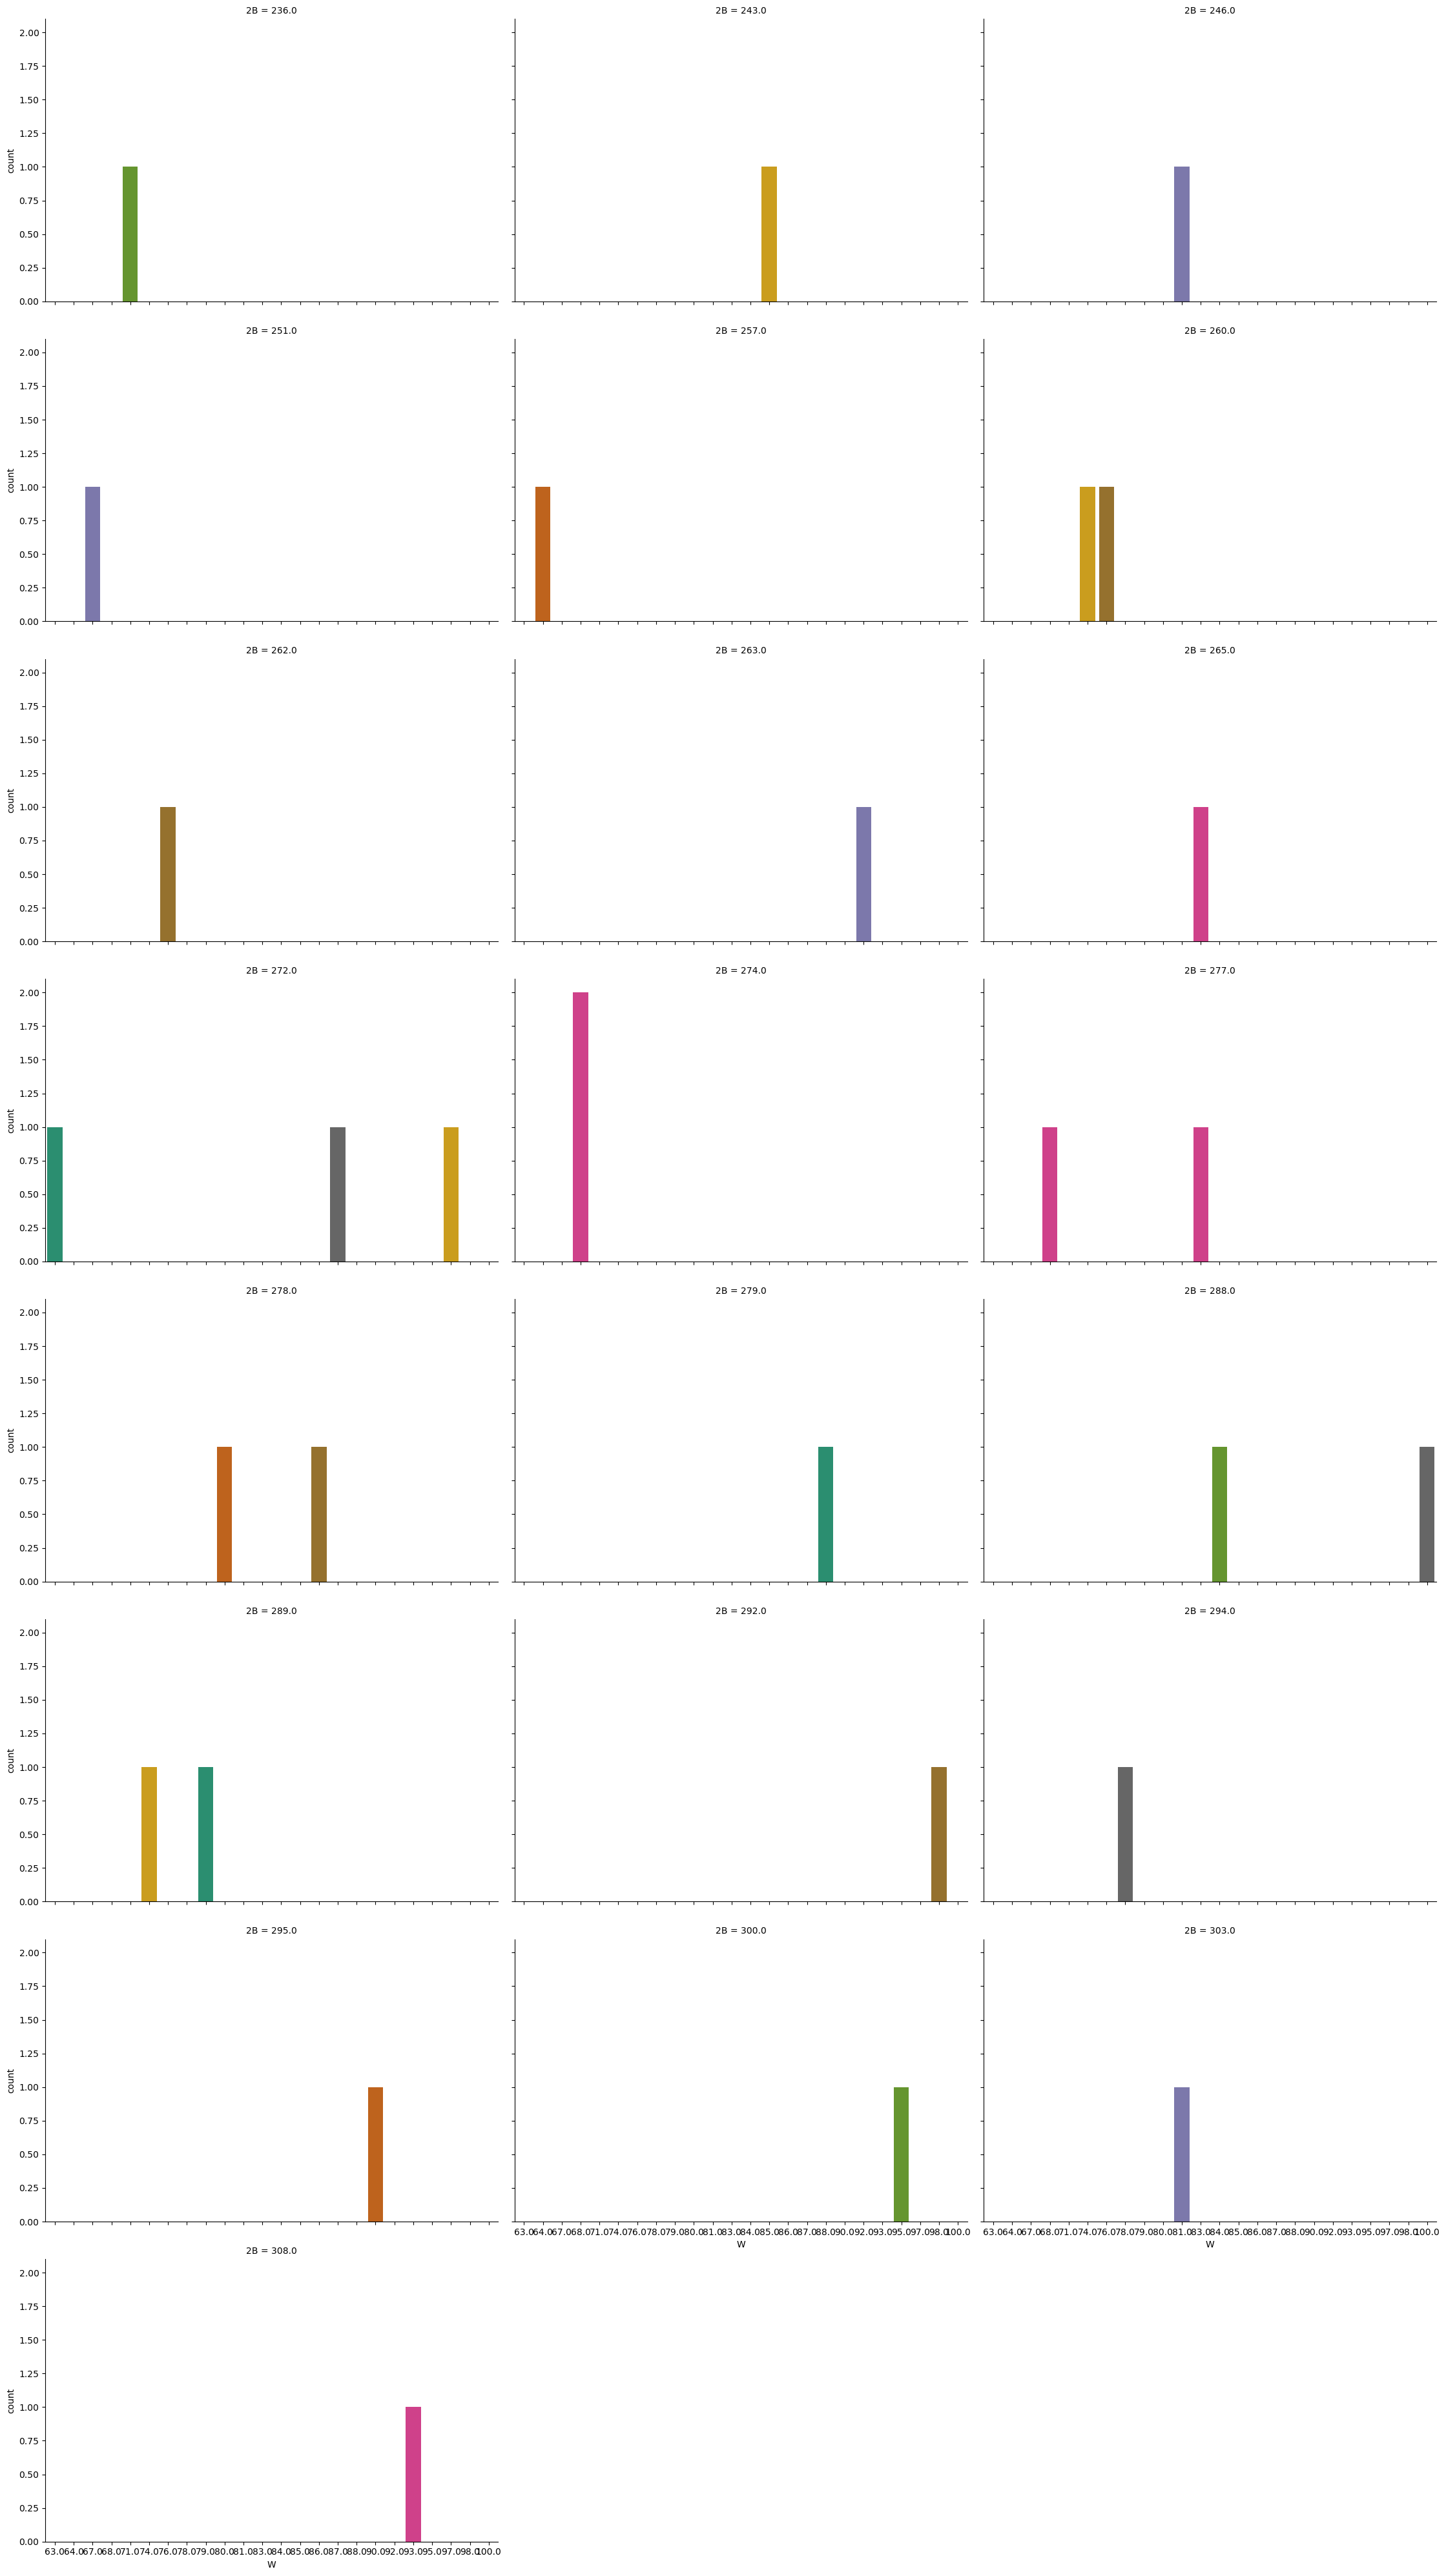

<Figure size 200x200 with 0 Axes>

In [137]:
sns.catplot(x= 'W', col= '2B', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

There are no conlcusive statements that we can make from w and 3b catplot.

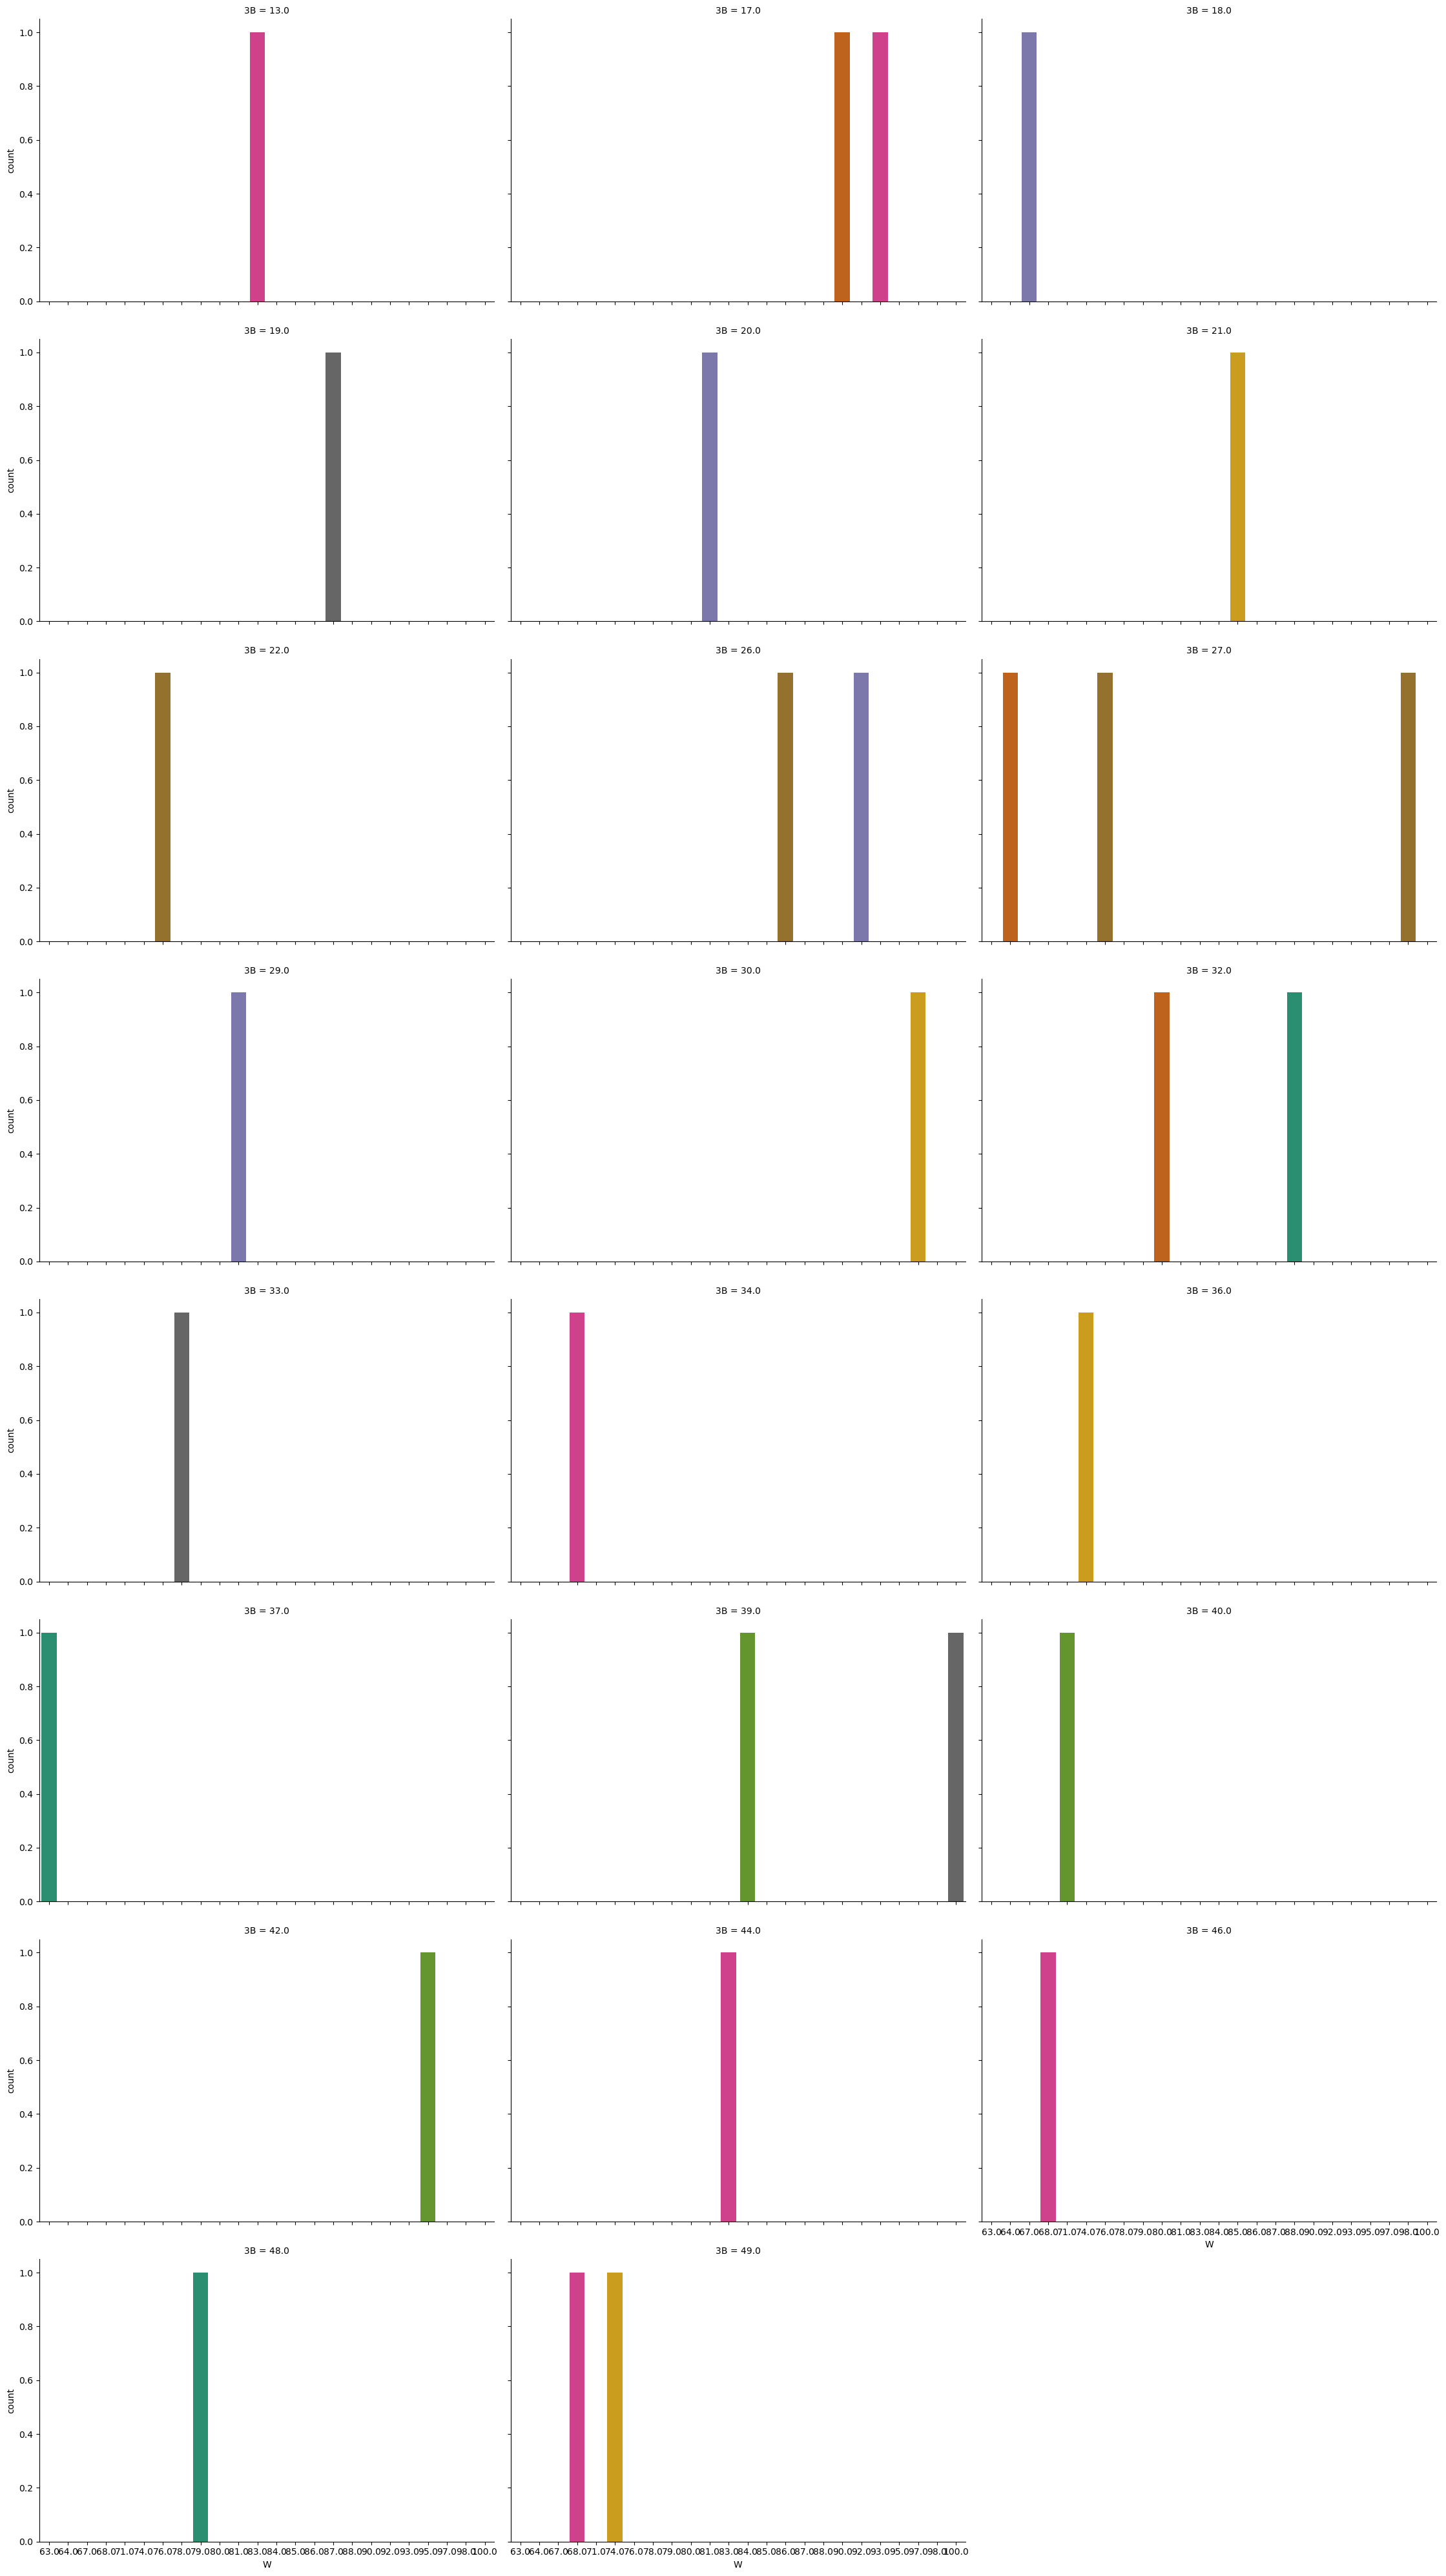

<Figure size 200x200 with 0 Axes>

In [138]:
sns.catplot(x= 'W', col= '3B', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

There are no conlcusive statements that we can make from w and hr catplot.

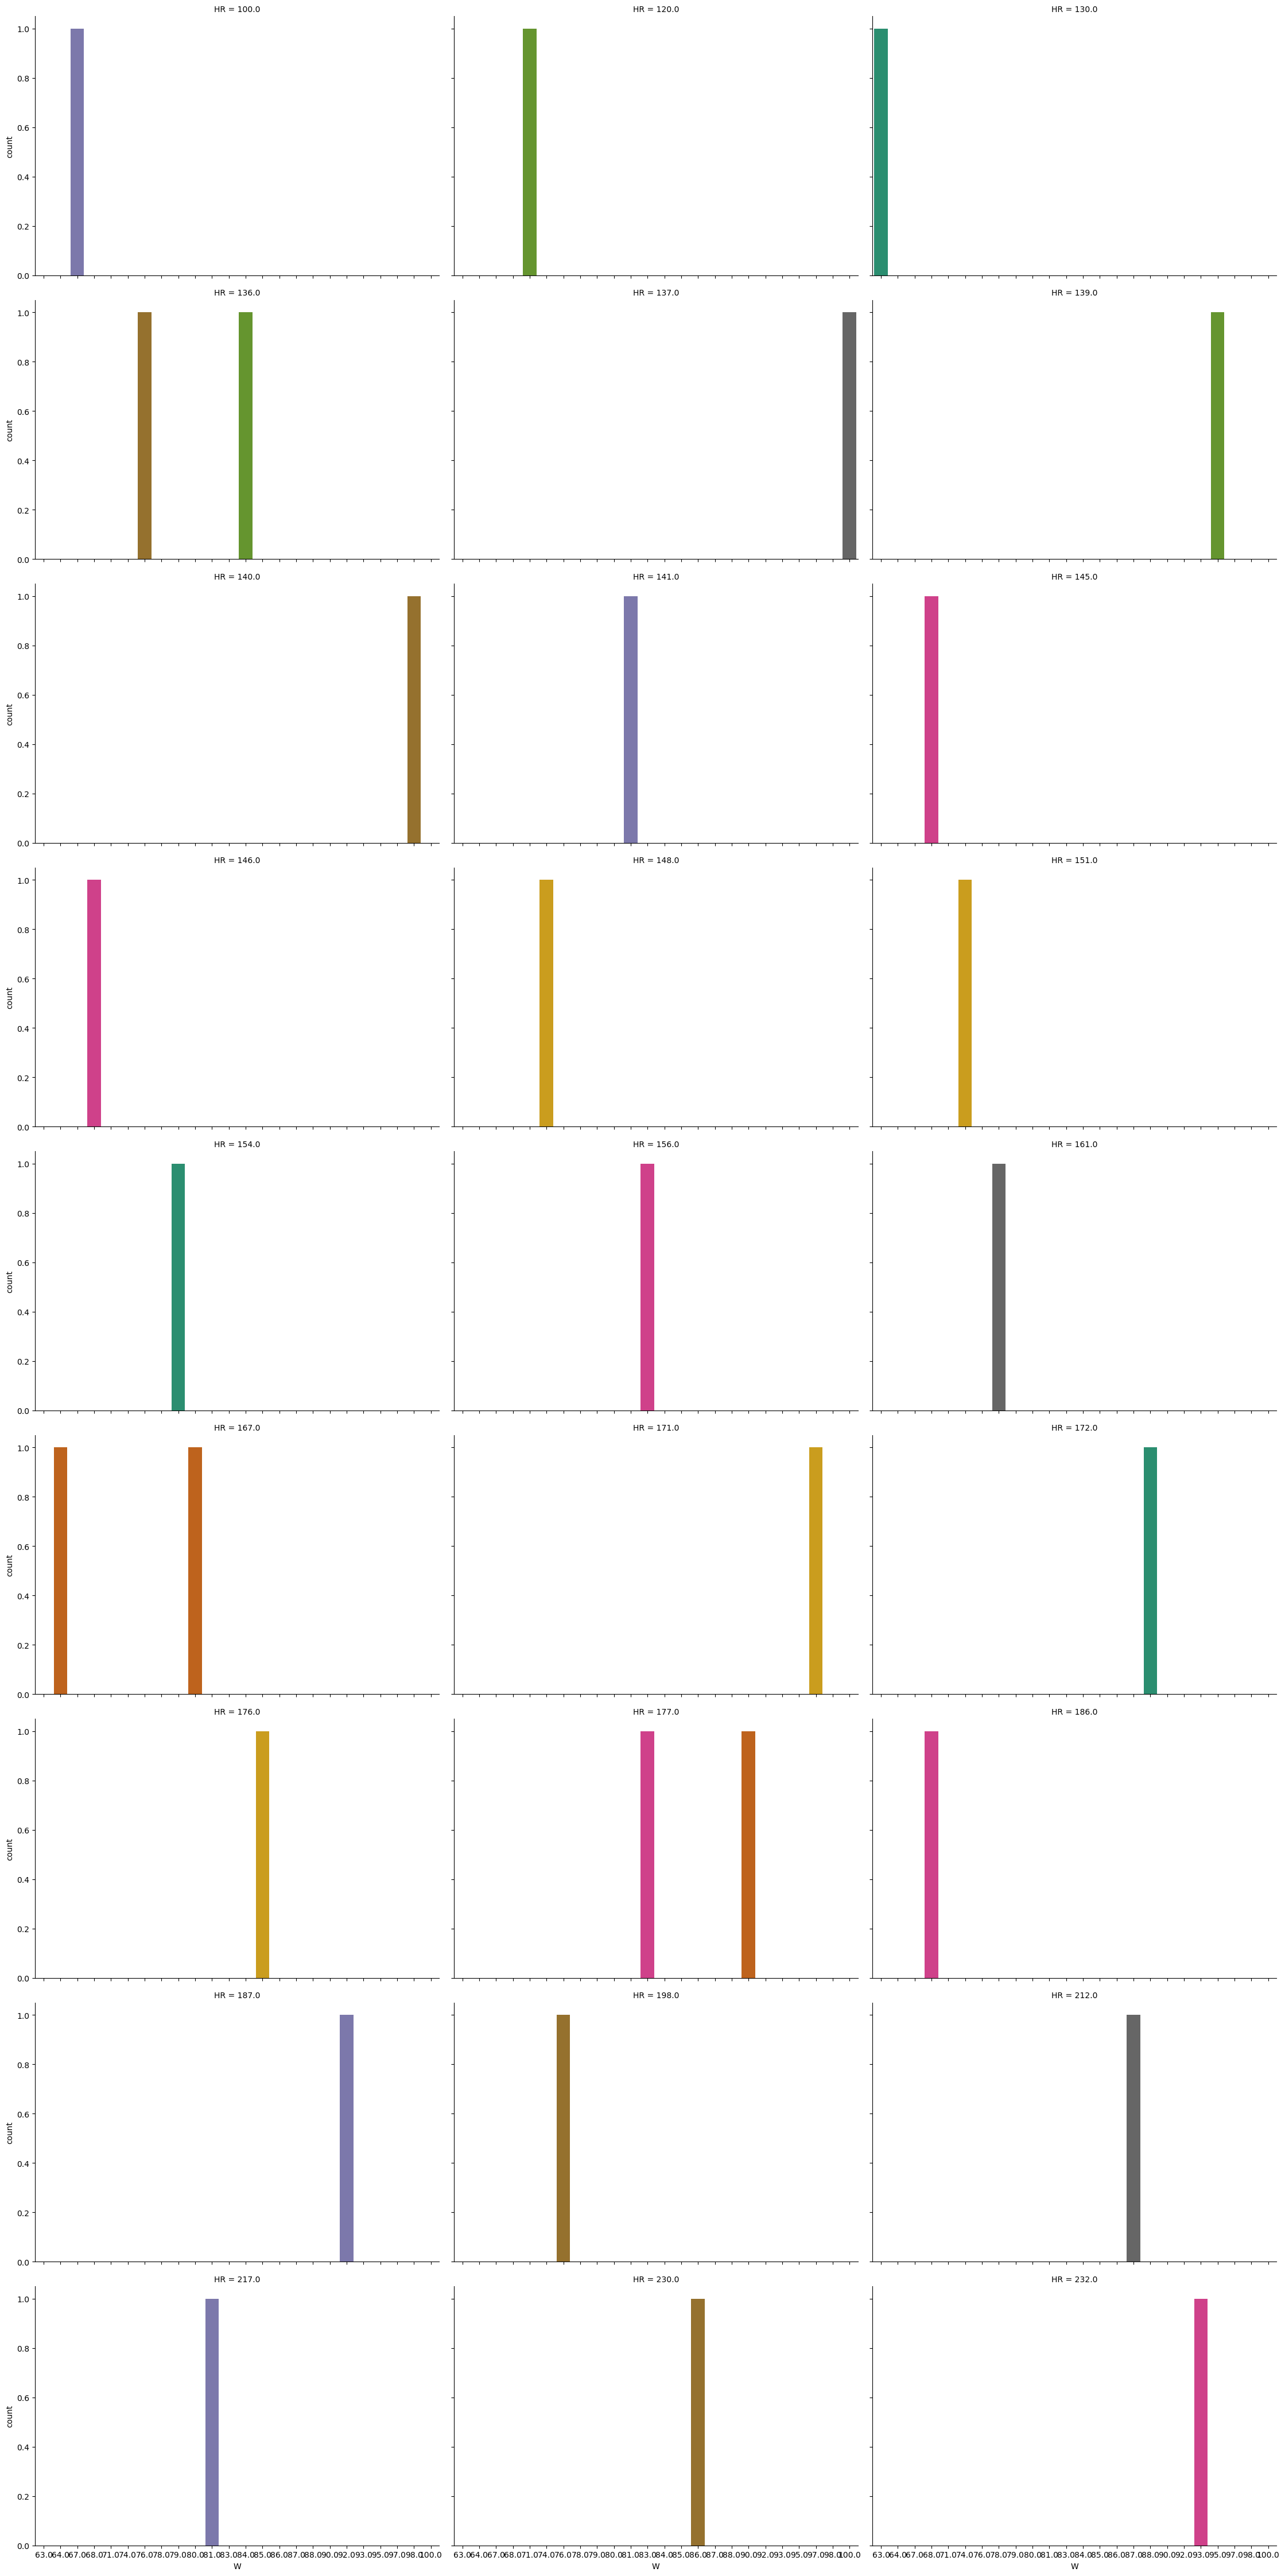

<Figure size 200x200 with 0 Axes>

In [139]:
sns.catplot(x= 'W', col= 'HR', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

There are no conlcusive statements that we can make from w and bb catplot.

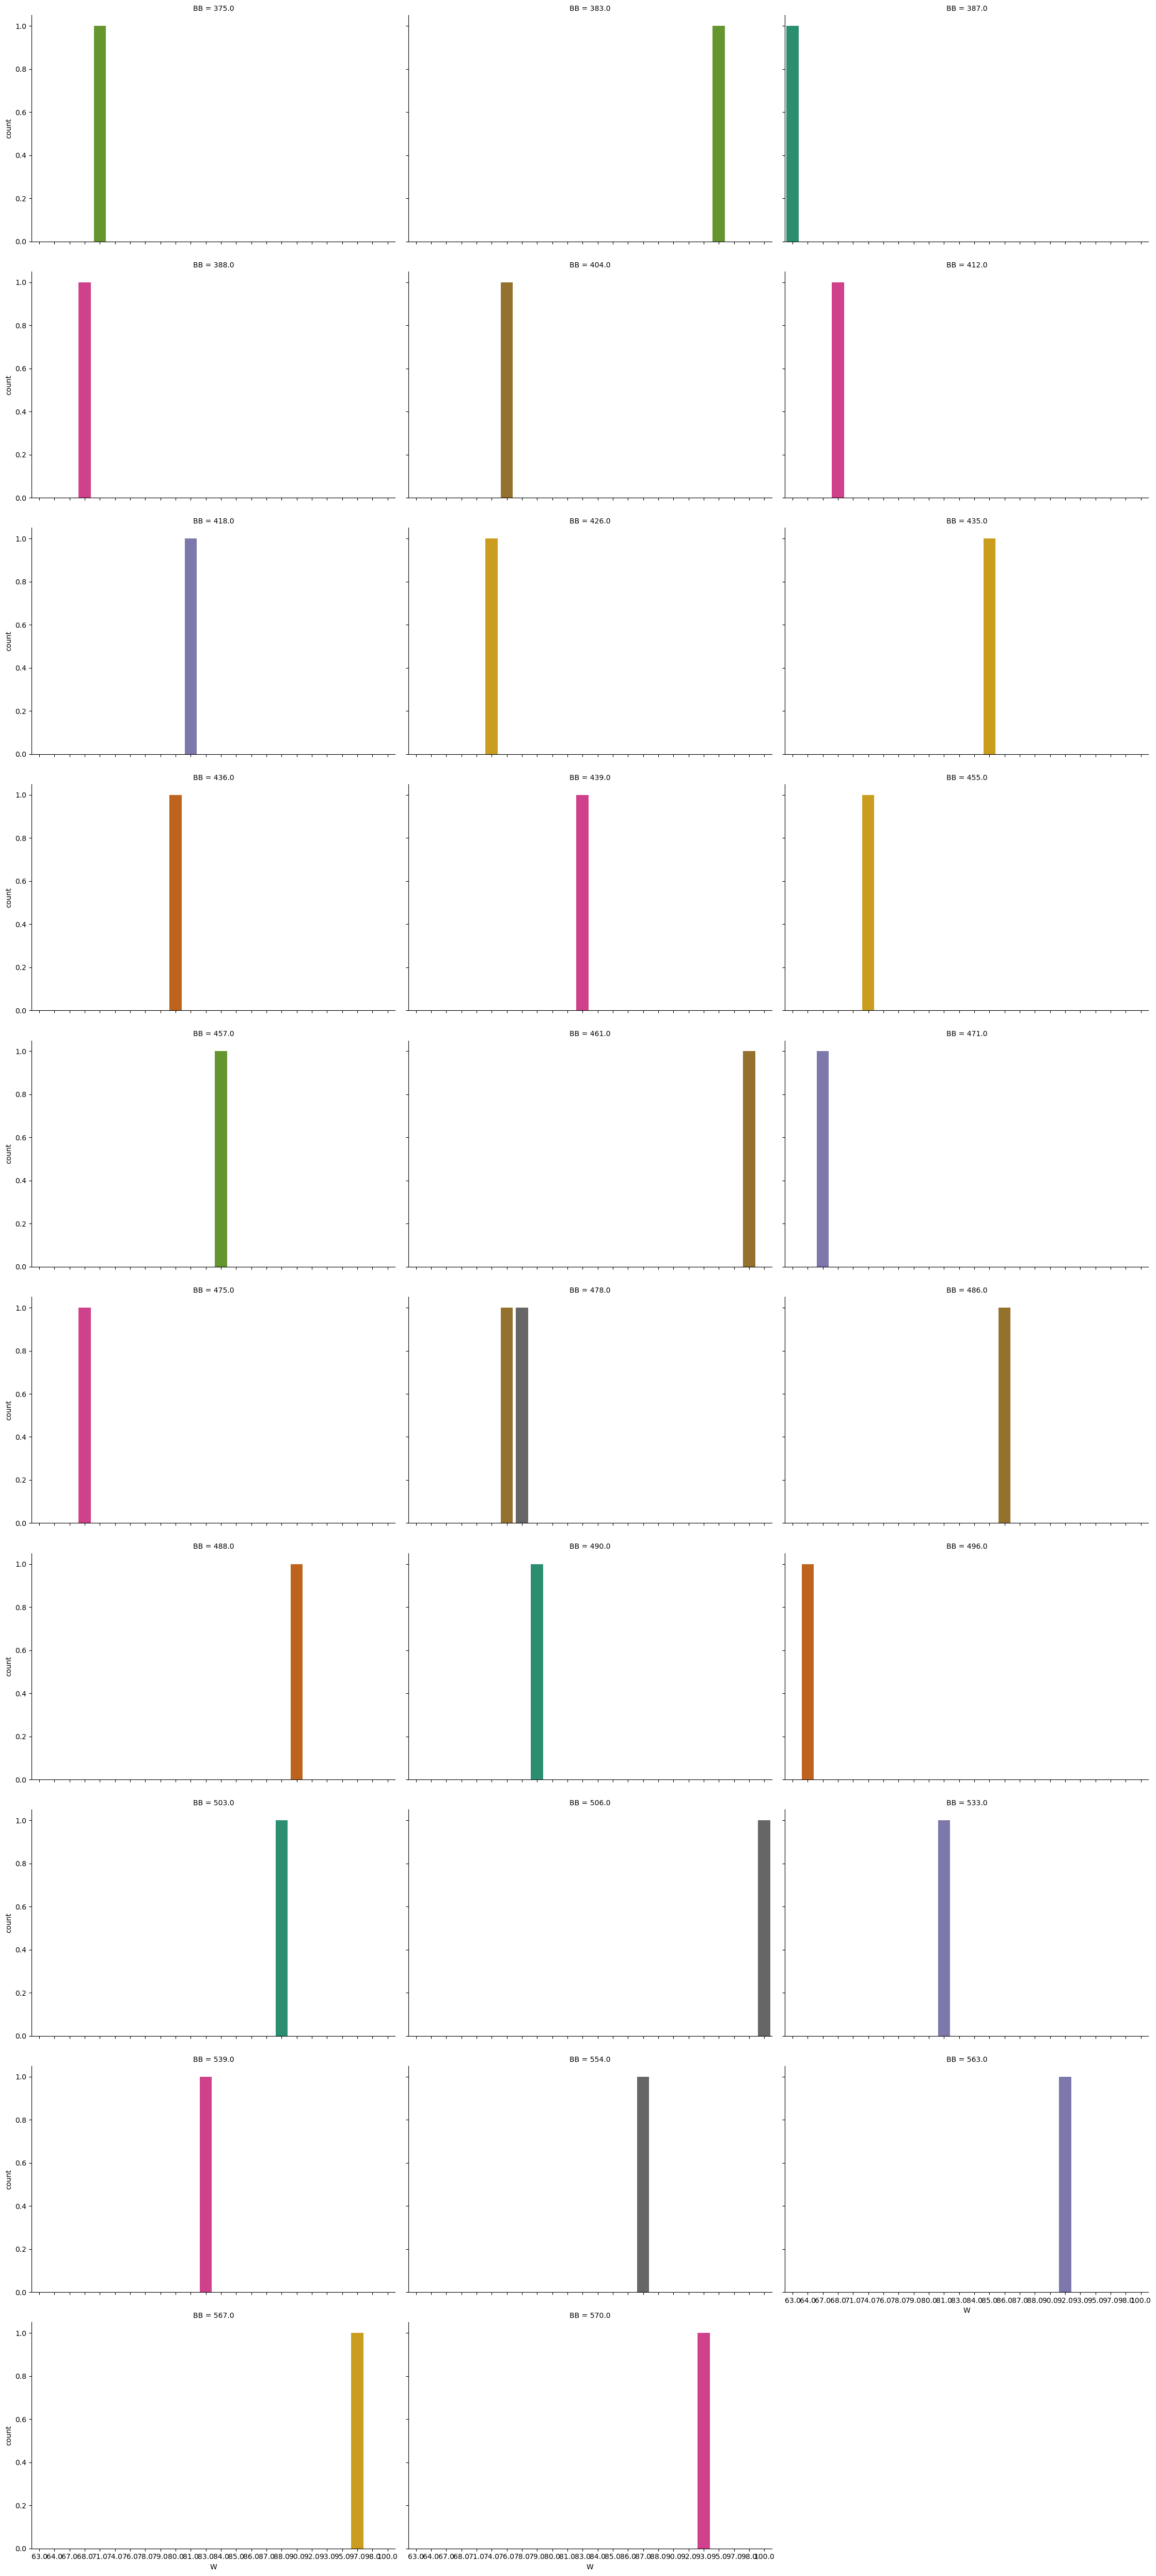

<Figure size 200x200 with 0 Axes>

In [140]:
sns.catplot(x= 'W', col= 'BB', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

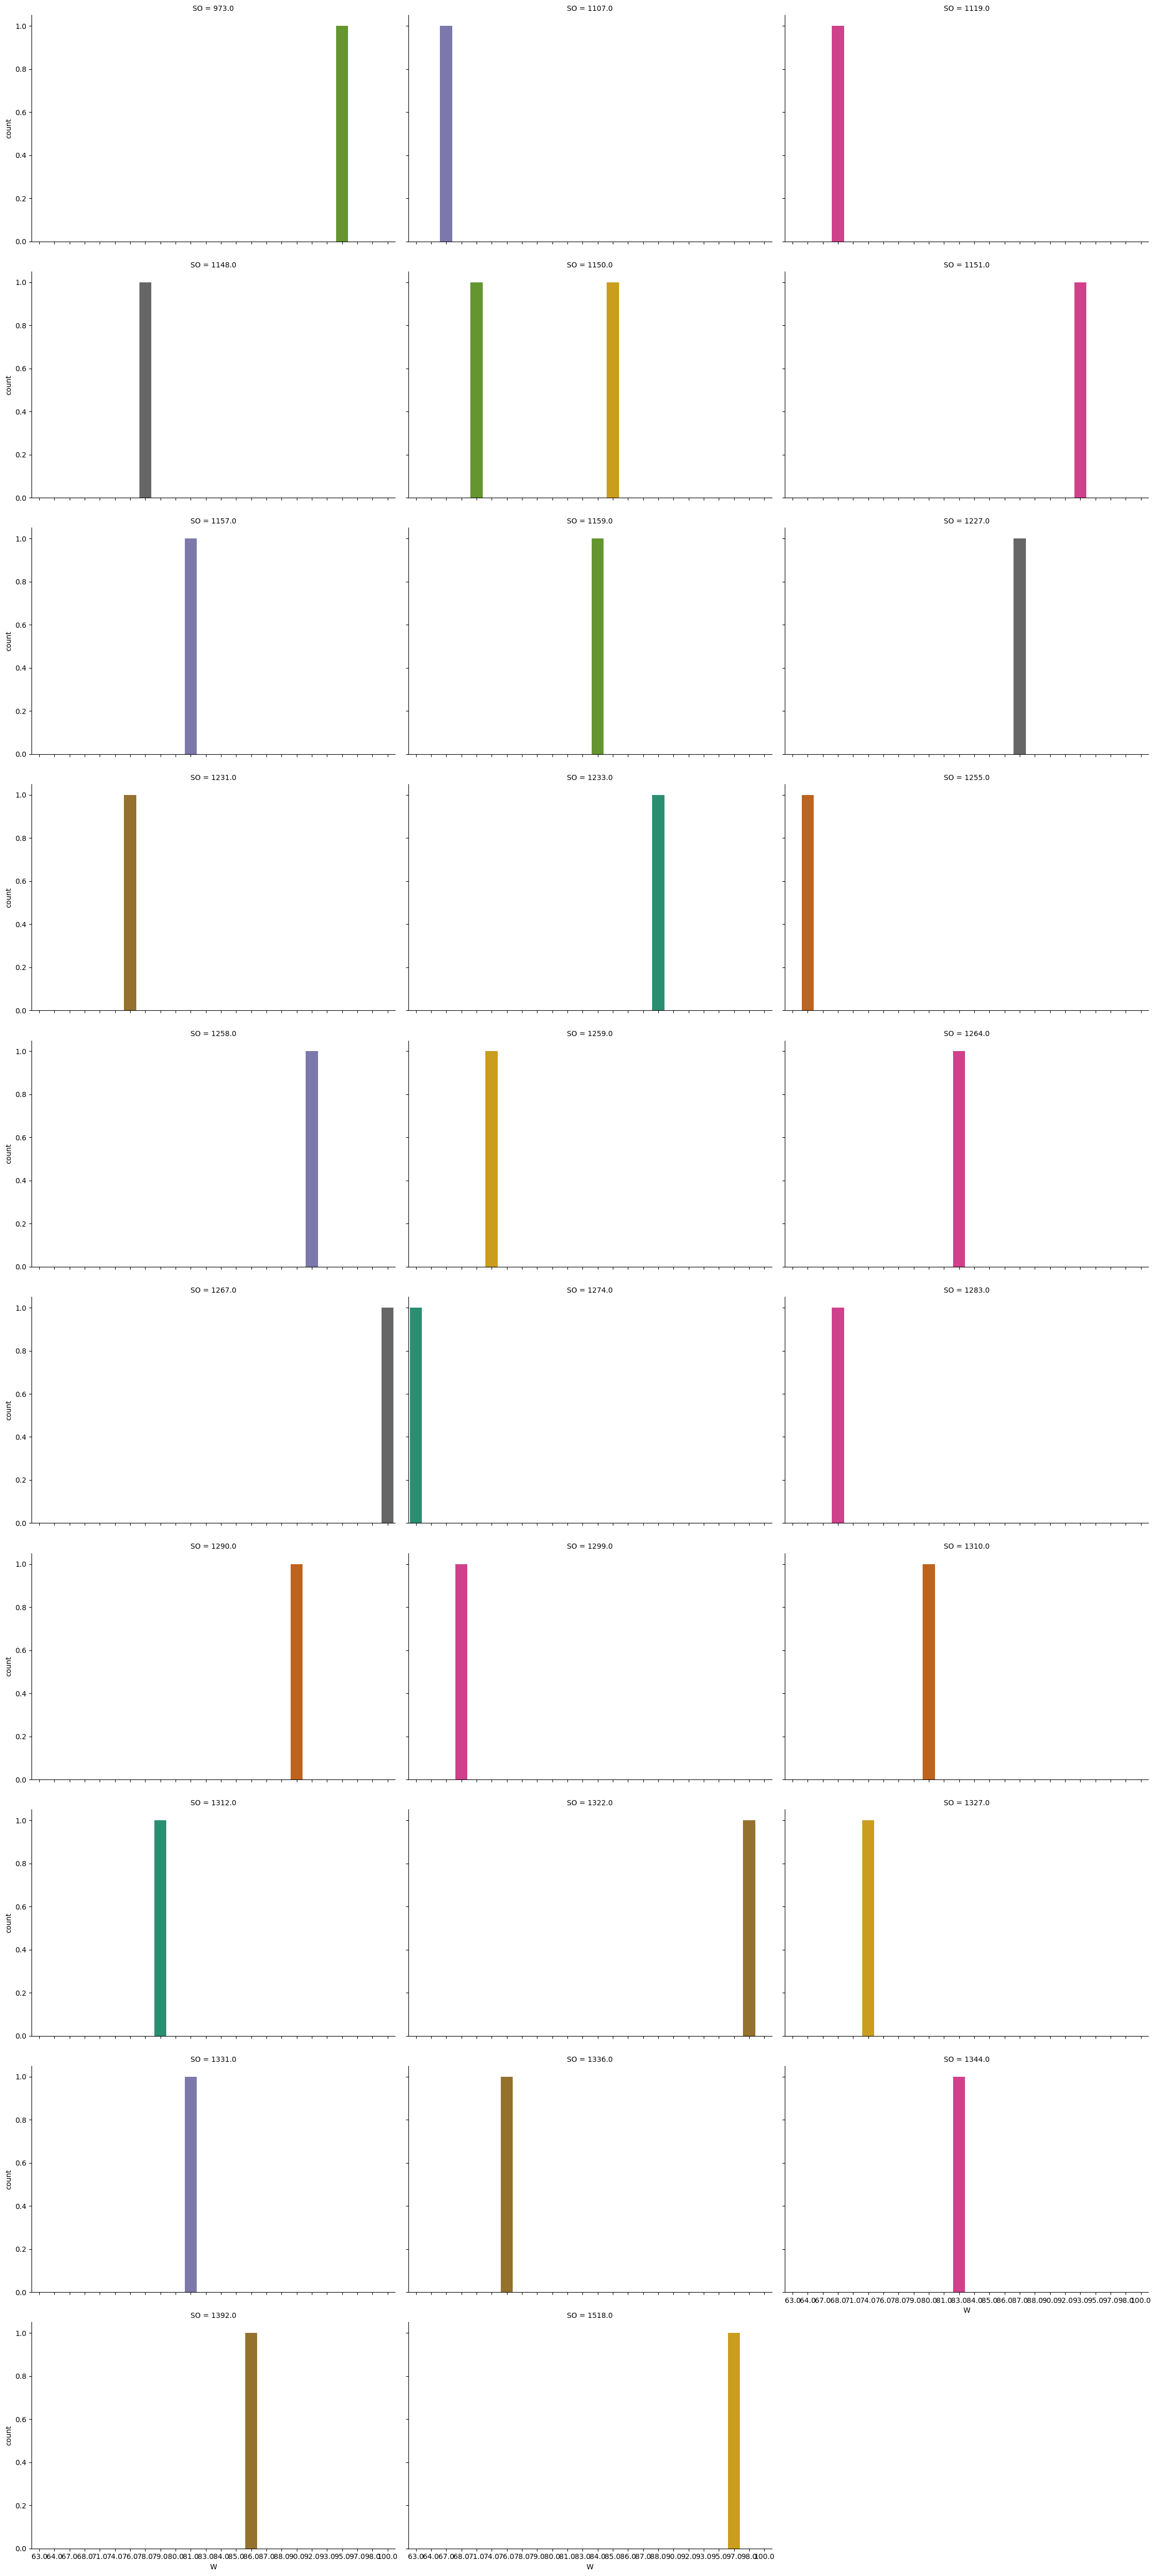

<Figure size 200x200 with 0 Axes>

In [141]:
sns.catplot(x= 'W', col= 'SO', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

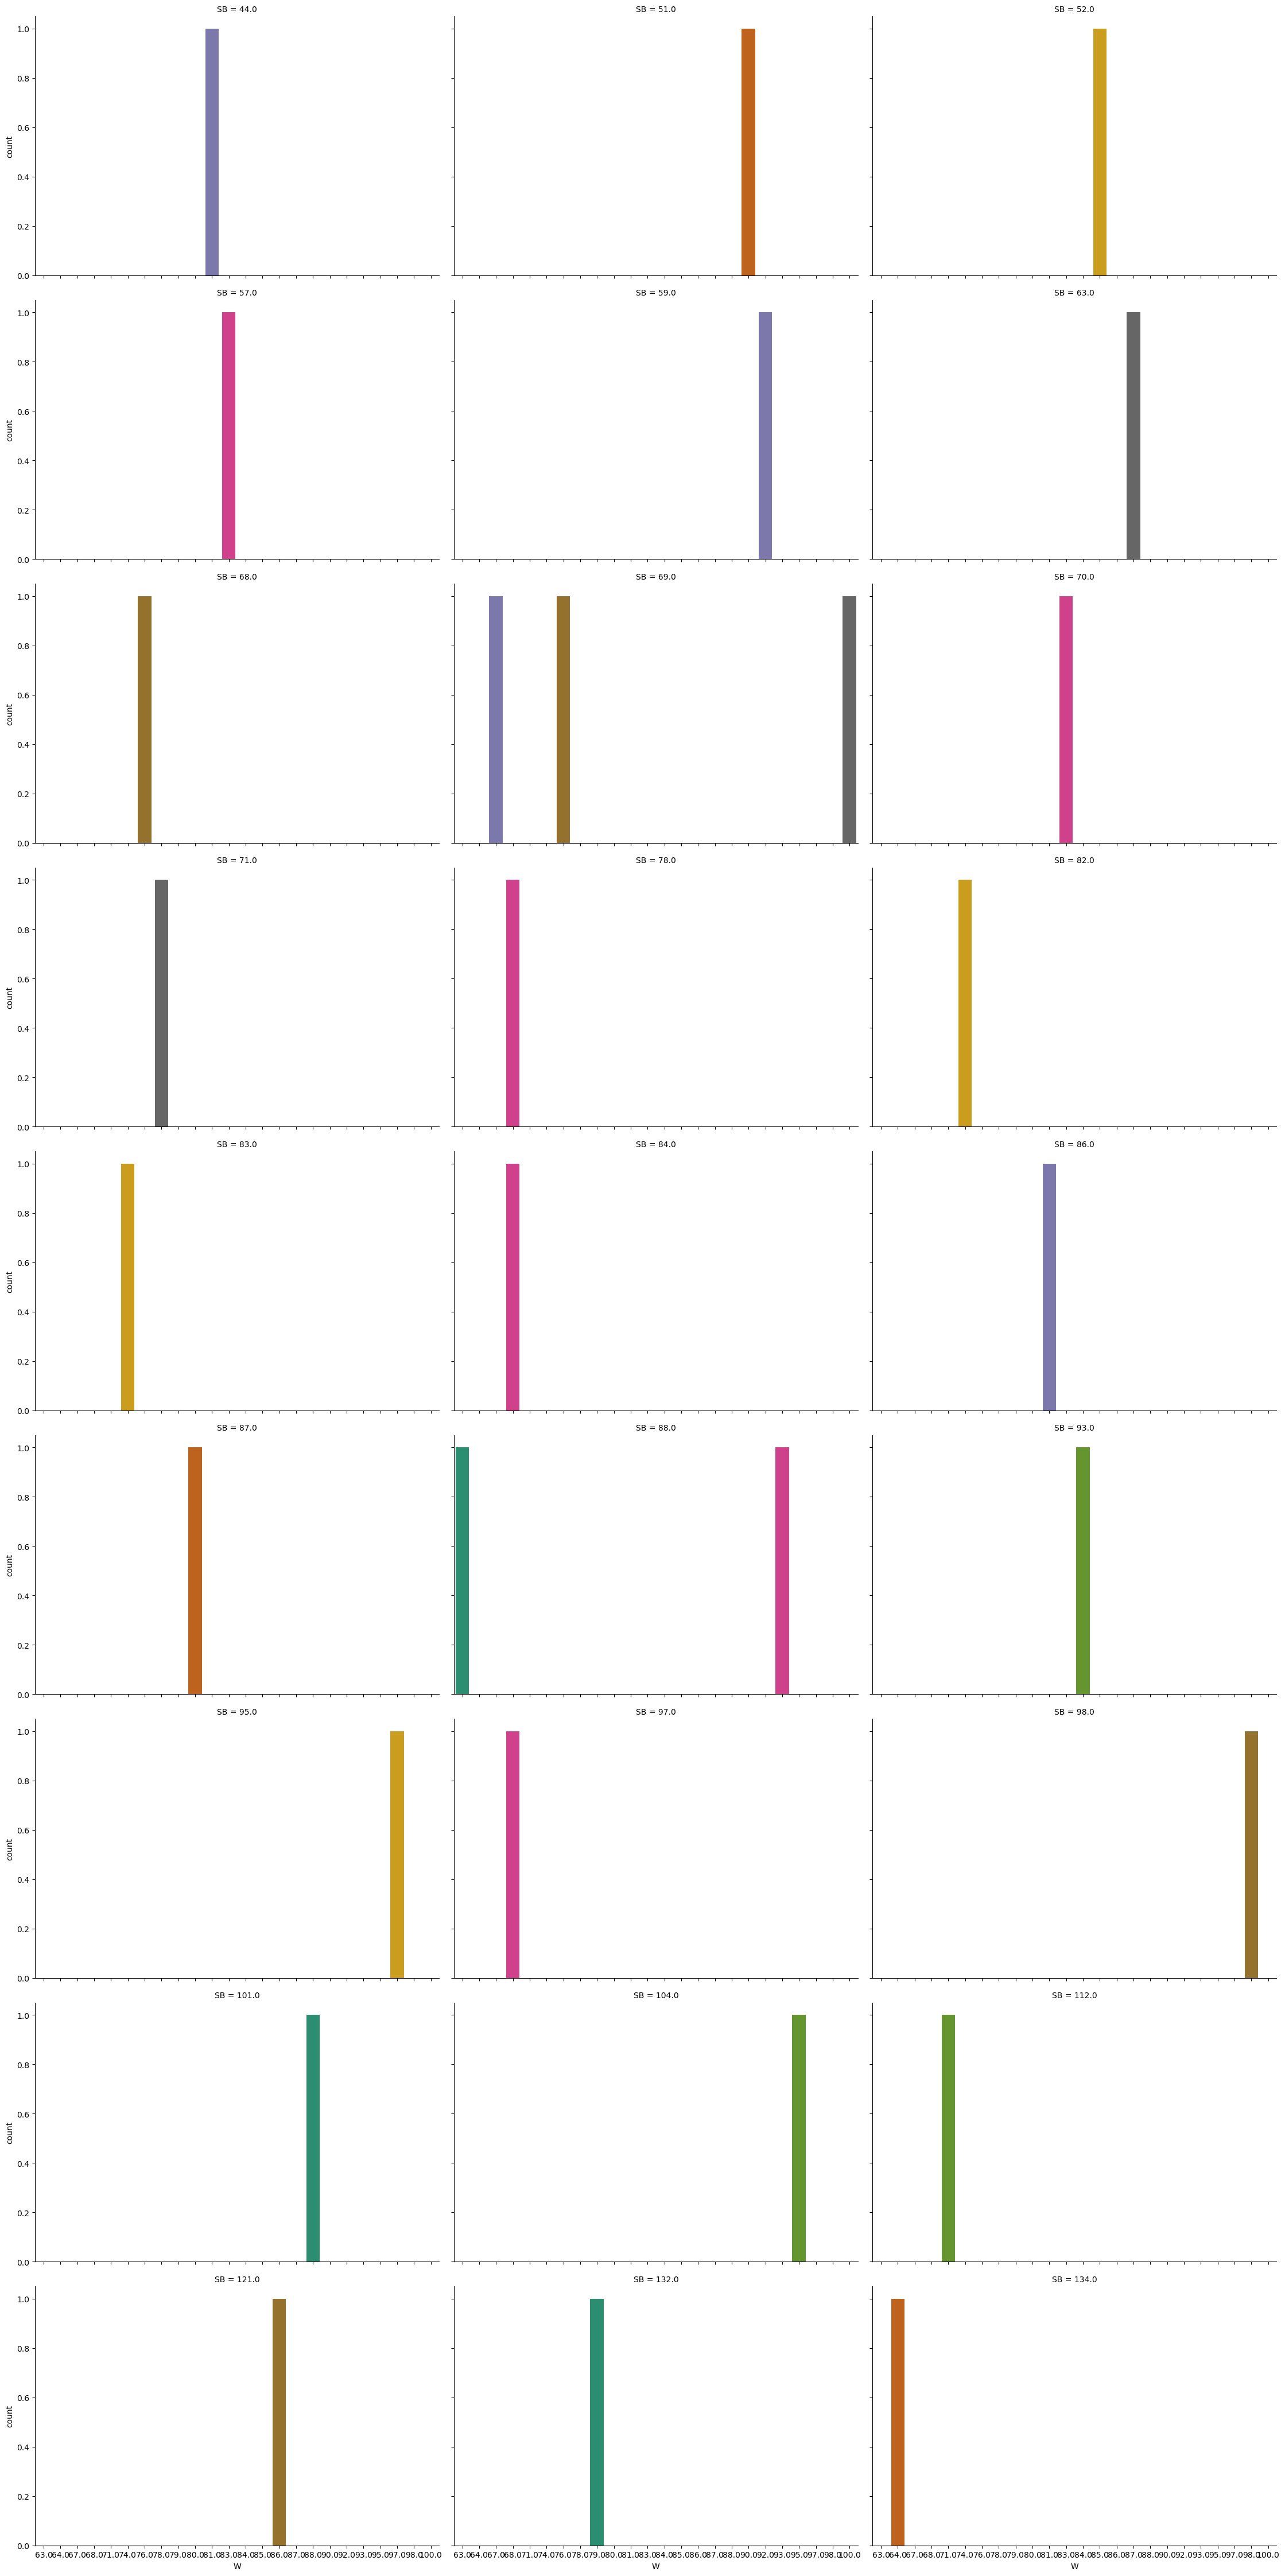

<Figure size 200x200 with 0 Axes>

In [142]:
sns.catplot(x= 'W', col= 'SB', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

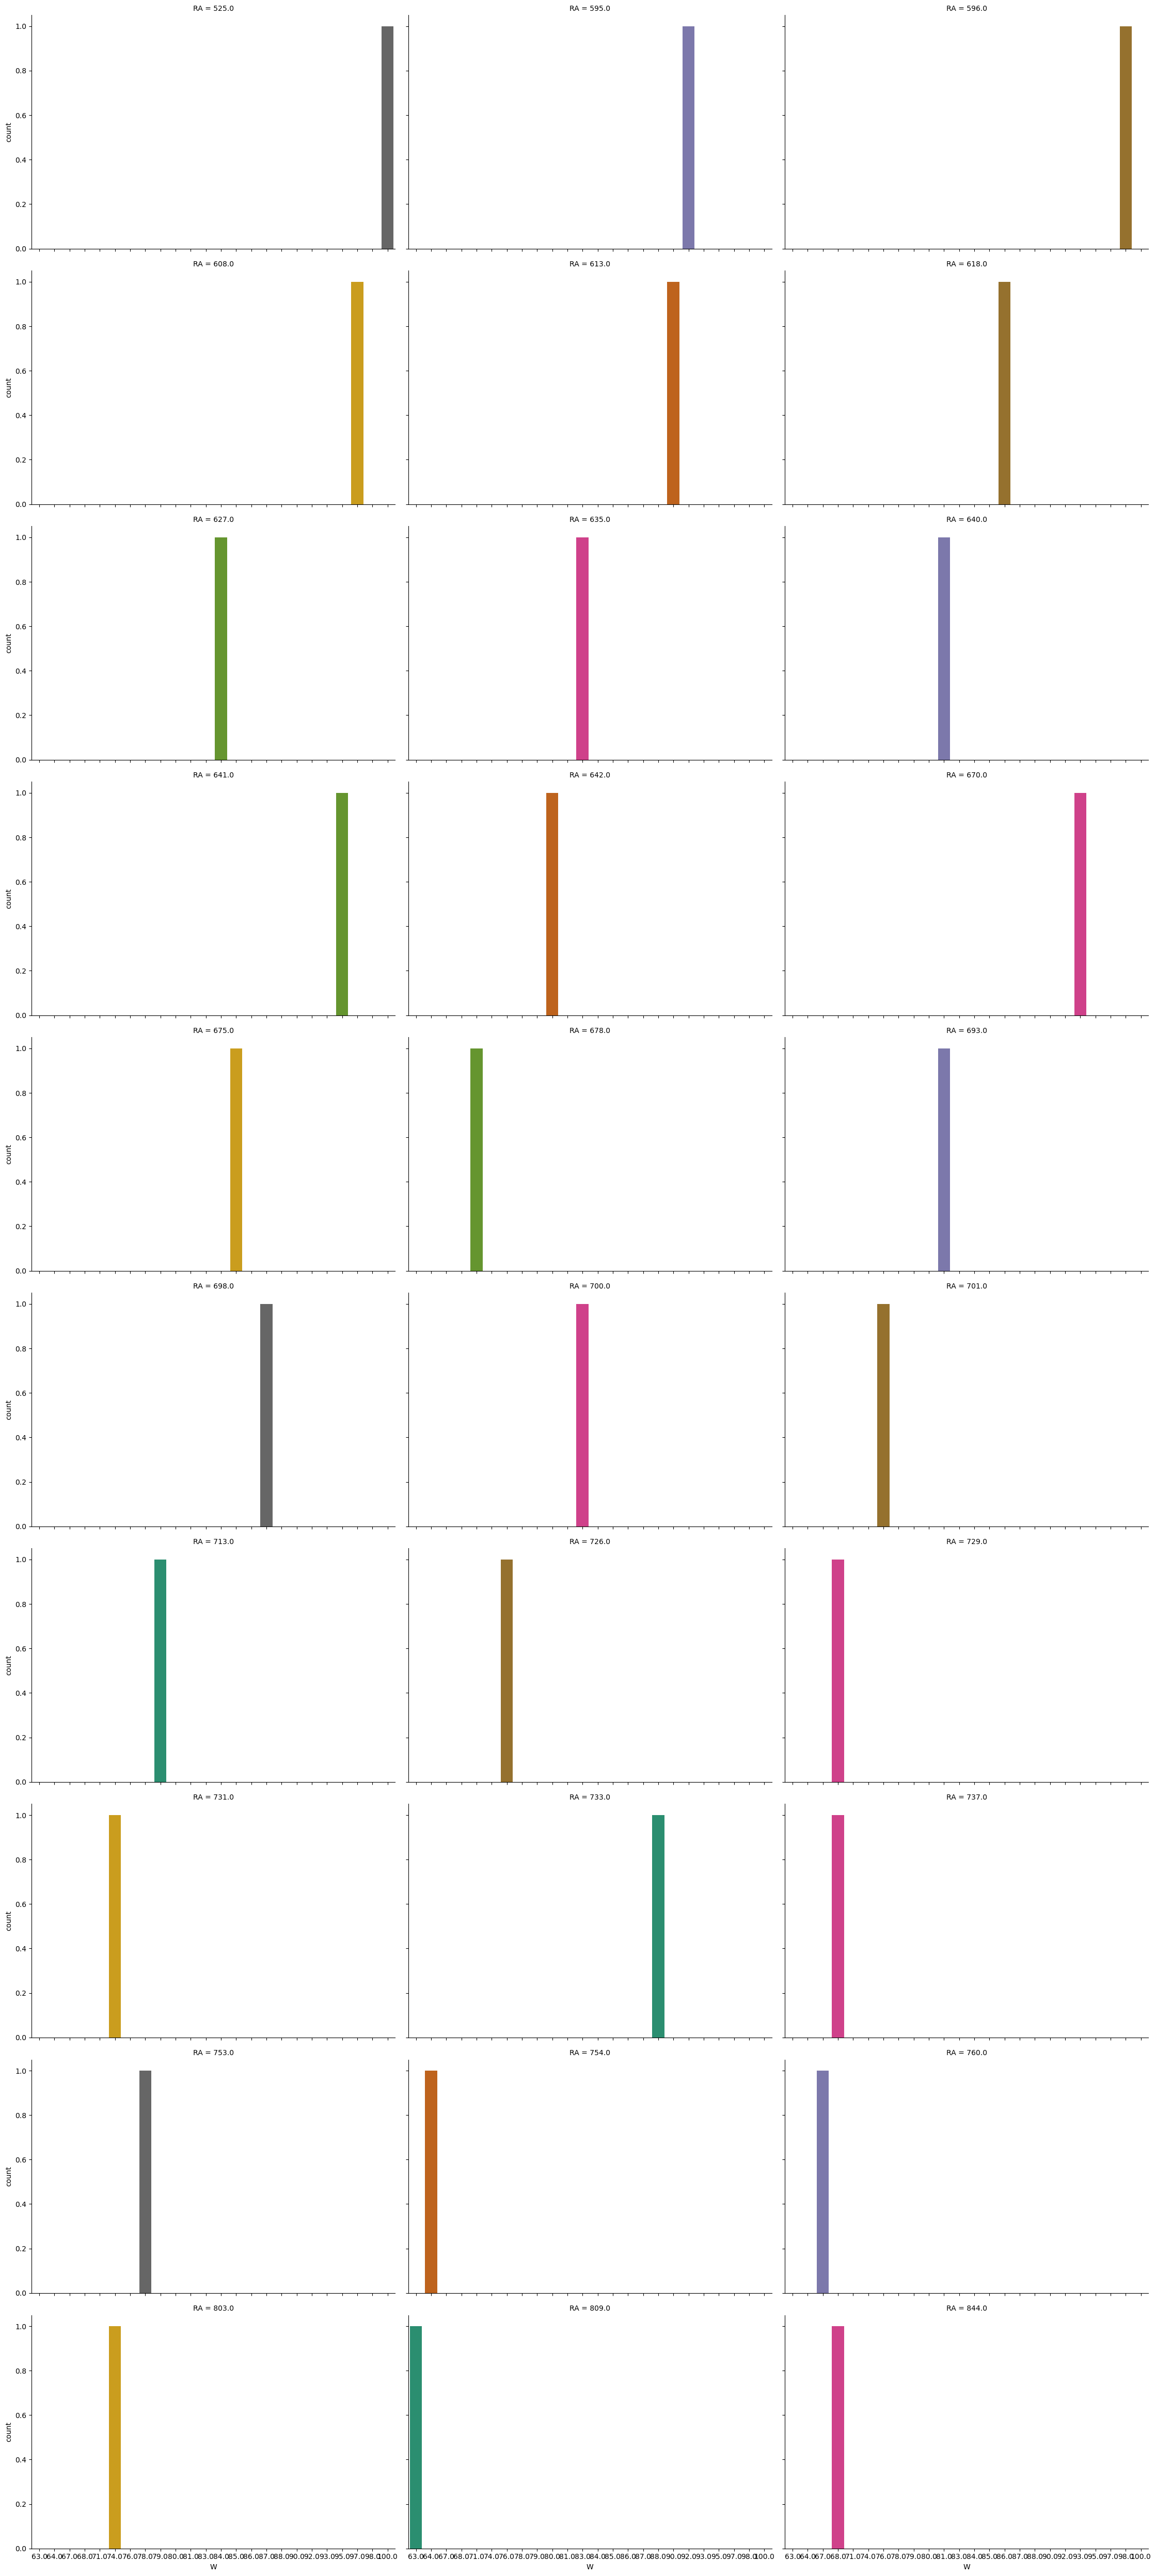

<Figure size 200x200 with 0 Axes>

In [143]:
sns.catplot(x= 'W', col= 'RA', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

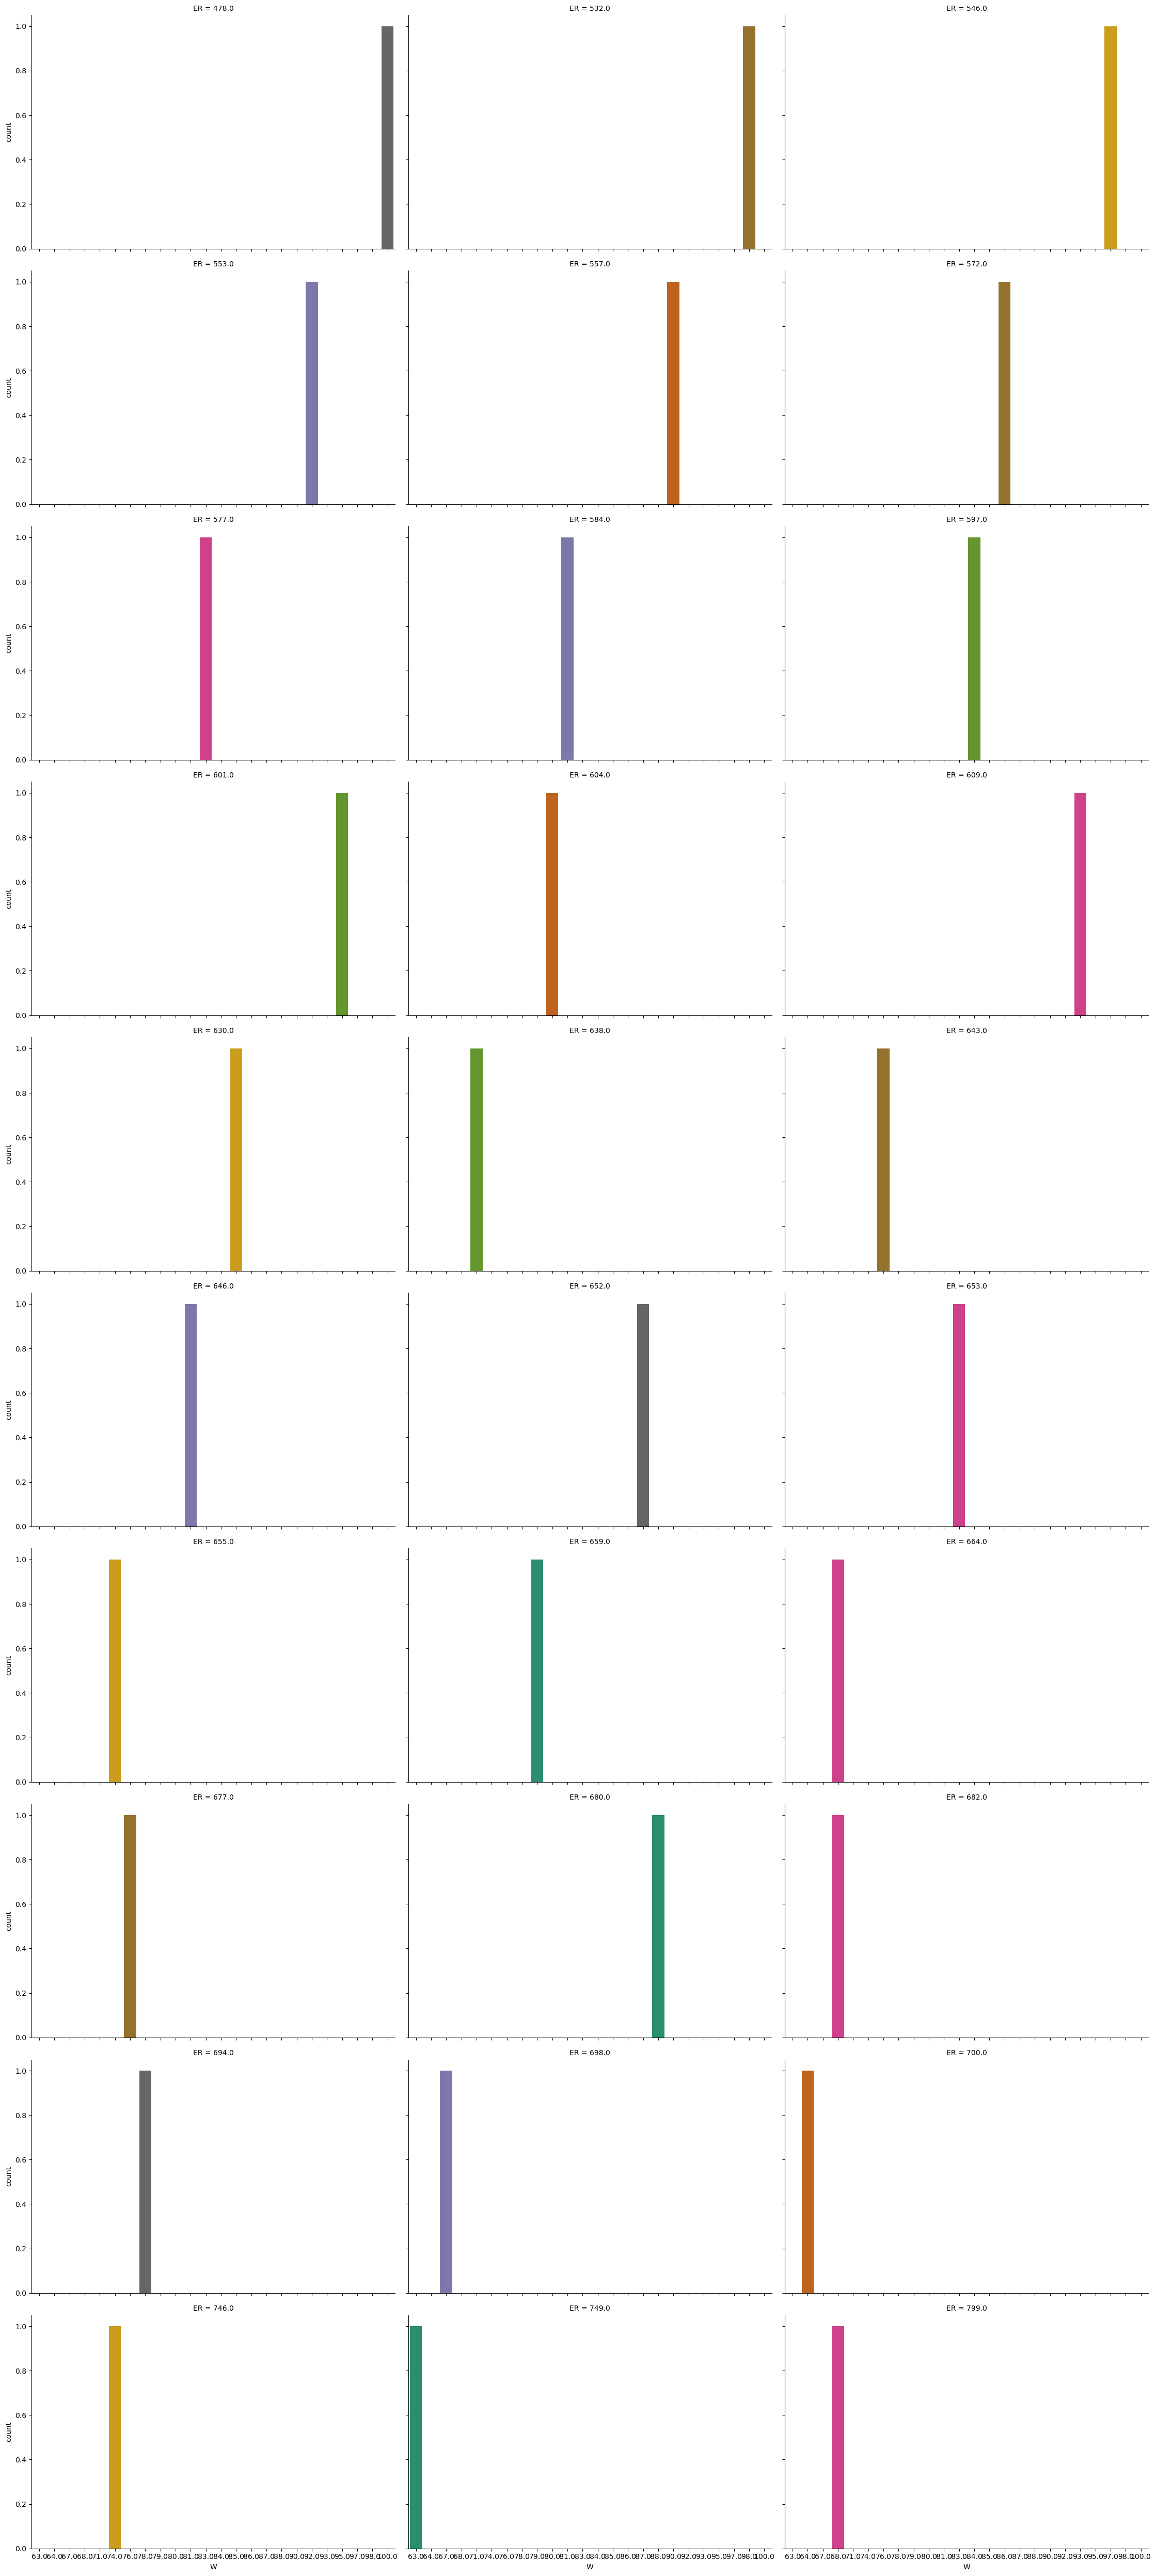

<Figure size 200x200 with 0 Axes>

In [144]:
sns.catplot(x= 'W', col= 'ER', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

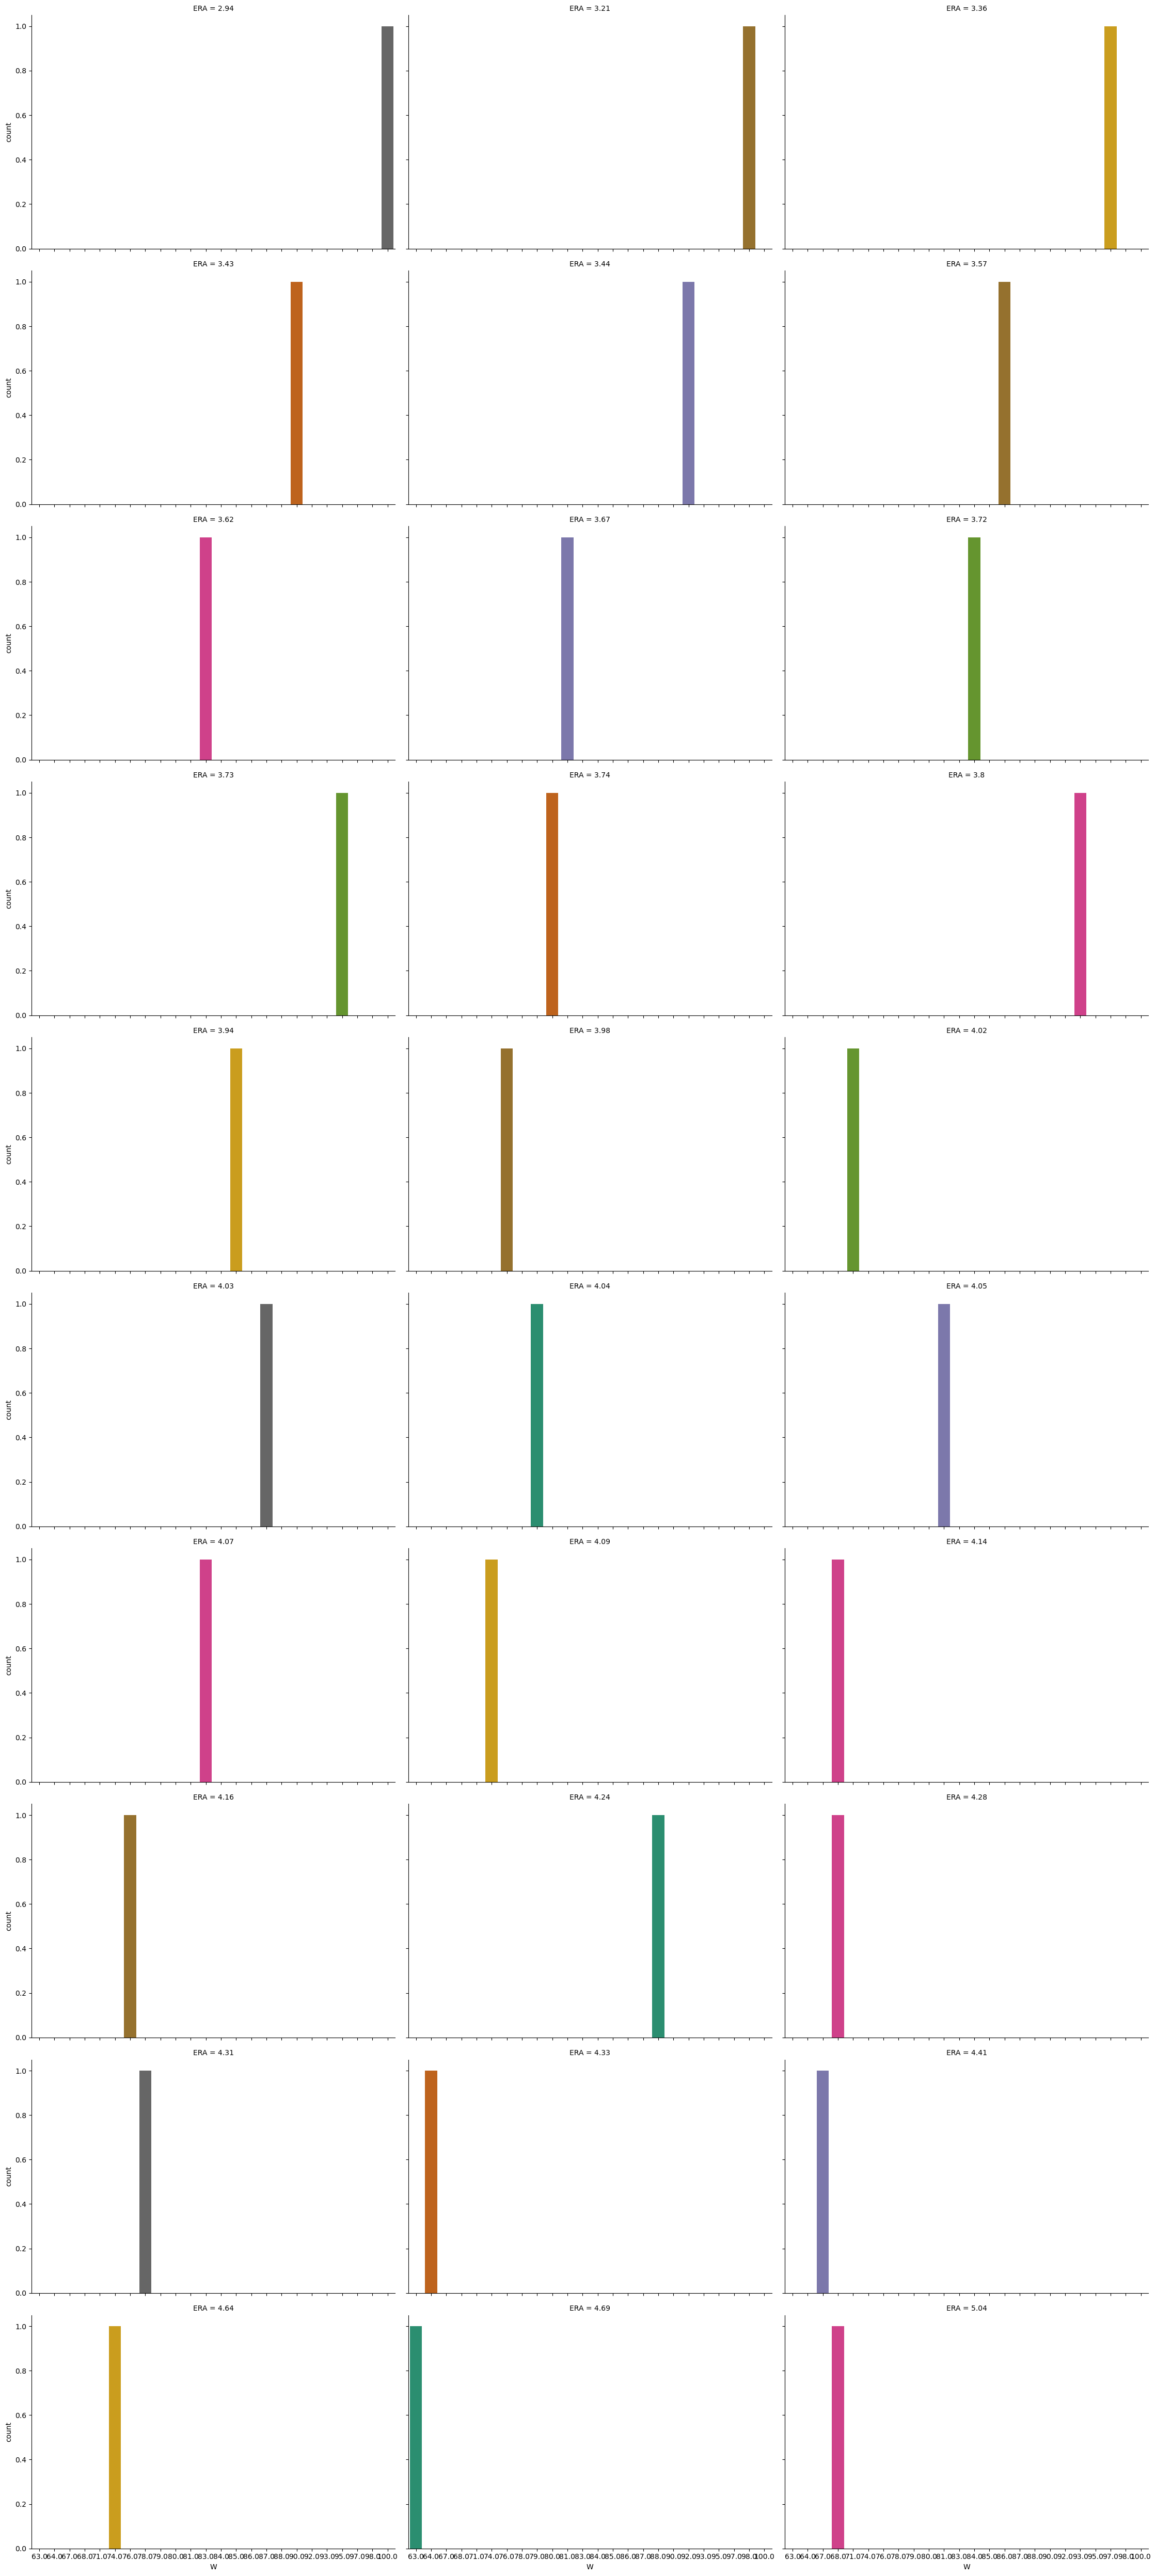

<Figure size 200x200 with 0 Axes>

In [145]:
sns.catplot(x= 'W', col= 'ERA', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

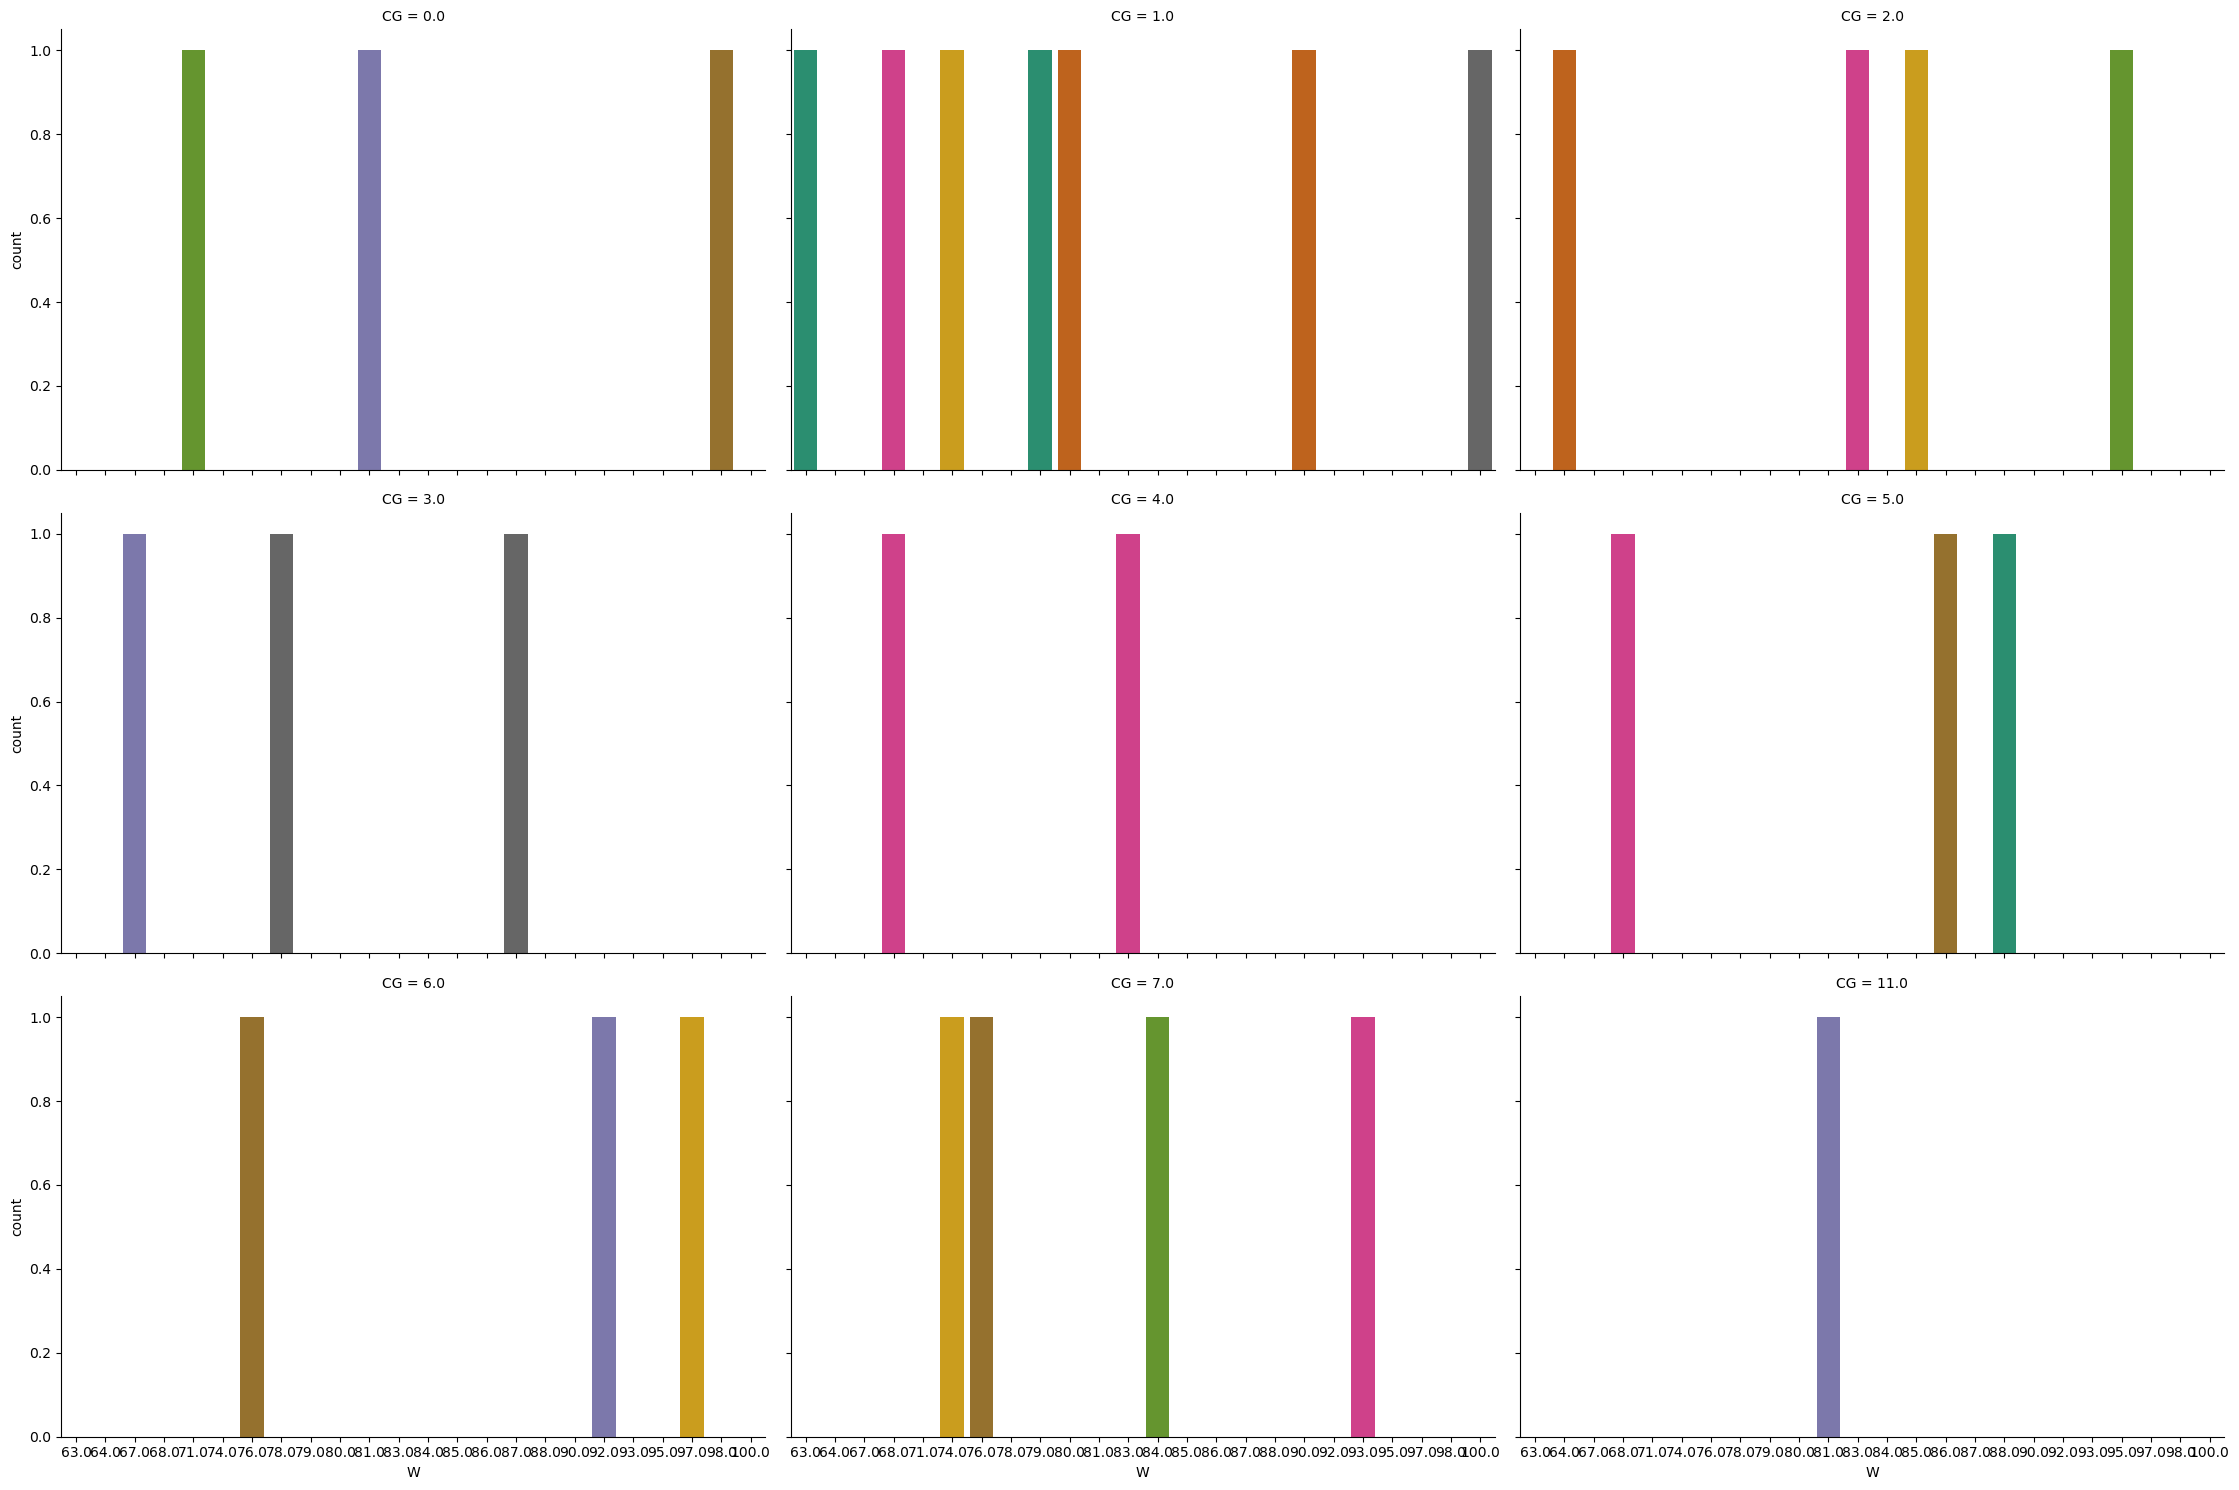

<Figure size 200x200 with 0 Axes>

In [146]:
sns.catplot(x= 'W', col= 'CG', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

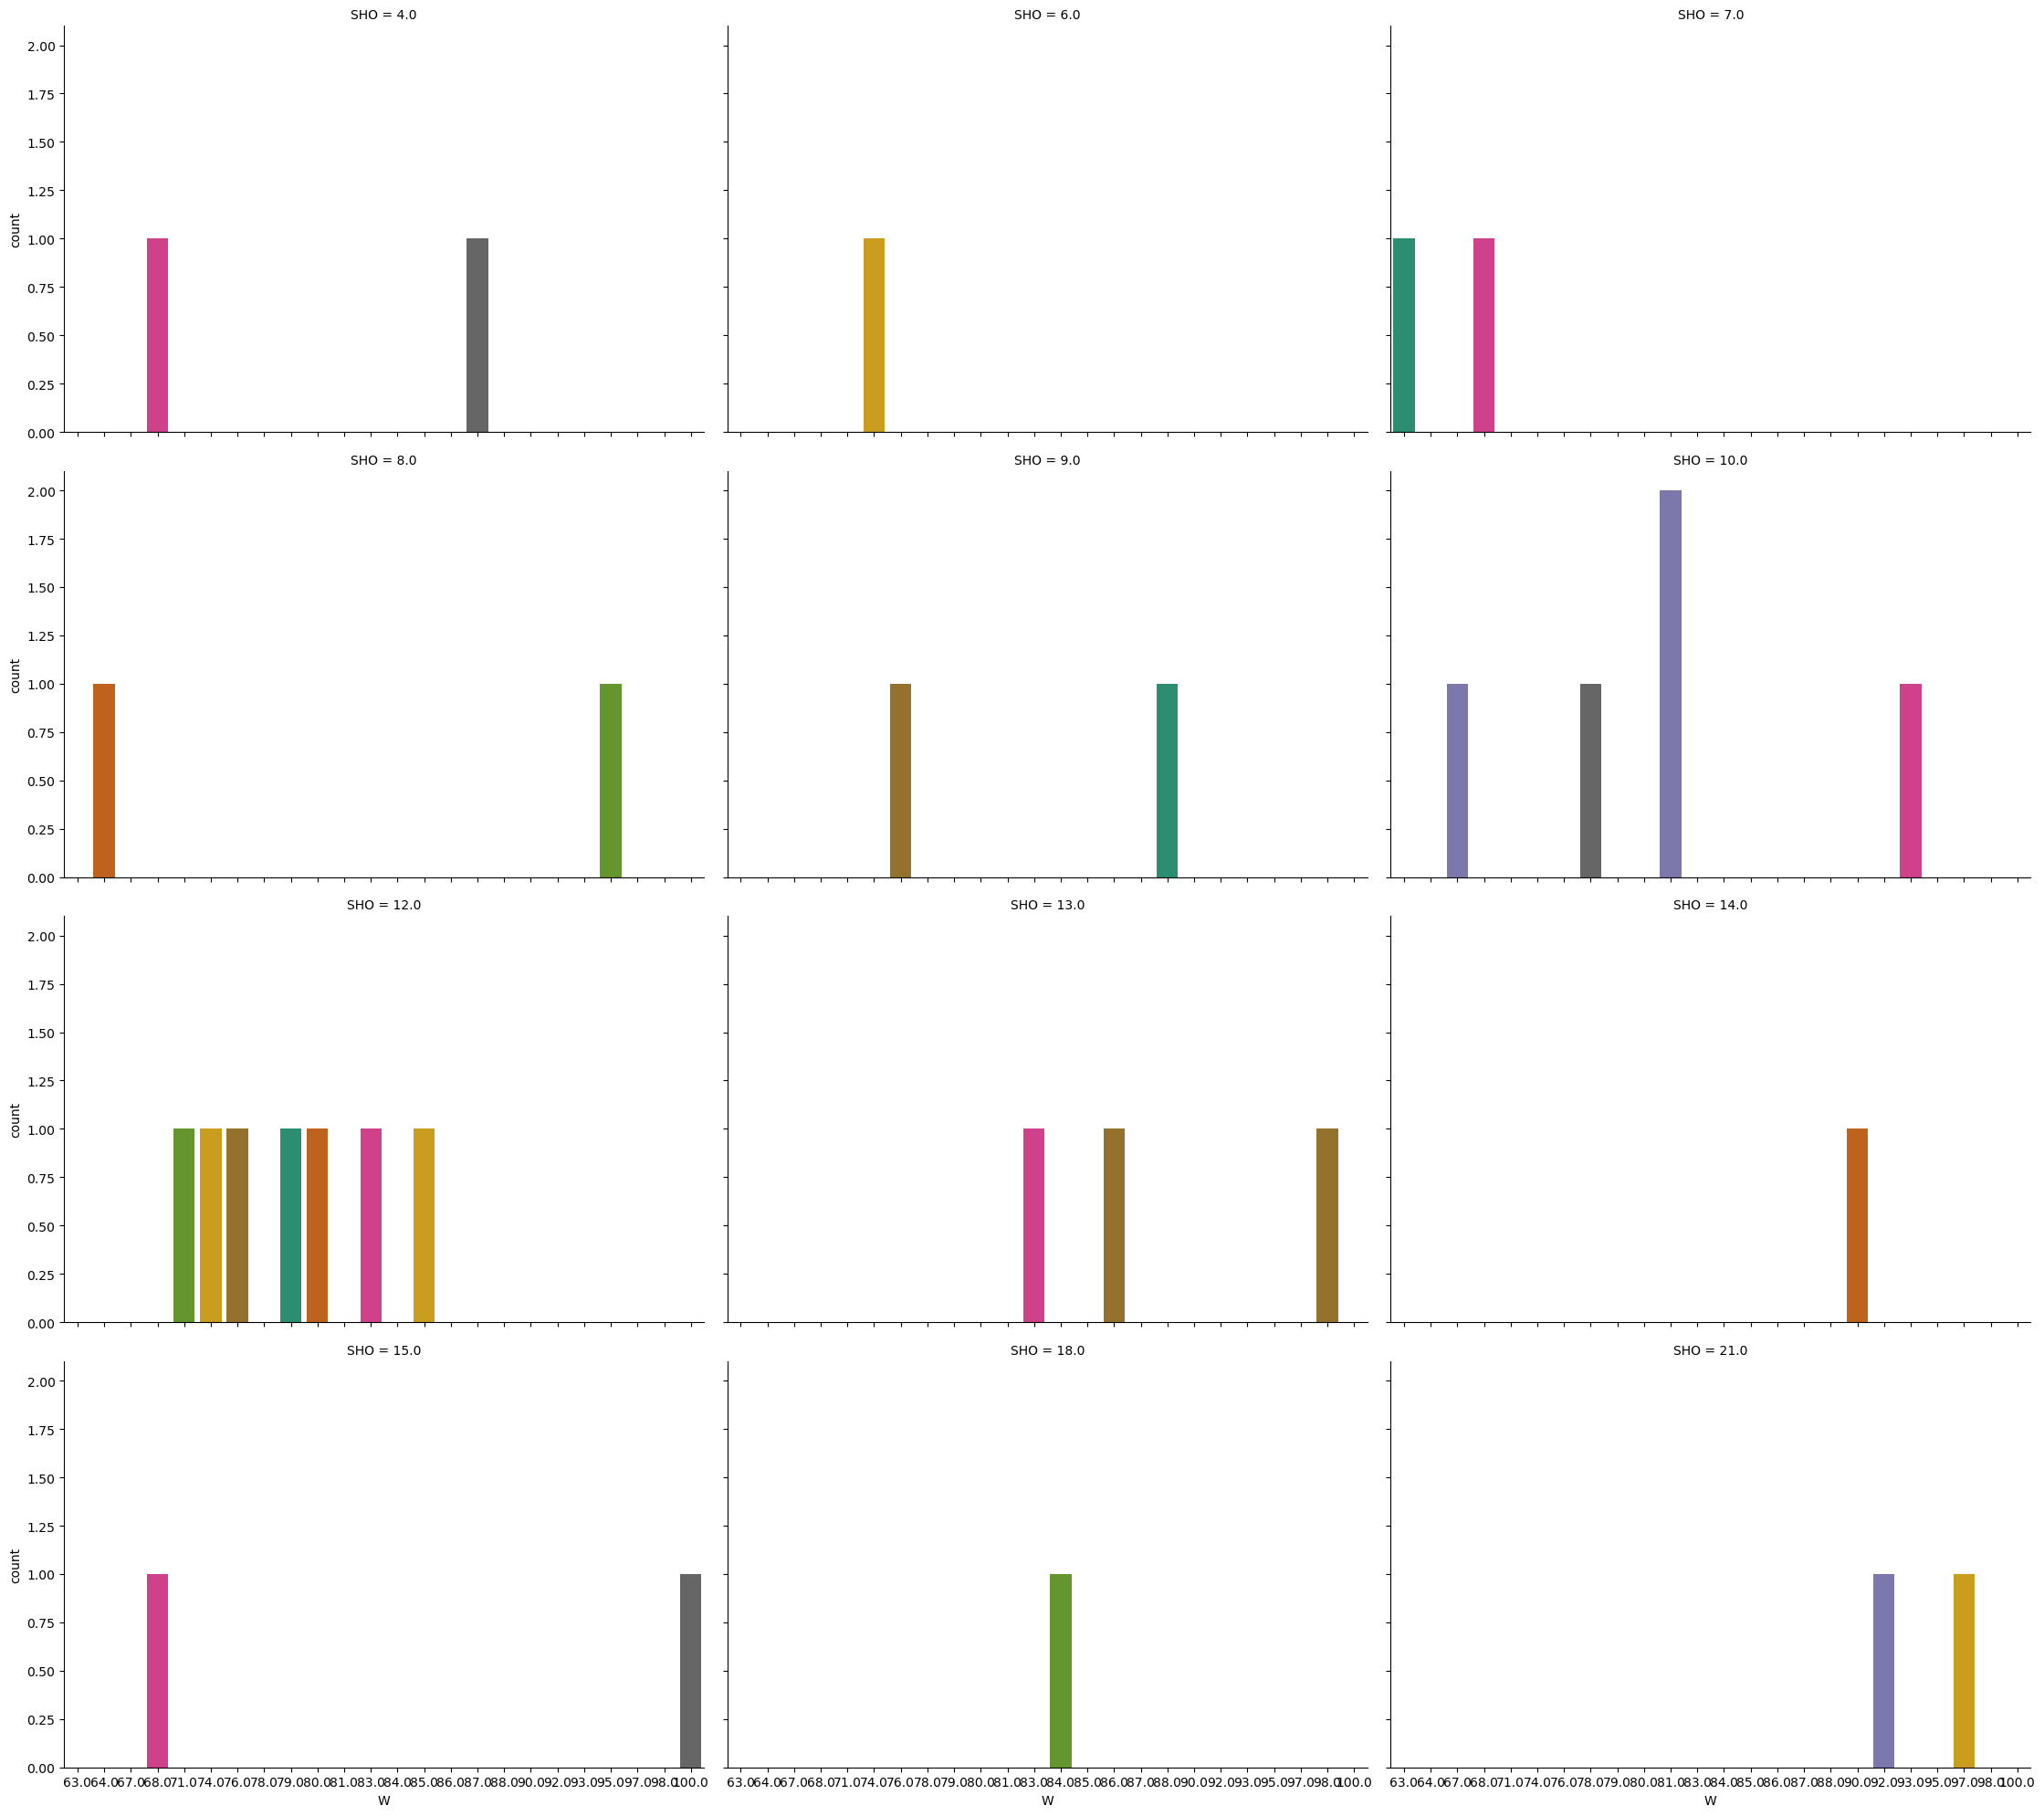

<Figure size 200x200 with 0 Axes>

In [147]:
sns.catplot(x= 'W', col= 'SHO', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

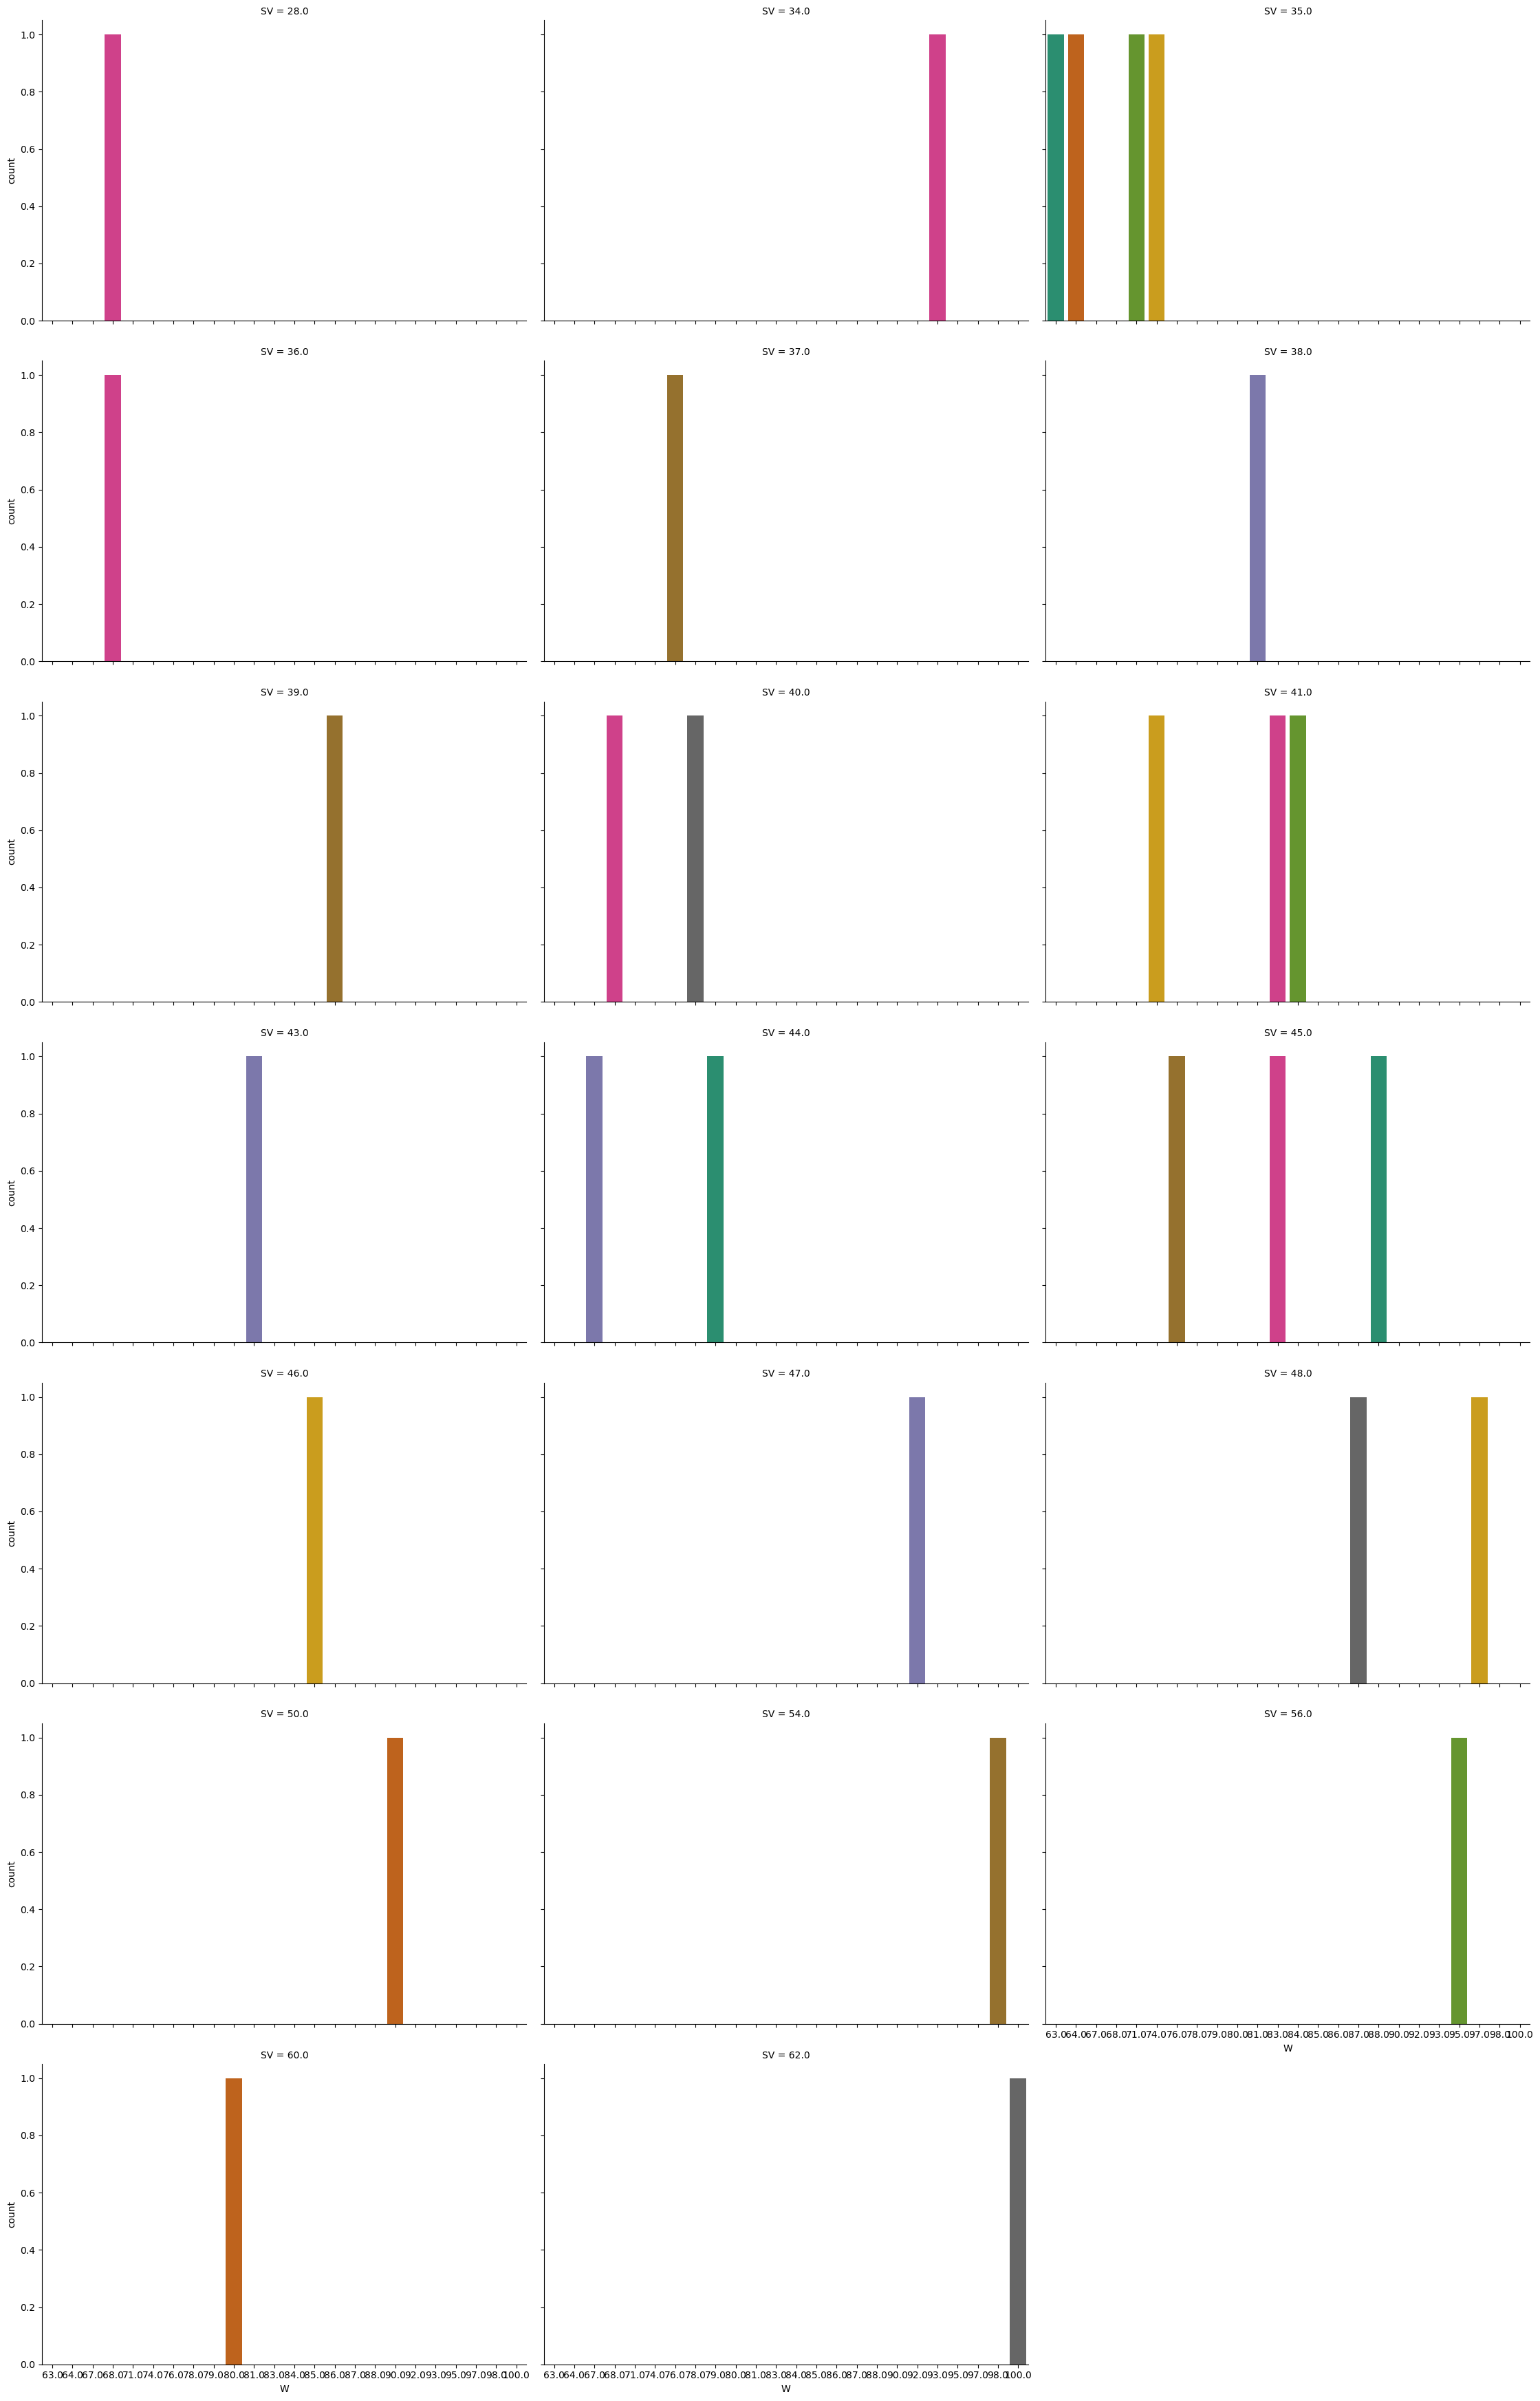

<Figure size 200x200 with 0 Axes>

In [148]:
sns.catplot(x= 'W', col= 'SV', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

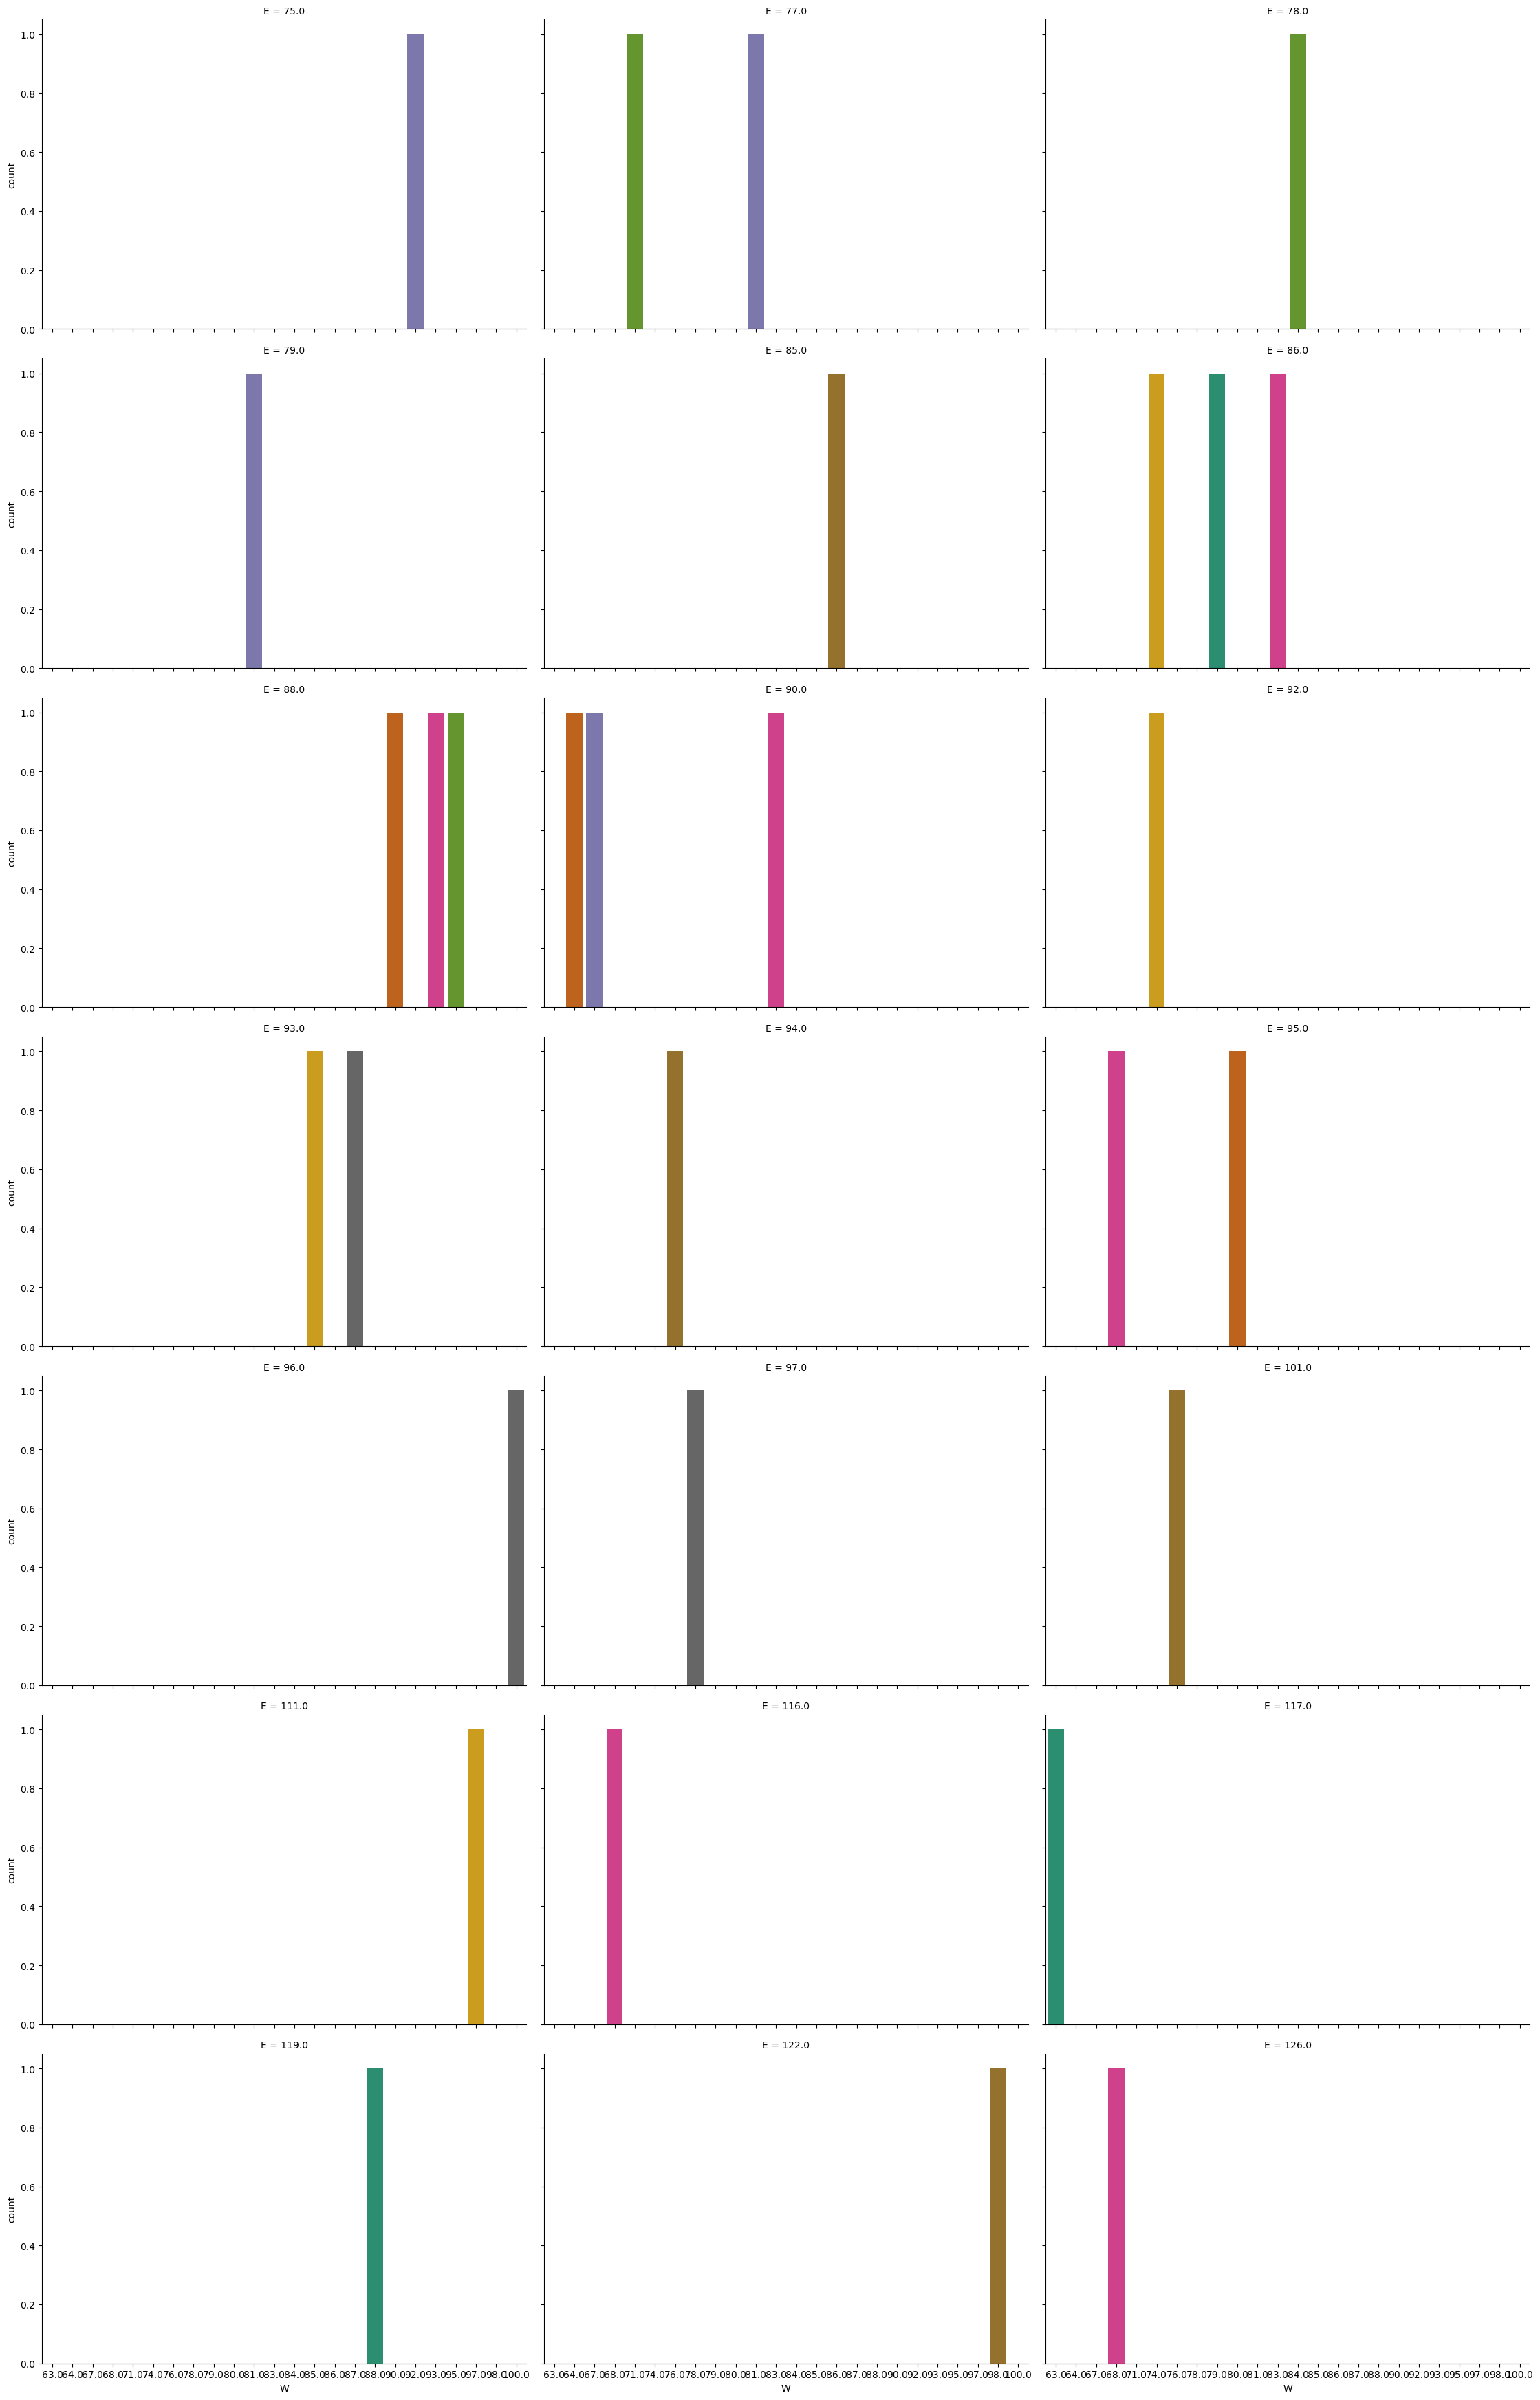

<Figure size 200x200 with 0 Axes>

In [149]:
sns.catplot(x= 'W', col= 'E', data = baseball_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)
plt.figure(figsize=(2,2))
plt.show()

From most of the above plots, we can't get any conclusive statements other than different values of w scolumn assigned to different values of the other column in the input variables section.

Let's check for skewness in the columns

In [5]:
baseball_data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

There is much skewness in the columns, so let's move to distribution plot of the output/target column.

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_6812\88656084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(baseball_data['W'],color="b", kde_kws={"shade":True}, hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


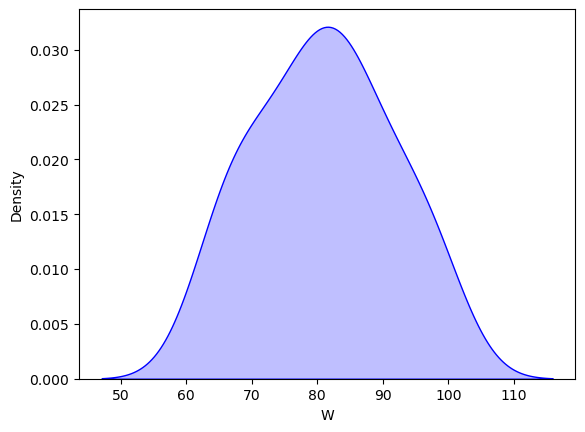

In [151]:
sns.distplot(baseball_data['W'],color="b", kde_kws={"shade":True}, hist=False)
plt.show()

We can see that all values in the w in the columns are normally distributed.

Let's finalise the conversion of all the values in our dataframe into float values using the oridinal encoder method.

In [6]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in baseball_data.columns:
    if baseball_data[i].dtypes=='int64':
        baseball_data[i]=OE.fit_transform(baseball_data[i].values.reshape(-1,1))
baseball_data

W      R      AB       H     2B    3B     HR     BB      SO     SB  \
0    95.0  724.0  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1    83.0  696.0  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2    81.0  669.0  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3    76.0  622.0  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4    74.0  689.0  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   
5    93.0  891.0  5509.0  1480.0  308.0  17.0  232.0  570.0  1151.0   88.0   
6    87.0  764.0  5567.0  1397.0  272.0  19.0  212.0  554.0  1227.0   63.0   
7    81.0  713.0  5485.0  1370.0  246.0  20.0  217.0  418.0  1331.0   44.0   
8    80.0  644.0  5485.0  1383.0  278.0  32.0  167.0  436.0  1310.0   87.0   
9    78.0  748.0  5640.0  1495.0  294.0  33.0  161.0  478.0  1148.0   71.0   
10   88.0  751.0  5511.0  1419.0  279.0  32.0  172.0  503.0  1233.0  101.0   
11   86.0  729.0  5459.0  1363.0  278.0  26.0  230.0  486.0  1392.0  121.0   
12   85.0  661.0  5417.0  1331.0  243.0  21.0  176.0  435.0  1150.0   52.0   
13   76.0  656.0  5544.0  1379.0  262.0  22.0  198.0  478.0  1336.0   69.0   
14   68.0  694.0  5600.0  1405.0  277.0  46.0  146.0  475.0  1119.0   78.0   
15  100.0  647.0  5484.0  1386.0  288.0  39.0  137.0  506.0  1267.0   69.0   
16   98.0  697.0  5631.0  1462.0  292.0  27.0  140.0  461.0  1322.0   98.0   
17   97.0  689.0  5491.0  1341.0  272.0  30.0  171.0  567.0  1518.0   95.0   
18   68.0  655.0  5480.0  1378.0  274.0  34.0  145.0  412.0  1299.0   84.0   
19   64.0  640.0  5571.0  1382.0  257.0  27.0  167.0  496.0  1255.0  134.0   
20   90.0  683.0  5527.0  1351.0  295.0  17.0  177.0  488.0  1290.0   51.0   
21   83.0  703.0  5428.0  1363.0  265.0  13.0  177.0  539.0  1344.0   57.0   
22   71.0  613.0  5463.0  1420.0  236.0  40.0  120.0  375.0  1150.0  112.0   
23   67.0  573.0  5420.0  1361.0  251.0  18.0  100.0  471.0  1107.0   69.0   
24   63.0  626.0  5529.0  1374.0  272.0  37.0  130.0  387.0  1274.0   88.0   
25   92.0  667.0  5385.0  1346.0  263.0  26.0  187.0  563.0  1258.0   59.0   
26   84.0  696.0  5565.0  1486.0  288.0  39.0  136.0  457.0  1159.0   93.0   
27   79.0  720.0  5649.0  1494.0  289.0  48.0  154.0  490.0  1312.0  132.0   
28   74.0  650.0  5457.0  1324.0  260.0  36.0  148.0  426.0  1327.0   82.0   
29   68.0  737.0  5572.0  1479.0  274.0  49.0  186.0  388.0  1283.0   97.0   

       RA     ER   ERA    CG   SHO    SV      E  
0   641.0  601.0  3.73   2.0   8.0  56.0   88.0  
1   700.0  653.0  4.07   2.0  12.0  45.0   86.0  
2   640.0  584.0  3.67  11.0  10.0  38.0   79.0  
3   701.0  643.0  3.98   7.0   9.0  37.0  101.0  
4   803.0  746.0  4.64   7.0  12.0  35.0   86.0  
5   670.0  609.0  3.80   7.0  10.0  34.0   88.0  
6   698.0  652.0  4.03   3.0   4.0  48.0   93.0  
7   693.0  646.0  4.05   0.0  10.0  43.0   77.0  
8   642.0  604.0  3.74   1.0  12.0  60.0   95.0  
9   753.0  694.0  4.31   3.0  10.0  40.0   97.0  
10  733.0  680.0  4.24   5.0   9.0  45.0  119.0  
11  618.0  572.0  3.57   5.0  13.0  39.0   85.0  
12  675.0  630.0  3.94   2.0  12.0  46.0   93.0  
13  726.0  677.0  4.16   6.0  12.0  45.0   94.0  
14  729.0  664.0  4.14   5.0  15.0  28.0  126.0  
15  525.0  478.0  2.94   1.0  15.0  62.0   96.0  
16  596.0  532.0  3.21   0.0  13.0  54.0  122.0  
17  608.0  546.0  3.36   6.0  21.0  48.0  111.0  
18  737.0  682.0  4.28   1.0   7.0  40.0  116.0  
19  754.0  700.0  4.33   2.0   8.0  35.0   90.0  
20  613.0  557.0  3.43   1.0  14.0  50.0   88.0  
21  635.0  577.0  3.62   4.0  13.0  41.0   90.0  
22  678.0  638.0  4.02   0.0  12.0  35.0   77.0  
23  760.0  698.0  4.41   3.0  10.0  44.0   90.0  
24  809.0  749.0  4.69   1.0   7.0  35.0  117.0  
25  595.0  553.0  3.44   6.0  21.0  47.0   75.0  
26  627.0  597.0  3.72   7.0  18.0  41.0   78.0  
27  713.0  659.0  4.04   1.0  12.0  44.0   86.0  
28  731.0  655.0  4.09   1.0   6.0  41.0   92.0  
29  844.0  799.0  5.04   4.0   4.0  36.0   95.0

Now let's check for z-score of the columns and remove any values that has a z score above 3/-3

In [7]:
from scipy.stats import zscore
out_features=baseball_data[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]
z=np.abs(zscore(out_features))
z

W         R        AB         H        2B        3B        HR  \
0   1.365409  0.619078  0.847731  1.663685  1.420173  1.041193  0.787299   
1   0.197838  0.134432  0.711094  0.970681  0.127403  1.235809  0.243967   
2   0.003243  0.332906  1.115233  0.151891  1.588795  0.223808  0.723377   
3   0.483244  1.146419  0.241522  0.401088  0.828122  0.418423  0.883181   
4   0.677839  0.013270  1.280738  1.984081  0.801892  1.722347  0.403770   
5   1.170814  3.509647  0.104884  1.361089  1.869832  1.391501  2.185047   
6   0.587028  1.311430  0.732263  0.116292  0.153633  1.196885  1.545833   
7   0.003243  0.428681  0.451289  0.596886  1.615025  1.099578  1.705636   
8   0.094054  0.765626  0.451289  0.365489  0.183611  0.068115  0.107601   
9   0.288649  1.034489  1.785913  1.628086  1.082929  0.165423  0.084163   
10  0.684326  1.086415  0.076017  0.275303  0.239818  0.068115  0.267405   
11  0.489731  0.705622  0.826562  0.721484  0.183611  0.515731  2.121125   
12  0.392433  0.471376  1.432772  1.291077  1.783647  1.002270  0.395247   
13  0.483244  0.557920  0.400291  0.436688  0.715707  0.904962  1.098383   
14  1.261625  0.099814  1.208570  0.026106  0.127403  1.430424  0.563574   
15  1.851896  0.713699  0.465723  0.312089  0.745685  0.749270  0.851220   
16  1.657301  0.151740  1.656011  1.040693  0.970514  0.418423  0.755338   
17  1.560004  0.013270  0.364688  1.113079  0.153633  0.126500  0.235444   
18  1.261625  0.575229  0.523457  0.454487  0.041219  0.262731  0.595534   
19  1.650815  0.834861  0.789997  0.383288  0.996744  0.418423  0.107601   
20  0.878921  0.090583  0.154920  0.935081  1.139136  1.391501  0.427208   
21  0.197838  0.255593  1.274002  0.721484  0.547085  1.780732  0.427208   
22  0.969732  1.302198  0.768828  0.293103  2.177099  0.846578  1.394552   
23  1.358922  1.994550  1.389471  0.757084  1.333988  1.294193  2.033766   
24  1.748112  1.077184  0.183787  0.525687  0.153633  0.554654  1.074945   
25  1.073516  0.367523  1.894646  1.024080  0.659500  0.515731  0.746815   
26  0.295136  0.134432  0.703396  1.467888  0.745685  0.749270  0.883181   
27  0.191352  0.549843  1.915815  1.610286  0.801892  1.625040  0.307888   
28  0.677839  0.661773  0.855429  1.415675  0.828122  0.457346  0.499652   
29  1.261625  0.844092  0.804431  1.343289  0.041219  1.722347  0.714854   

          BB        SO        SB        RA        ER       ERA        CG  \
0   1.534902  2.697630  0.913883  0.666234  0.505110  0.506955  0.539806   
1   0.536592  0.154878  0.601826  0.165971  0.248930  0.254598  0.539806   
2   1.139144  0.893982  0.111449  0.680339  0.751623  0.641347  2.772641   
3   1.160536  0.168602  0.690985  0.180076  0.103922  0.053010  1.300442   
4   0.251360  0.105866  0.022290  1.618803  1.597501  1.531318  1.300442   
5   1.798742  0.952796  0.200609  0.257184  0.389104  0.350165  1.300442   
6   1.513510  0.207812  0.913883  0.137760  0.234429  0.165003  0.171757   
7   0.910958  0.811641  1.760897  0.067235  0.147424  0.209800  1.275906   
8   0.590073  0.605790  0.156029  0.652129  0.461608  0.484557  0.907856   
9   0.158660  0.982204  0.557246  0.913544  0.843461  0.792164  0.171757   
10  0.604334  0.148997  0.780144  0.631441  0.640451  0.635374  0.564343   
11  0.301276  1.409590  1.671738  0.990653  0.925632  0.865333  0.564343   
12  0.607900  0.962599  1.404260  0.186658  0.084588  0.036584  0.539806   
13  0.158660  0.860654  0.646405  0.532705  0.596948  0.456185  0.932393   
14  0.105179  1.266474  0.245188  0.575021  0.408438  0.411388  0.564343   
15  0.657815  0.184286  0.646405  2.302433  2.288705  2.276445  0.907856   
16  0.144398  0.723420  0.646405  1.300966  1.505663  1.671683  1.275906   
17  1.745261  2.644696  0.512666  1.131704  1.302652  1.335704  0.932393   
18  1.017920  0.497964  0.022290  0.687862  0.669452  0.724968  0.907856   
19  0.479546  0.066657  2.251273  0.927650  0.930466  0.836961  0.539806   
20  0.336930  0.409742  1.448839  1.061179  1.143144  1.17

In [8]:
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

There is only one column that has z score above 3/-3, so let's remove and declare our new dataset.

In [9]:
baseball_data_new=baseball_data[(z<3).all(axis=1)]
baseball_data_new.shape

(29, 17)

Now let's check for the data loss percentage after remove the value.

In [10]:
data_loss_percentage = ((baseball_data.shape[0] - baseball_data_new.shape[0]) / baseball_data.shape[0]) * 100
print("Data Loss Percentage:", data_loss_percentage)

Data Loss Percentage: 3.3333333333333335


The data loss percentage is under the acceptable limits. Let's see if the data loss percentage is acceptable after using the inter-quartile method.

In [157]:
Q1=out_features.quantile(0.25)
Q3=out_features.quantile(0.75)
IQR=Q3-Q1
baseball_data_marked=baseball_data[~((baseball_data<(Q1-1.5*IQR)) | (baseball_data>(Q3+1.5*IQR))).any(axis=1)]

In [158]:
data_loss_percentage = ((baseball_data.shape[0] - baseball_data_marked.shape[0]) / baseball_data.shape[0]) * 100
print("Data Loss Percentage:", data_loss_percentage)

Data Loss Percentage: 33.33333333333333


The data loss percentage is too high using the iqr method, so we will be using the z-score processed dataframe, and check for the correlations in the dataframe.

In [12]:
baseball_data_new_correlation = baseball_data_new.corr()
baseball_data_new_correlation

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.390451 -0.085780 -0.018360  0.384886 -0.206737  0.245697   
R    0.390451  1.000000  0.438022  0.433525  0.469293  0.134204  0.586894   
AB  -0.085780  0.438022  1.000000  0.769159  0.490752  0.445604 -0.064653   
H   -0.018360  0.433525  0.769159  1.000000  0.528016  0.582024 -0.218711   
2B   0.384886  0.469293  0.490752  0.528016  1.000000  0.342419 -0.098695   
3B  -0.206737  0.134204  0.445604  0.582024  0.342419  1.000000 -0.369299   
HR   0.245697  0.586894 -0.064653 -0.218711 -0.098695 -0.369299  1.000000   
BB   0.447513  0.258450 -0.137850 -0.222271  0.211243 -0.404852  0.336814   
SO   0.156469  0.081158 -0.111243 -0.371861 -0.096772 -0.196586  0.479914   
SB  -0.169503  0.075323  0.373674  0.417877  0.194308  0.483818 -0.166072   
RA  -0.823176 -0.013858  0.315499  0.244606 -0.215196  0.312750 -0.092586   
ER  -0.815308  0.007727  0.309146  0.280571 -0.224993  0.333731 -0.062094   
ERA -0.826952 -0.009122  0.254872  0.256458 -0.248212  0.325883 -0.070756   
CG   0.029594  0.101438 -0.078511  0.092577  0.244856 -0.003733  0.065978   
SHO  0.497526 -0.085108 -0.198872 -0.135116  0.084060 -0.058896  0.005546   
SV   0.749290  0.061381 -0.113342 -0.079814  0.269999 -0.210627  0.066984   
E   -0.072858  0.043123  0.316297 -0.011945  0.145032  0.108610 -0.189790   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.447513  0.156469 -0.169503 -0.823176 -0.815308 -0.826952  0.029594   
R    0.258450  0.081158  0.075323 -0.013858  0.007727 -0.009122  0.101438   
AB  -0.137850 -0.111243  0.373674  0.315499  0.309146  0.254872 -0.078511   
H   -0.222271 -0.371861  0.417877  0.244606  0.280571  0.256458  0.092577   
2B   0.211243 -0.096772  0.194308 -0.215196 -0.224993 -0.248212  0.244856   
3B  -0.404852 -0.196586  0.483818  0.312750  0.333731  0.325883 -0.003733   
HR   0.336814  0.479914 -0.166072 -0.092586 -0.062094 -0.070756  0.065978   
BB   1.000000  0.315566 -0.117622 -0.425381 -0.455832 -0.465794  0.417437   
SO   0.315566  1.000000  0.038188 -0.140570 -0.177655 -0.195362 -0.053075   
SB  -0.117622  0.038188  1.000000  0.134315  0.146243  0.128848 -0.030708   
RA  -0.425381 -0.140570  0.134315  1.000000  0.991286  0.986781 -0.005288   
ER  -0.455832 -0.177655  0.146243  0.991286  1.000000  0.997261 -0.002865   
ERA -0.465794 -0.195362  0.128848  0.986781  0.997261  1.000000  0.006038   
CG   0.417437 -0.053075 -0.030708 -0.005288 -0.002865  0.006038  1.000000   
SHO  0.473922  0.231230 -0.104602 -0.641579 -0.637293 -0.637186  0.264346   
SV   0.187101  0.091394 -0.179741 -0.642734 -0.621875 -0.637755 -0.332806   
E   -0.050114  0.142740  0.082702  0.195846  0.131556  0.108191 -0.123447   

          SHO        SV         E  
W    0.497526  0.749290 -0.072858  
R   -0.085108  0.061381  0.043123  
AB  -0.198872 -0.113342  0.316297  
H   -0.135116 -0.079814 -0.011945  
2B   0.084060  0.269999  0.145032  
3B  -0.058896 -0.210627  0.108610  
HR   0.005546  0.066984 -0.189790  
BB   0.473922  0.187101 -0.050114  
SO   0.231230  0.091394  0.142740  
SB  -0.104602 -0.179741  0.082702  
RA  -0.641579 -0.642734  0.195846  
ER  -0.637293 -0.621875  0.131556  
ERA -0.637186 -0.637755  0.108191  
CG   0.264346 -0.332806 -0.123447  
SHO  1.000000  0.214175 -0.121484  
SV   0.214175  1.000000 -0.045539  
E   -0.121484 -0.045539  1.000000

Let's visualise the correlations between different variables in the dataframe.

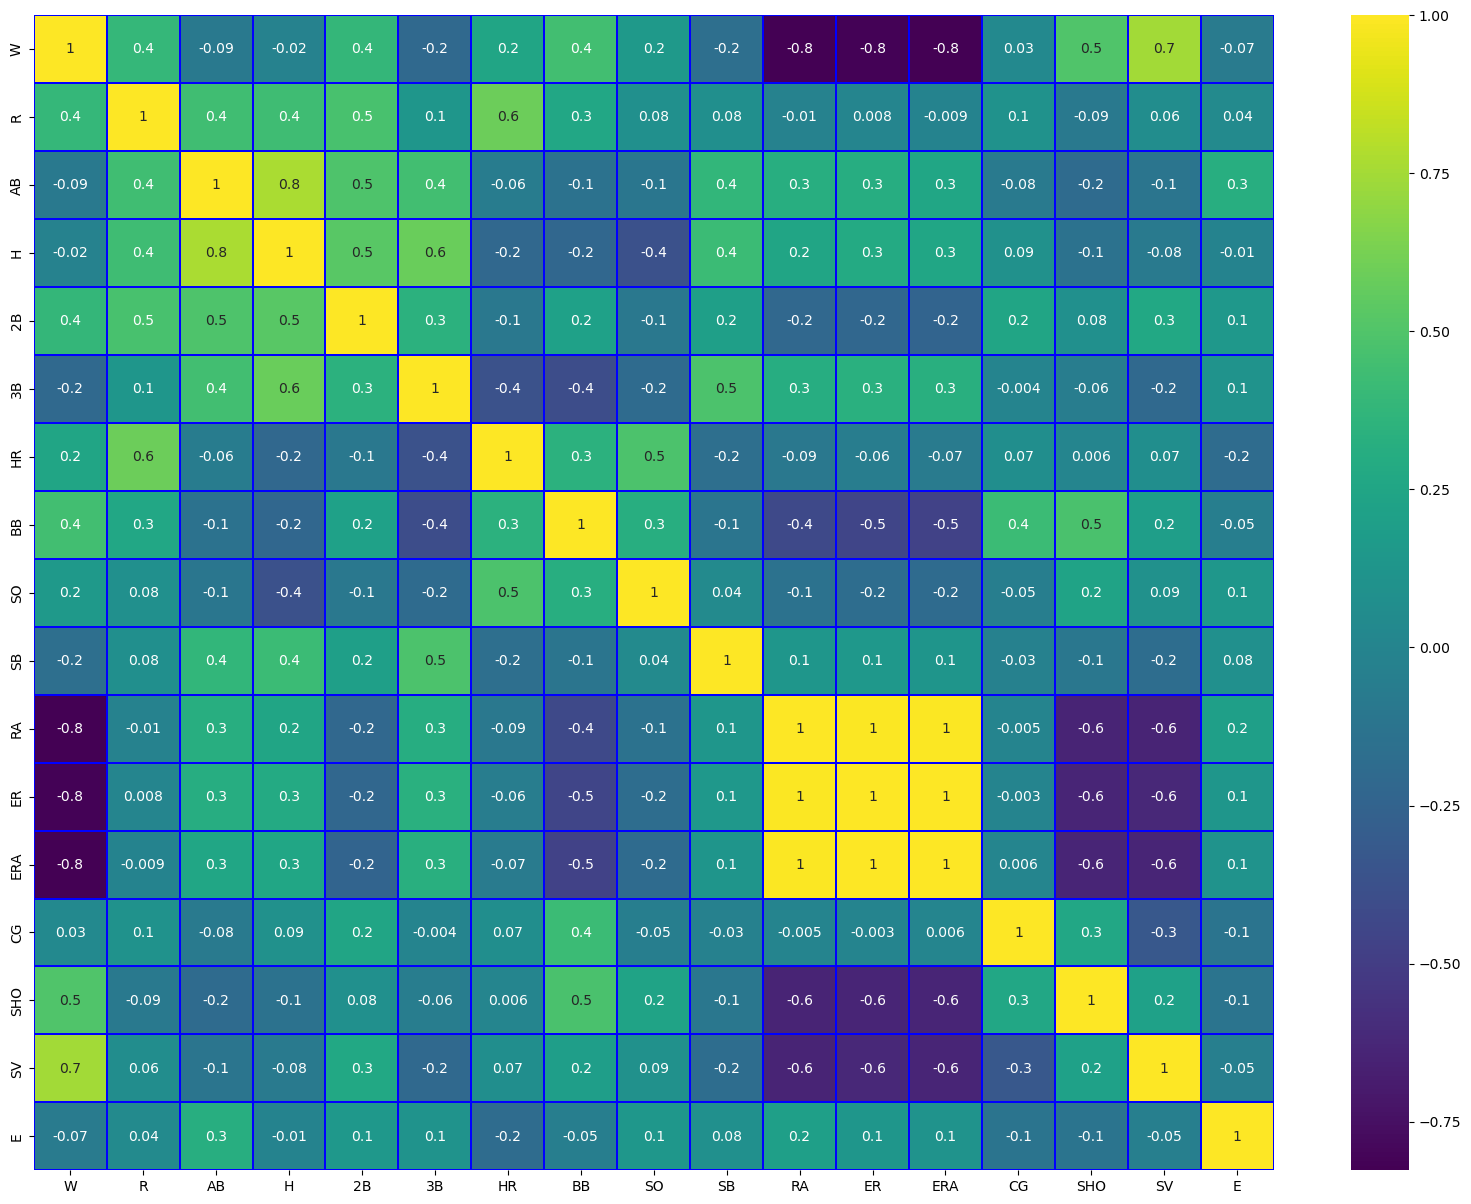

In [160]:
plt.figure(figsize = (20,15))
sns.heatmap(baseball_data_new.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")
plt.yticks(rotation=90);
plt.show()

From the above visualisations, below are the following details we get about their correlations-

1) Strong negative correlation between w and ra, er and era.
2) Strong negative correlation between sv and ra, er and era.
3) Strong negative correlation between sho and ra, er and era.
4) Weak positive correlation between sho and bb.
5) Weak negative correlation between bb and er, era and ra.
6) Weak negative correlation between 3b , bb and hr.
7) Positive correlation between 3b and h, sb.
8) Positive correlation between h, ab and 2b.
9) Positive correlation between r, ab ,h and 2b
10) Strong positive correlation between w and sv.
11) Strong positive correlation between sho and w.
12) Positive correlation between hr and r.
13) Positive correlation between hr and so.
14) weak negative correlation between bb, hr and 3b.
15) Positive correklation between bb and cg.

Let's sort the correlation values based on the output columns-W.

In [13]:
baseball_data_new_correlation['W'].sort_values(ascending = False)

W      1.000000
SV     0.749290
SHO    0.497526
BB     0.447513
R      0.390451
2B     0.384886
HR     0.245697
SO     0.156469
CG     0.029594
H     -0.018360
E     -0.072858
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.815308
RA    -0.823176
ERA   -0.826952
Name: W, dtype: float64

Let's visualise these correlations using the box plots.

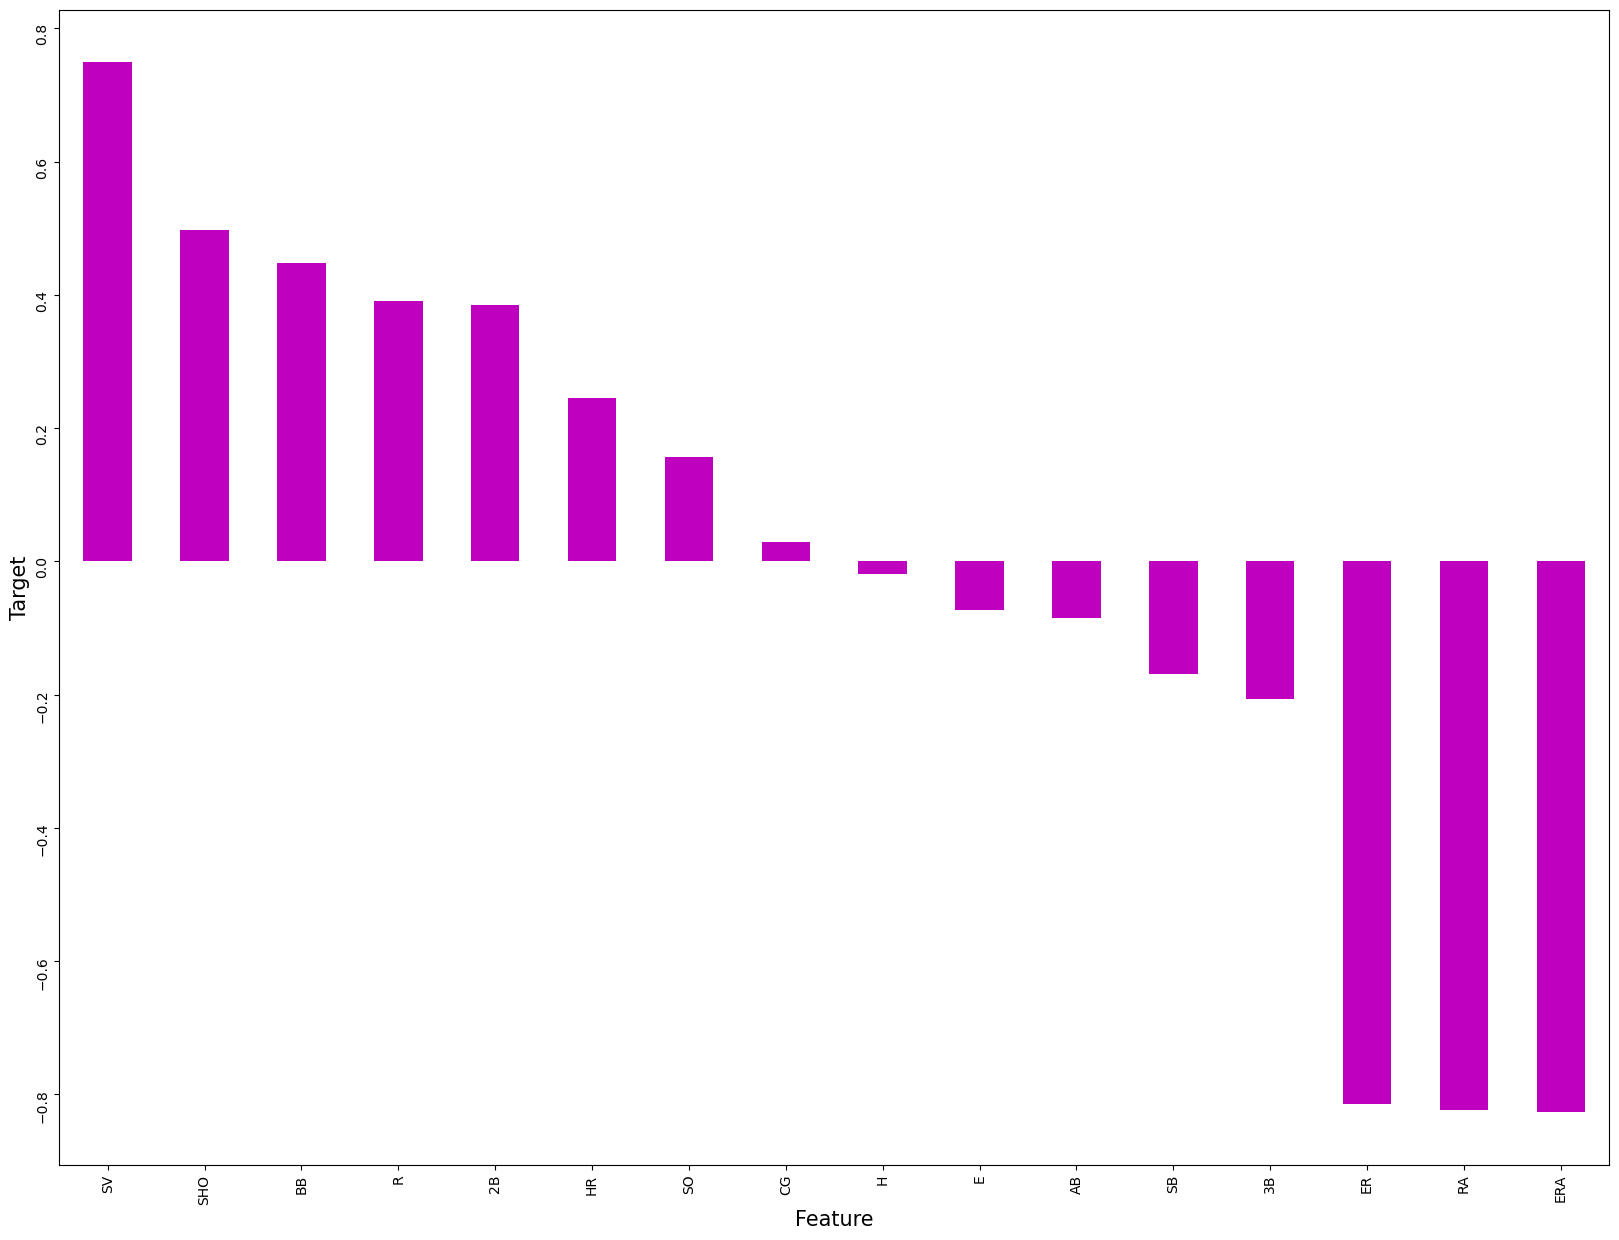

In [162]:
plt.figure(figsize = (20,15))
baseball_data_new_correlation['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.yticks(rotation=90);
plt.show()

We will be removing the columns with very less correlation later on in this project. Before that let's check the vif values after scaling the data based on the x and y variables reuqired by the objective of the project.

In [14]:
x=baseball_data_new.drop("W", axis=1)
y=baseball_data_new["W"]

We will be using standard scaler to achieve the preprocessing of the columns to check the vif values.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

R        AB         H        2B        3B        HR        BB  \
0   0.959398  0.830084  1.738306  1.556538  1.010845 -0.765863 -1.536359   
1   0.331147 -0.702831 -0.938698  0.201171  1.208917 -0.181389 -0.495021   
2  -0.274666 -1.100253 -0.106656  1.733325 -0.276617 -0.697101  1.252941   
3  -1.329231  0.233951 -0.359886 -0.800621 -0.474688 -0.869006 -1.145857   
4   0.174084  1.255894  2.063888  0.908319  1.704094 -0.353293 -0.197495   
5   1.856900  0.716535 -0.070480 -0.093474 -1.266972  1.743939  1.643442   
6   0.712585 -0.447345 -0.558853 -1.625627 -1.167936  1.915843 -0.885522   
7  -0.835605 -0.447345 -0.323710  0.260100  0.020490  0.196801 -0.550807   
8   1.497899  1.752672  1.702131  1.202964  0.119526 -0.009484  0.230197   
9   1.565212 -0.078310  0.327453  0.319029  0.020490  0.368705  0.695081   
10  1.071586 -0.816380 -0.685468  0.260100 -0.573723  2.362794  0.378960   
11 -0.454167 -1.412514 -1.264279 -1.802414 -1.068901  0.506228 -0.569402   
12 -0.566355  0.390081 -0.396062 -0.682763 -0.969865  1.262607  0.230197   
13  0.286272  1.184926  0.074223  0.201171  1.406988 -0.525197  0.174411   
14 -0.768292 -0.461539 -0.269447  0.849390  0.713739 -0.834625  0.750867   
15  0.353585  1.624929  1.105231  1.085106 -0.474688 -0.731482 -0.085923   
16  0.174084 -0.362183 -1.083401 -0.093474 -0.177581  0.334324  1.885182   
17 -0.588792 -0.518313 -0.414150  0.024384  0.218561 -0.559578 -0.997094   
18 -0.925355  0.773310 -0.341798 -0.977408 -0.474688  0.196801  0.564913   
19  0.039459  0.148789 -0.902522  1.261893 -1.465043  0.540609  0.416151   
20  0.488210 -1.256383 -0.685468 -0.505976 -1.861185  0.540609  1.364512   
21 -1.531169 -0.759605  0.345541 -2.214917  0.812774 -1.419099 -1.685122   
22 -2.428670 -1.369933 -0.721643 -1.330982 -1.366007 -2.106716  0.100030   
23 -1.239481  0.177176 -0.486501 -0.093474  0.515668 -1.075291 -1.461978   
24 -0.319542 -1.866711 -0.992961 -0.623834 -0.573723  0.884418  1.810800   
25  0.331147  0.688148  1.539340  0.849390  0.713739 -0.869006 -0.160305   
26  0.869648  1.880415  1.684043  0.908319  1.605059 -0.250150  0.453341   
27 -0.700980 -0.844767 -1.390895 -0.800621  0.416632 -0.456435 -0.736760   
28  1.251086  0.787503  1.412725  0.024384  1.704094  0.850037 -1.443382   

          SO        SB        RA        ER       ERA        CG       SHO  \
0  -2.727623  0.905953 -0.664514 -0.511148 -0.511388 -0.501486 -0.813262   
1   0.121896 -0.585315  0.154638  0.232161  0.238952 -0.501486  0.159299   
2  -0.925866  0.116458 -0.678397 -0.754153 -0.643801  2.854612 -0.326982   
3  -0.201246 -0.673037  0.168522  0.089217  0.040333  1.363013 -0.570122   
4   0.072935 -0.015124  1.584683  1.561540  1.496876  1.363013  0.159299   
5  -0.240414 -0.892341  0.126870  0.217866  0.150677 -0.128586 -1.785822   
6   0.777970 -1.725697  0.057451  0.132100  0.194815 -1.247285 -0.326982   
7   0.572335  0.160319 -0.650630 -0.468265 -0.489319 -0.874386  0.159299   
8  -1.013995 -0.541454  0.890486  0.818231  0.768604 -0.128586 -0.326982   
9  -0.181661  0.774370  0.612808  0.618110  0.614123  0.617213 -0.570122   
10  1.375292  1.651587 -0.983844 -0.925686 -0.864490  0.617213  0.402439   
11 -0.994411 -1.374810 -0.192460 -0.096610 -0.047943 -0.501486  0.159299   
12  0.826931 -0.629176  0.515620  0.575226  0.437572  0.990113  0.159299   
13 -1.297968 -0.234429  0.557272  0.389399  0.393434  0.617213  0.888719   
14  0.151272 -0.629176 -2.275049 -2.269360 -2.254827 -0.874386  0.888719   
15  0.689841  0.642788 -1.289290 -1.497462 -1.658968 -1.247285  0.402439   
16  2.609104  0.511205 -1.122683 -1.297340 -1.327935  0.990113  2.347560   
17  0.464621  0.028736  0.668344  0.646698  0.702398 -0.874386 -1.056402   
18  0.033766  2.221778  0.904370  0.903998  0.812742 -0.501486 -0.813262   
19  0.376492 -1.418671 -1.053264 -1.140102 -1.173453 -0.874386  0.645579   
20  0.905268 -1.155506 -0.747817 -0.854214 -0.754146  0.244314  0.402439   
21 -0.994411  1.256840 -0.150808  0.017745  0.128608 -1.24

Now let's check for vif values in each of the columns.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values Features
0      7.229564        R
1     18.333377       AB
2     10.558458        H
3      3.743423       2B
4      3.278636       3B
5      8.426403       HR
6      3.431971       BB
7      2.720640       SO
8      2.110804       SB
9    197.315706       RA
10  1825.871631       ER
11  1438.816208      ERA
12     3.074115       CG
13     3.673885      SHO
14     6.236487       SV
15     2.180914        E

So based on the analysis, we will first removing the columns 'SO','CG','H','E','AB','SB' and then check for the vif values again from the new dataframe.

In [17]:
columns_with_very_low_correlation_and_high_vif= ['SO','CG','H','E','AB','SB']
baseball_data_new = baseball_data_new.drop(columns=columns_with_very_low_correlation_and_high_vif)

In [18]:
x=baseball_data_new.drop("W", axis=1)
y=baseball_data_new["W"]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

R        2B        3B        HR        BB        RA        ER  \
0   0.959398  1.556538  1.010845 -0.765863 -1.536359 -0.664514 -0.511148   
1   0.331147  0.201171  1.208917 -0.181389 -0.495021  0.154638  0.232161   
2  -0.274666  1.733325 -0.276617 -0.697101  1.252941 -0.678397 -0.754153   
3  -1.329231 -0.800621 -0.474688 -0.869006 -1.145857  0.168522  0.089217   
4   0.174084  0.908319  1.704094 -0.353293 -0.197495  1.584683  1.561540   
5   1.856900 -0.093474 -1.266972  1.743939  1.643442  0.126870  0.217866   
6   0.712585 -1.625627 -1.167936  1.915843 -0.885522  0.057451  0.132100   
7  -0.835605  0.260100  0.020490  0.196801 -0.550807 -0.650630 -0.468265   
8   1.497899  1.202964  0.119526 -0.009484  0.230197  0.890486  0.818231   
9   1.565212  0.319029  0.020490  0.368705  0.695081  0.612808  0.618110   
10  1.071586  0.260100 -0.573723  2.362794  0.378960 -0.983844 -0.925686   
11 -0.454167 -1.802414 -1.068901  0.506228 -0.569402 -0.192460 -0.096610   
12 -0.566355 -0.682763 -0.969865  1.262607  0.230197  0.515620  0.575226   
13  0.286272  0.201171  1.406988 -0.525197  0.174411  0.557272  0.389399   
14 -0.768292  0.849390  0.713739 -0.834625  0.750867 -2.275049 -2.269360   
15  0.353585  1.085106 -0.474688 -0.731482 -0.085923 -1.289290 -1.497462   
16  0.174084 -0.093474 -0.177581  0.334324  1.885182 -1.122683 -1.297340   
17 -0.588792  0.024384  0.218561 -0.559578 -0.997094  0.668344  0.646698   
18 -0.925355 -0.977408 -0.474688  0.196801  0.564913  0.904370  0.903998   
19  0.039459  1.261893 -1.465043  0.540609  0.416151 -1.053264 -1.140102   
20  0.488210 -0.505976 -1.861185  0.540609  1.364512 -0.747817 -0.854214   
21 -1.531169 -2.214917  0.812774 -1.419099 -1.685122 -0.150808  0.017745   
22 -2.428670 -1.330982 -1.366007 -2.106716  0.100030  0.987674  0.875409   
23 -1.239481 -0.093474  0.515668 -1.075291 -1.461978  1.667986  1.604423   
24 -0.319542 -0.623834 -0.573723  0.884418  1.810800 -1.303174 -1.197279   
25  0.331147  0.849390  0.713739 -0.869006 -0.160305 -0.858889 -0.568326   
26  0.869648  0.908319  1.605059 -0.250150  0.453341  0.335129  0.317927   
27 -0.700980 -0.800621  0.416632 -0.456435 -0.736760  0.585040  0.260750   
28  1.251086  0.024384  1.704094  0.850037 -1.443382  2.153924  2.319144   

         ERA       SHO        SV  
0  -0.511388 -0.813262  1.643157  
1   0.238952  0.159299  0.211006  
2  -0.643801 -0.326982 -0.700362  
3   0.040333 -0.570122 -0.830557  
4   1.496876  0.159299 -1.090948  
5   0.150677 -1.785822  0.601593  
6   0.194815 -0.326982 -0.049384  
7  -0.489319  0.159299  2.163939  
8   0.768604 -0.326982 -0.439971  
9   0.614123 -0.570122  0.211006  
10 -0.864490  0.402439 -0.570166  
11 -0.047943  0.159299  0.341202  
12  0.437572  0.159299  0.211006  
13  0.393434  0.888719 -2.002317  
14 -2.254827  0.888719  2.424329  
15 -1.658968  0.402439  1.382766  
16 -1.327935  2.347560  0.601593  
17  0.702398 -1.056402 -0.439971  
18  0.812742 -0.813262 -1.090948  
19 -1.173453  0.645579  0.861984  
20 -0.754146  0.402439 -0.309775  
21  0.128608  0.159299 -1.090948  
22  0.989293 -0.326982  0.080811  
23  1.607220 -1.056402 -1.090948  
24 -1.151385  2.347560  0.471397  
25 -0.533457  1.618139 -0.309775  
26  0.172746  0.159299  0.080811  
27  0.283090 -1.299542 -0.309775  
28  2.379630 -1.785822 -0.960753

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values Features
0    3.290401        R
1    2.479243       2B
2    2.532823       3B
3    3.125082       HR
4    2.357595       BB
5   94.114469       RA
6  444.088954       ER
7  268.362873      ERA
8    2.763031      SHO
9    2.465450       SV

Now we will be removing the columns 'RA','ER','ERA' because they have very high vif values.

In [21]:
columns_with_very_high_vif= ['RA','ER','ERA']
baseball_data_new = baseball_data_new.drop(columns=columns_with_very_high_vif)

Let's again check for the vif values after the removal of the columns.

In [22]:
x=baseball_data_new.drop("W", axis=1)
y=baseball_data_new["W"]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

R        2B        3B        HR        BB       SHO        SV
0   0.959398  1.556538  1.010845 -0.765863 -1.536359 -0.813262  1.643157
1   0.331147  0.201171  1.208917 -0.181389 -0.495021  0.159299  0.211006
2  -0.274666  1.733325 -0.276617 -0.697101  1.252941 -0.326982 -0.700362
3  -1.329231 -0.800621 -0.474688 -0.869006 -1.145857 -0.570122 -0.830557
4   0.174084  0.908319  1.704094 -0.353293 -0.197495  0.159299 -1.090948
5   1.856900 -0.093474 -1.266972  1.743939  1.643442 -1.785822  0.601593
6   0.712585 -1.625627 -1.167936  1.915843 -0.885522 -0.326982 -0.049384
7  -0.835605  0.260100  0.020490  0.196801 -0.550807  0.159299  2.163939
8   1.497899  1.202964  0.119526 -0.009484  0.230197 -0.326982 -0.439971
9   1.565212  0.319029  0.020490  0.368705  0.695081 -0.570122  0.211006
10  1.071586  0.260100 -0.573723  2.362794  0.378960  0.402439 -0.570166
11 -0.454167 -1.802414 -1.068901  0.506228 -0.569402  0.159299  0.341202
12 -0.566355 -0.682763 -0.969865  1.262607  0.230197  0.159299  0.211006
13  0.286272  0.201171  1.406988 -0.525197  0.174411  0.888719 -2.002317
14 -0.768292  0.849390  0.713739 -0.834625  0.750867  0.888719  2.424329
15  0.353585  1.085106 -0.474688 -0.731482 -0.085923  0.402439  1.382766
16  0.174084 -0.093474 -0.177581  0.334324  1.885182  2.347560  0.601593
17 -0.588792  0.024384  0.218561 -0.559578 -0.997094 -1.056402 -0.439971
18 -0.925355 -0.977408 -0.474688  0.196801  0.564913 -0.813262 -1.090948
19  0.039459  1.261893 -1.465043  0.540609  0.416151  0.645579  0.861984
20  0.488210 -0.505976 -1.861185  0.540609  1.364512  0.402439 -0.309775
21 -1.531169 -2.214917  0.812774 -1.419099 -1.685122  0.159299 -1.090948
22 -2.428670 -1.330982 -1.366007 -2.106716  0.100030 -0.326982  0.080811
23 -1.239481 -0.093474  0.515668 -1.075291 -1.461978 -1.056402 -1.090948
24 -0.319542 -0.623834 -0.573723  0.884418  1.810800  2.347560  0.471397
25  0.331147  0.849390  0.713739 -0.869006 -0.160305  1.618139 -0.309775
26  0.869648  0.908319  1.605059 -0.250150  0.453341  0.159299  0.080811
27 -0.700980 -0.800621  0.416632 -0.456435 -0.736760 -1.299542 -0.309775
28  1.251086  0.024384  1.704094  0.850037 -1.443382 -1.785822 -0.960753

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values Features
0    3.265548        R
1    2.264136       2B
2    2.137698       3B
3    2.817177       HR
4    2.151022       BB
5    1.541335      SHO
6    1.291115       SV

Now that the vif values are corrected, let's get the y value counts before proceeding to do the regression model application on our dataset.

In [174]:
y.value_counts()

68.0     3
81.0     2
76.0     2
74.0     2
83.0     2
97.0     1
84.0     1
92.0     1
63.0     1
67.0     1
71.0     1
90.0     1
64.0     1
95.0     1
98.0     1
100.0    1
85.0     1
86.0     1
88.0     1
78.0     1
80.0     1
87.0     1
79.0     1
Name: W, dtype: int64

Predictions

Let's first import the packages that is required for applying the regression models on our processed dataframe.

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

Now let's check for the best r2 score and the maximum random state using the linear regression model 

In [83]:
maxaccuracy = 0
maxrandomstate = 0
for i in range(1,200):
      x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.40, random_state=i)
      LR = LinearRegression()
      LR.fit(x_train,y_train)
pred=LR.predict(x_test)
acc = r2_score(y_test, pred)
if acc>maxaccuracy:
    maxaccuracy=acc
    maxrandomstate=i
print("the best r2 score",maxaccuracy,"at the following random state",maxrandomstate)

the best r2 score 0.7985674441631018 at the following random state 199


We got the best r2 score 0.7985674441631018 at the following random state 199. Now let's train the dataframe using this finding.

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state=maxrandomstate)

Now let's apply different models based on the trained data.

In [84]:
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
predLinReg=LinReg.predict(x_test)
predtrain=LinReg.predict(x_train)
print(r2_score(y_test, predLinReg))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predLinReg))
print(mean_squared_error(y_test,predLinReg))
print(np.sqrt(mean_squared_error(y_test,predLinReg)))

0.7985674441631018
82.53706659650976
3.88248318495204
19.89006605170039
4.459828029386379


Linear regression gives the r2 score 82.537066596509 with mae 3.882483184 and mse 19.89006.

In [85]:
GradReg = GradientBoostingRegressor()
GradReg.fit(x_train,y_train)
predGradReg=GradReg.predict(x_test)
predtrain=GradReg.predict(x_train)
print(r2_score(y_test, predGradReg))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predGradReg))
print(mean_squared_error(y_test,predGradReg))
print(np.sqrt(mean_squared_error(y_test,predGradReg)))

0.3720000164937741
99.99991468777122
5.908153941490261
62.010637260243236
7.87468331174297


Gradient regression gives the r2 score 99.999 with mae 5.9081539 and mse 62.01063726.

In [86]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
predtrain=RFR.predict(x_train)
print(r2_score(y_test, predRFR))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predRFR))
print(mean_squared_error(y_test,predRFR))
print(np.sqrt(mean_squared_error(y_test,predRFR)))

0.40821543005837235
91.47043206993193
5.745000000000002
58.43461666666669
7.644253833217909


Random forest regression gives the r2 score 91.4704320 with mae 5.745000 and mse 58.4346166.

In [87]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
predETR=ETR.predict(x_test)
predtrain=ETR.predict(x_train)
print(r2_score(y_test, predETR))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predETR))
print(mean_squared_error(y_test,predETR))
print(np.sqrt(mean_squared_error(y_test,predETR)))

0.49472708347985106
100.0
5.5441666666666665
49.892191666666655
7.063440497849943


extra trees regression gives the r2 score 100.0 with mae 5.544166 and mse 49.89219.

In [88]:
Lasso = Lasso()
Lasso.fit(x_train,y_train)
predLasso=Lasso.predict(x_test)
predtrain=Lasso.predict(x_train)
print(r2_score(y_test, predLasso))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predLasso))
print(mean_squared_error(y_test,predLasso))
print(np.sqrt(mean_squared_error(y_test,predLasso)))

0.7572304232050565
78.15900738778289
3.982177456154537
23.971809808661817
4.896101490845734


lasso regression gives the r2 score 78.159007 with mae 3.9821774 and mse 23.9718098086.

In [89]:
Ridge = Ridge()
Ridge.fit(x_train,y_train)
predRidge=Ridge.predict(x_test)
predtrain=Ridge.predict(x_train)
print(r2_score(y_test, predRidge))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predRidge))
print(mean_squared_error(y_test,predRidge))
print(np.sqrt(mean_squared_error(y_test,predRidge)))

0.8012547478141719
81.92286023275311
3.8328850648322743
19.62471347798812
4.429978947804168


ridge regression gives the r2 score 81.922860 with mae 3.832885 and mse 19.624713.

In [90]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
predtrain=DTR.predict(x_train)
print(r2_score(y_test, predDTR))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predDTR))
print(mean_squared_error(y_test,predDTR))
print(np.sqrt(mean_squared_error(y_test,predDTR)))

0.144243617694634
100.0
8.0
84.5
9.192388155425117


decision tree regression gives the r2 score 100.0 with mae 8.0 and mse 84.5.

In [91]:
SVR = SVR(kernel='linear', C=1.0, epsilon=0.1)
SVR.fit(x_train,y_train)
predSVR=SVR.predict(x_test)
predtrain=SVR.predict(x_train)
print(r2_score(y_test, predSVR))
print(r2_score(y_train, predtrain)*100)
print(mean_absolute_error(y_test,predSVR))
print(mean_squared_error(y_test,predSVR))
print(np.sqrt(mean_squared_error(y_test,predSVR)))

0.5960014558948431
70.83009429977834
5.240244016034759
39.89205068493907
6.316015412025138


support vector regression gives the r2 score 70.830094 with mae 5.2402440 and mse 39.8920506.

In [92]:
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(x_train, y_train)
predKNN = KNN.predict(x_test)
predTrain = KNN.predict(x_train)
print("R-squared (Test):", r2_score(y_test, predKNN))
print("R-squared (Train):", r2_score(y_train, predTrain) * 100)
print("Mean Absolute Error:", mean_absolute_error(y_test, predKNN))
print("Mean Squared Error:", mean_squared_error(y_test, predKNN))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, predKNN)))

R-squared (Test): 0.5984865321049301
R-squared (Train): 54.98959028426529
Mean Absolute Error: 5.1000000000000005
Mean Squared Error: 39.64666666666667
Root Mean Squared Error: 6.296559907335645


K nearest neighbour regression gives the r2 score 54.9895902 with mae 5.1000000 and mse 39.646666.

Cross validation scores.

Let's check the difference between r2 scores and the cv scores to select the best model

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
score = cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("r2-cv-",(r2_score(y_test,predRFR)-score.mean()))

[ 0.27133818 -3.94364342  0.3603079   0.34758869  0.77286203]
-0.43830932355311225
r2-cv- 0.8465247536114846


Random forest regressor gives a mean score of -0.4383093 and the difference of 0.84652

In [95]:
score2 = cross_val_score(GradReg,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("r2-cv-",(r2_score(y_test,predGradReg)-score.mean()))

[-0.38715174 -4.72903828  0.45181577  0.37810198  0.6686836 ]
-0.7235177360358944
r2-cv- 0.8103093400468864


Gradient Regression regressor gives a mean score of -0.7235177 and the difference of 0.8103093

In [96]:
score3 = cross_val_score(LinReg,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("r2-cv-",(r2_score(y_test,predLinReg)-score.mean()))

[ 0.12527727 -2.27719921  0.79919077  0.56520195  0.73864736]
-0.009776371309125741
r2-cv- 1.236876767716214


Linear Regression gives a mean score of -0.009776 and the difference of 1.236876

In [97]:
score4 = cross_val_score(DTR,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("r2-cv-",(r2_score(y_test,predDTR)-score.mean()))

[-0.64659091 -5.10526316  0.5357591   0.70491803  0.07134434]
-0.8879665195927646
r2-cv- 0.5825529412477463


Decision Tree Regression gives a mean score of -0.88796651 and the difference of 0.5825529

In [98]:
score5 = cross_val_score(Lasso,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("r2-cv-",(r2_score(y_test,predLasso)-score5.mean()))

[ 0.36841881 -2.73042453  0.68452288  0.46741062  0.72601425]
-0.09681159356493887
r2-cv- 0.8540420167699954


Lasso Regression gives a mean score of -0.096811 and the difference of 0.854042016

In [99]:
score6 = cross_val_score(Ridge,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print("r2-cv-",(r2_score(y_test,predRidge)-score6.mean()))

[ 0.26109492 -2.26284937  0.77975045  0.5745286   0.77700652]
0.025906225959575813
r2-cv- 0.7753485218545961


Ridge Regression gives a mean score of 0.02590622 and the difference of 0.7753485

In [100]:
score7 = cross_val_score(KNN,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print("r2-cv-",(r2_score(y_test,predRidge)-score7.mean()))

[-0.16140909 -2.26315789  0.32336261  0.28845902  0.52617925]
-0.25731322283655506
r2-cv- 1.058567970650727


KNN Regression gives a mean score of -0.257313 and the difference of 1.05856797065

So based on the cross validation analysis, we will be taking ridge regeression rather than decision tree regression, because although dtr has the least r2-cv score, it has an overfitting r2 score which will lead to poor performance in the data. Whereas the second least difference between r2 and cv score is in ridge regression with 0.7753485 and it does not have an r2 score which overfits on the model.

Hyperparameter tuning

Let's hyperparameter tune the ridge regression model using the required parameters

In [101]:
from sklearn.model_selection import GridSearchCV

We will using the parameters 'alpha': [0.1, 1.0, 10.0], 'fit_intercept': [True, False], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'],'max_iter': [None, 100, 1000, 10000] to find the best parameters.

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param = {
    'alpha': [0.1, 1.0, 10.0], 
    'fit_intercept': [True, False],  
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'],  
    'max_iter': [None, 100, 1000, 10000] 
}

ridge_regressor = Ridge()
gscv = GridSearchCV(ridge_regressor, param, cv=5)
gscv.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'max_iter': [None, 100, 1000, 10000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']})

In [103]:
gscv.best_params_

{'alpha': 10.0, 'fit_intercept': True, 'max_iter': None, 'solver': 'sag'}

We found the best parameters to be 'alpha': 10.0, 'fit_intercept': True, 'max_iter': None, 'solver': 'sag'. Now let's train our selected model based on these parameters.

In [104]:
Selected_model=Ridge(alpha= 10.0, fit_intercept= True, max_iter= None, solver= 'sag')

Now let's check the new r2 score after we have hyperparameter tuned the dataframe.

In [105]:
Selected_model.fit(x_train,y_train)
pred = Selected_model.predict(x_test)
print(r2_score(y_test, pred))
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.6512708873485695
4.732416922858408
34.4345781443798
5.868098341403269


We get an r2 score of 0.65127 with mae of 4.732416 and mse of 5.868098

Saving the model

In [106]:
import joblib

In [107]:
import pickle
filename='baseball data.pkl'
pickle.dump(Selected_model,open(filename,'wb'))

Let's check the predictions of the selected model and compare the values

In [108]:
import pickle
loaded_model=pickle.load(open('baseball data.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

65.12708873485695


We get an r2 score of 65.127088, which is reasonably good. Let's compare the values with the original dataframe.

In [109]:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Conclusion

0          1          2          3           4        5   \
Predicted  86.86313  81.744574  82.252267  82.573036   88.319328  84.1172   
Original   98.00000  76.000000  79.000000  84.000000  100.000000  88.0000   

                  6          7          8          9          10         11  
Predicted  72.788122  80.891722  74.785901  73.624691  87.433135  82.367243  
Original   74.000000  83.000000  68.000000  68.000000  90.000000  81.000000

We can see it has reasonably good predictions. This concludes the baseball project.